In [1]:
# assign directory
import git
from pathlib import Path
import os
ROOT_DIR = Path(git.Repo('.', search_parent_directories=True).working_tree_dir)
os.chdir(os.path.join(ROOT_DIR, "utilities"))
from transform import *
from plotting import *
os.chdir(os.path.join(ROOT_DIR, "dataset-preparation"))

data_dir = data_dir = os.path.join(ROOT_DIR, 'raw-data','coco','toy-coco-cropped-Indoor')
# iterate over files in that directory
file_list = [os.path.join(data_dir, filename) for filename in os.listdir(data_dir) if filename != ".DS_Store"]
file_names = os.listdir(data_dir)

In [2]:
def npz_opener(path):
    return np.load(path)["arr_0"]
npz_opener(file_list[0])

ValueError: This file contains pickled (object) data. If you trust the file you can load it unsafely using the `allow_pickle=` keyword argument or `pickle.load()`.

In [5]:
def npz_opener_pickle(path):
    image = Image.open(path).convert('RGB')
    return np.array(image)

# Gray

In [6]:
coeffs, mags = convert_fourier_list(data_dir, c = 3, image_opener = npz_opener_pickle)
real_data = np.real(coeffs)
imag_data = np.imag(coeffs)

In [7]:
n= len(real_data)
n

26279936

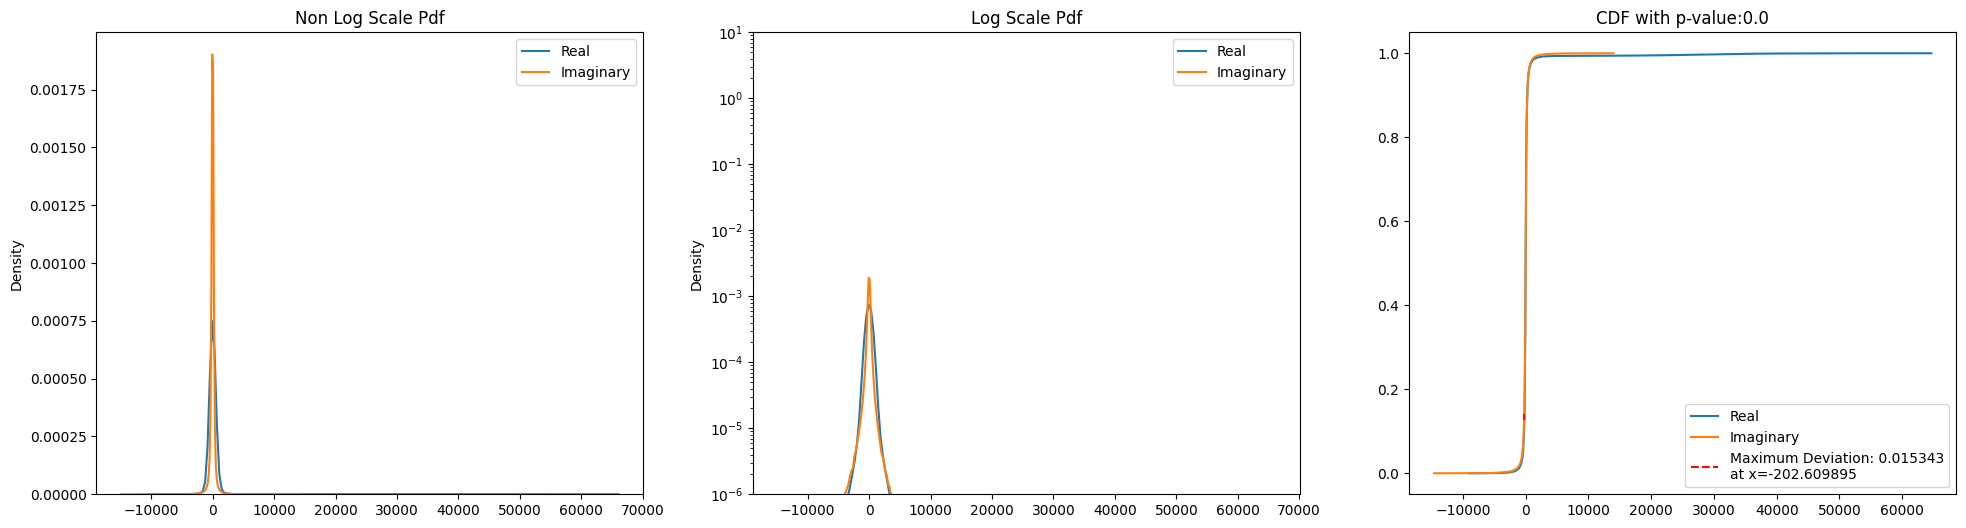

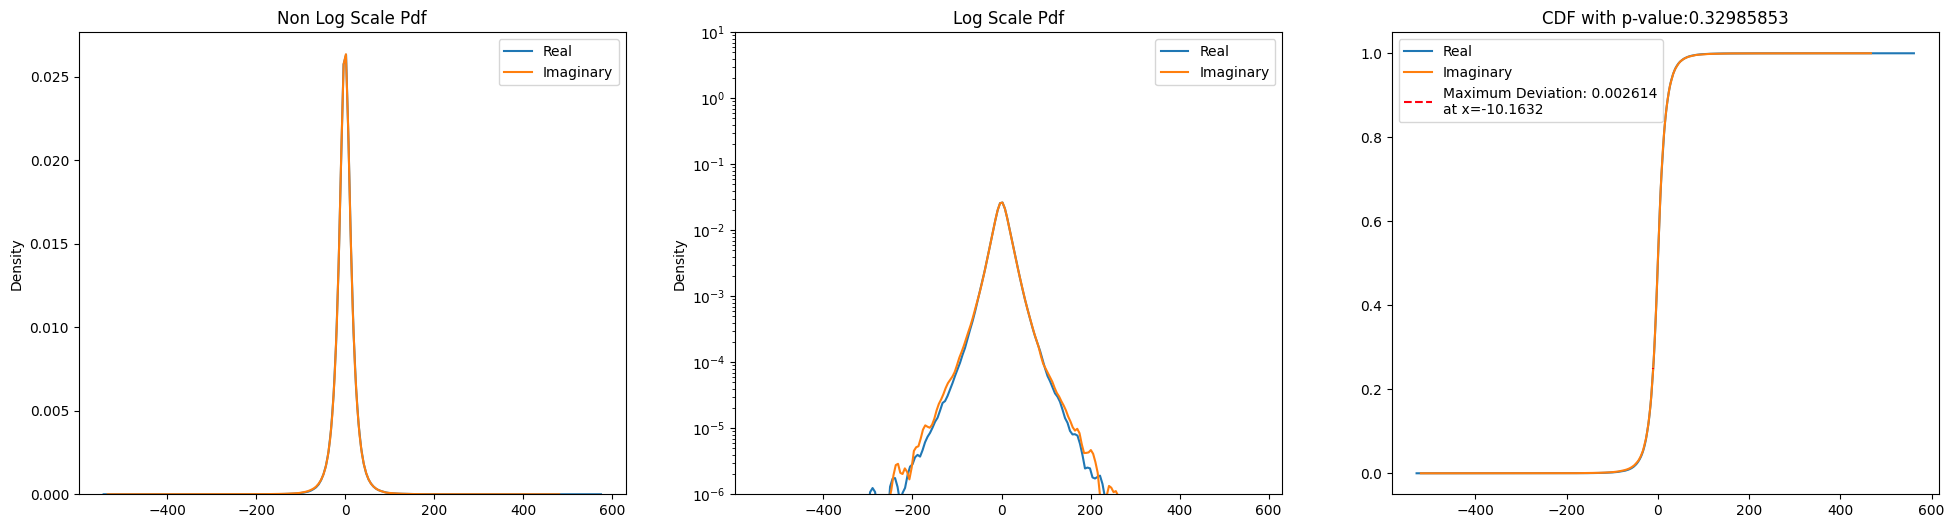

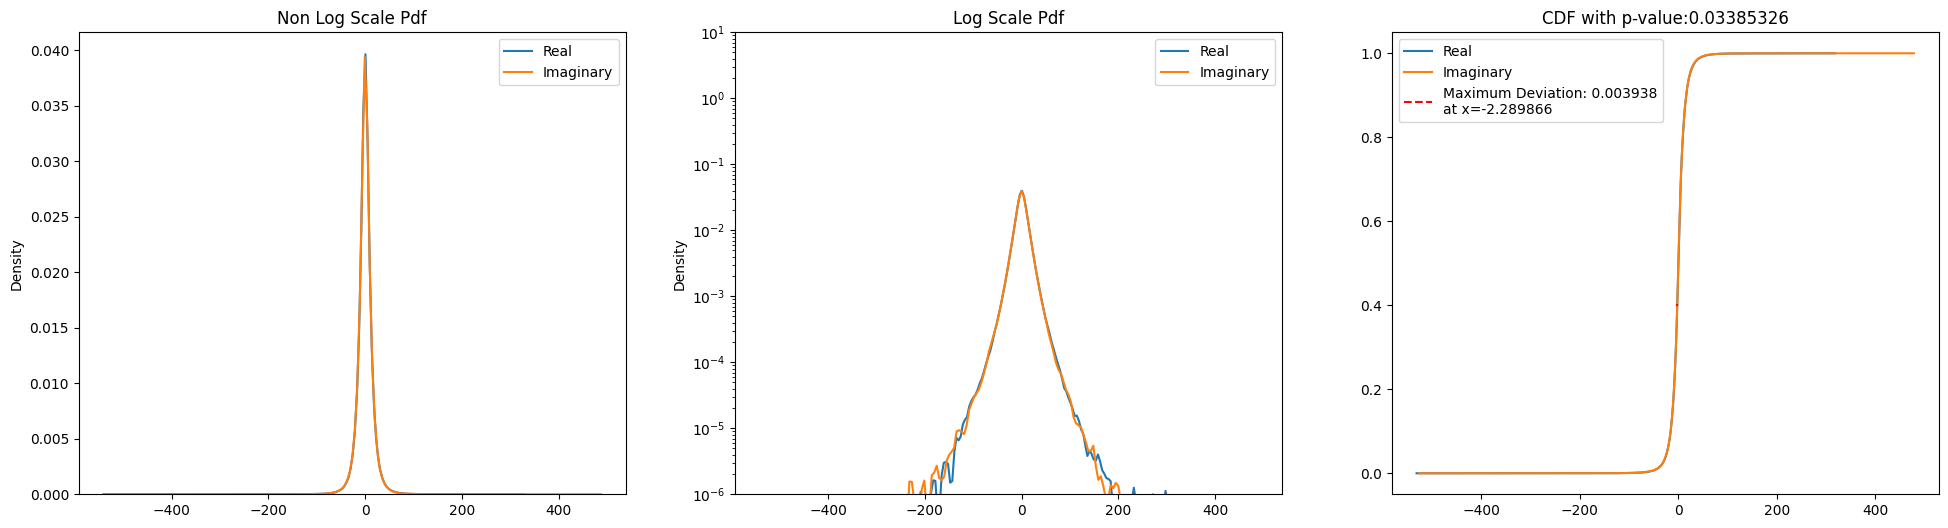

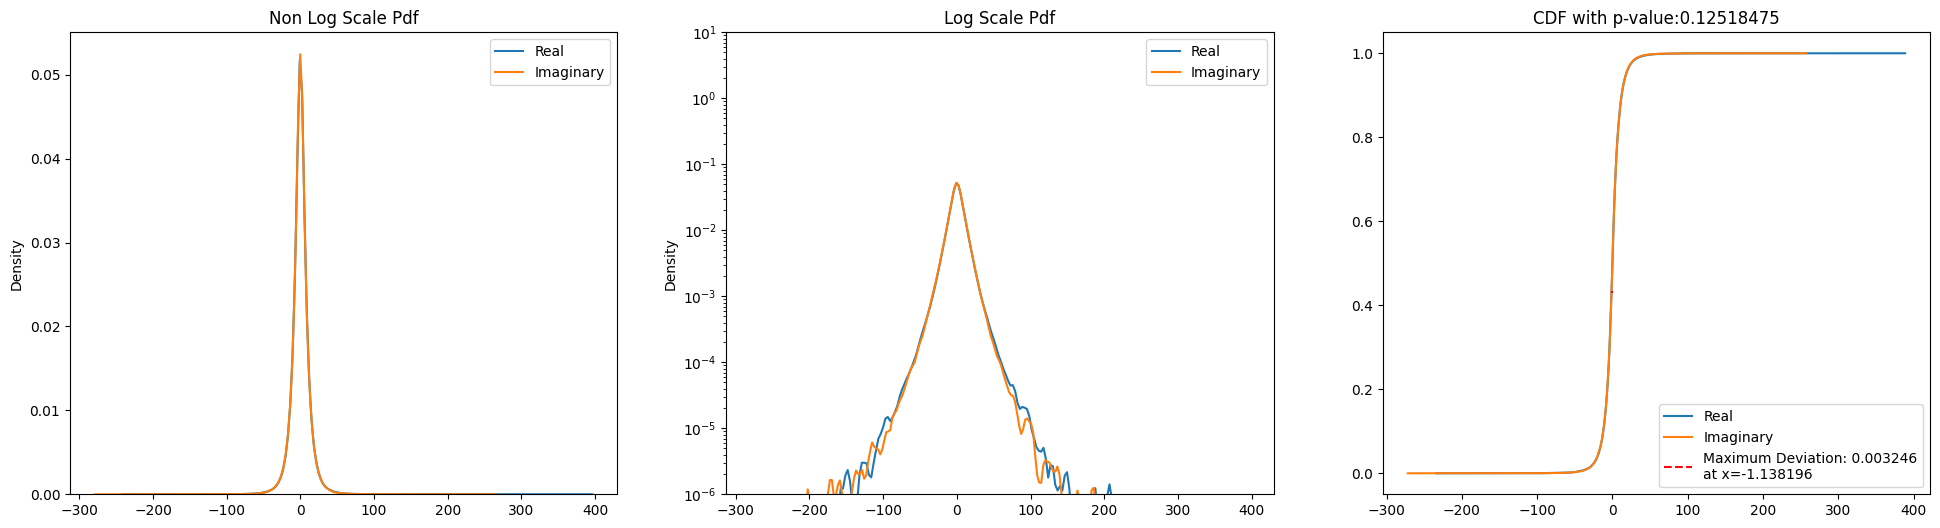

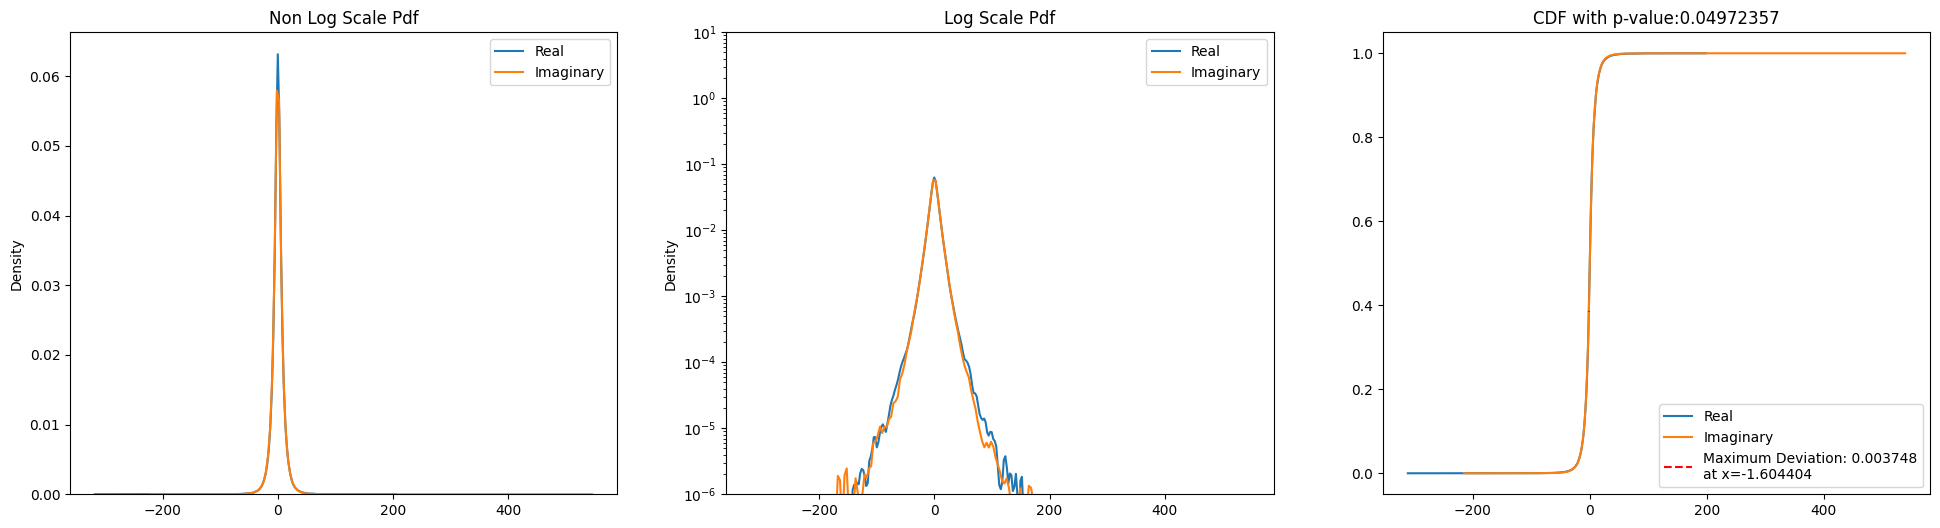

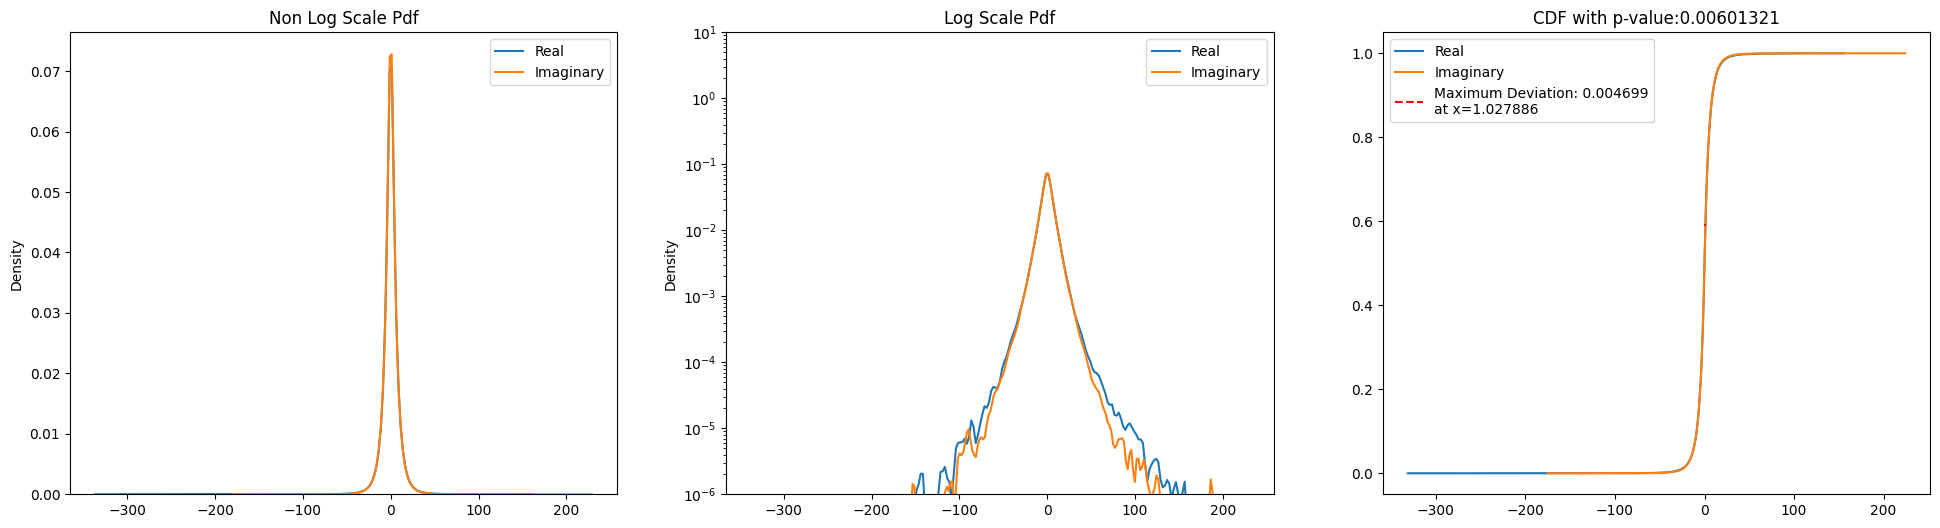

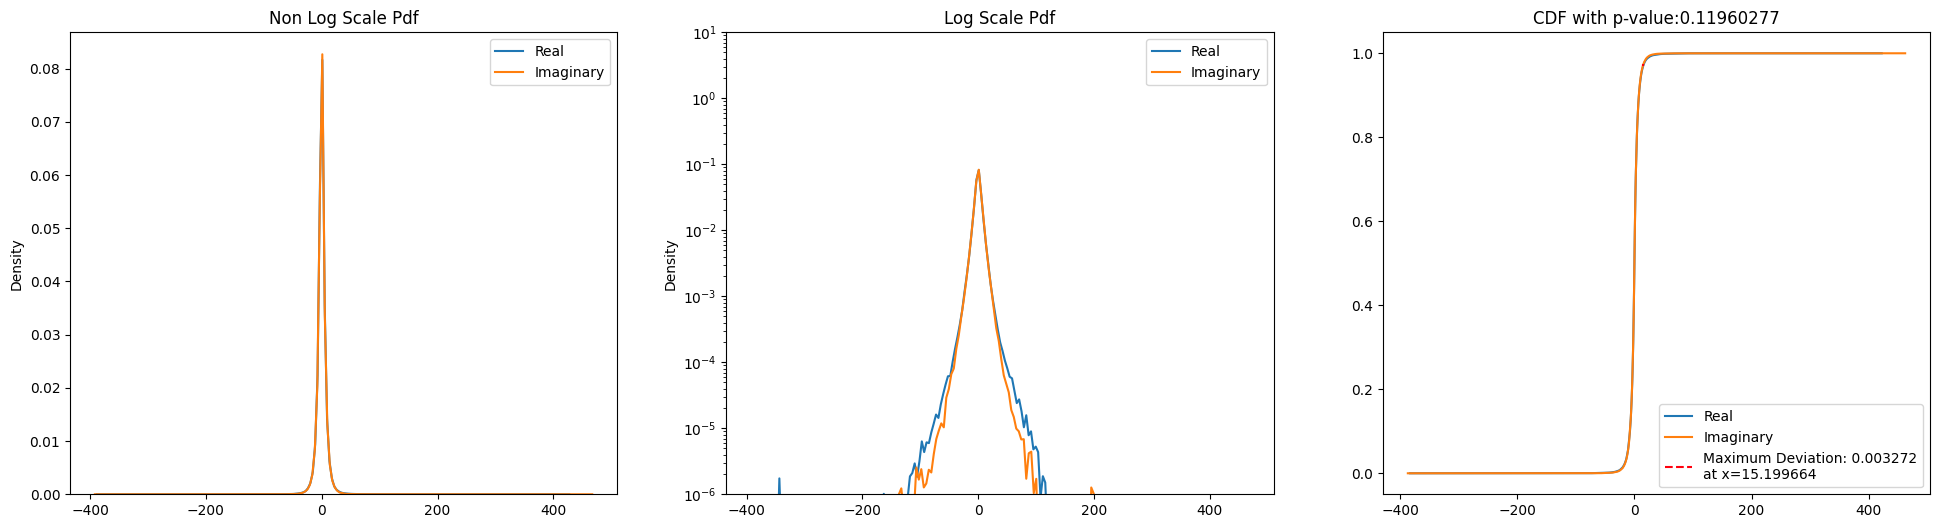

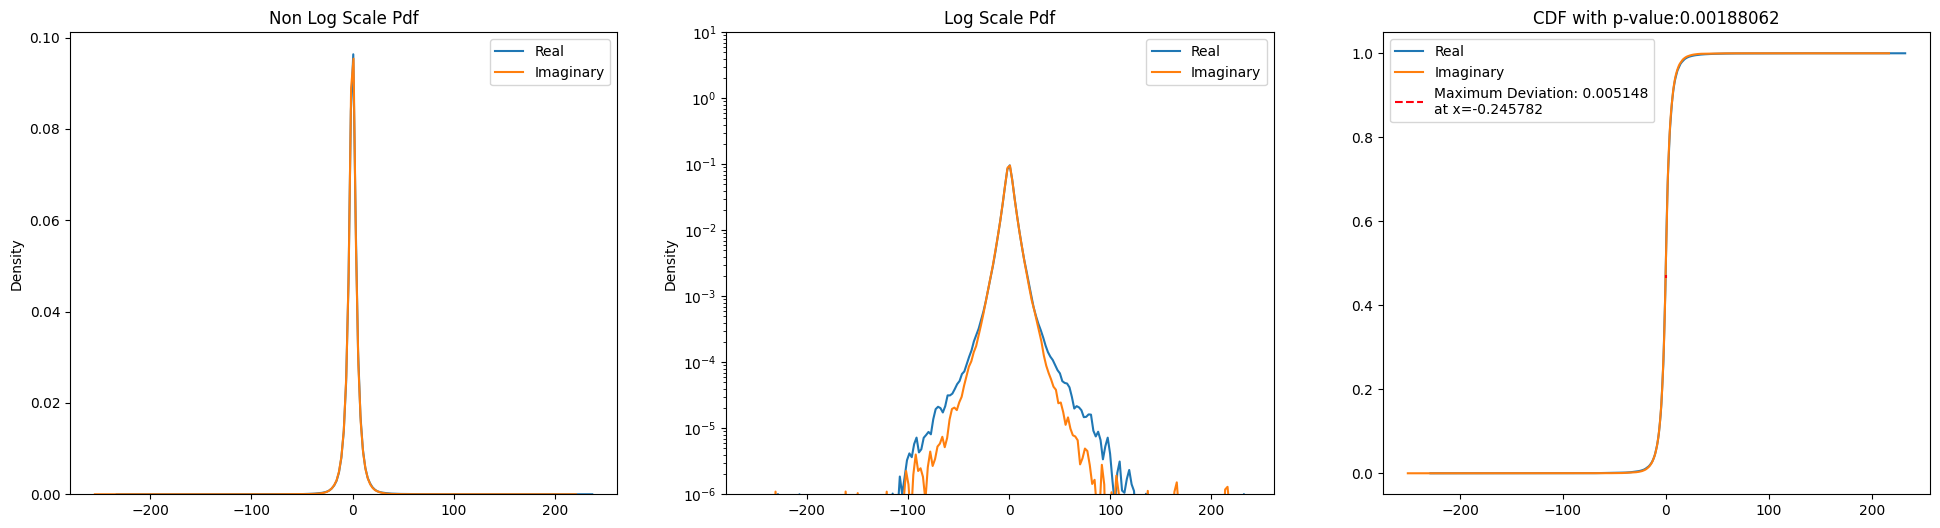

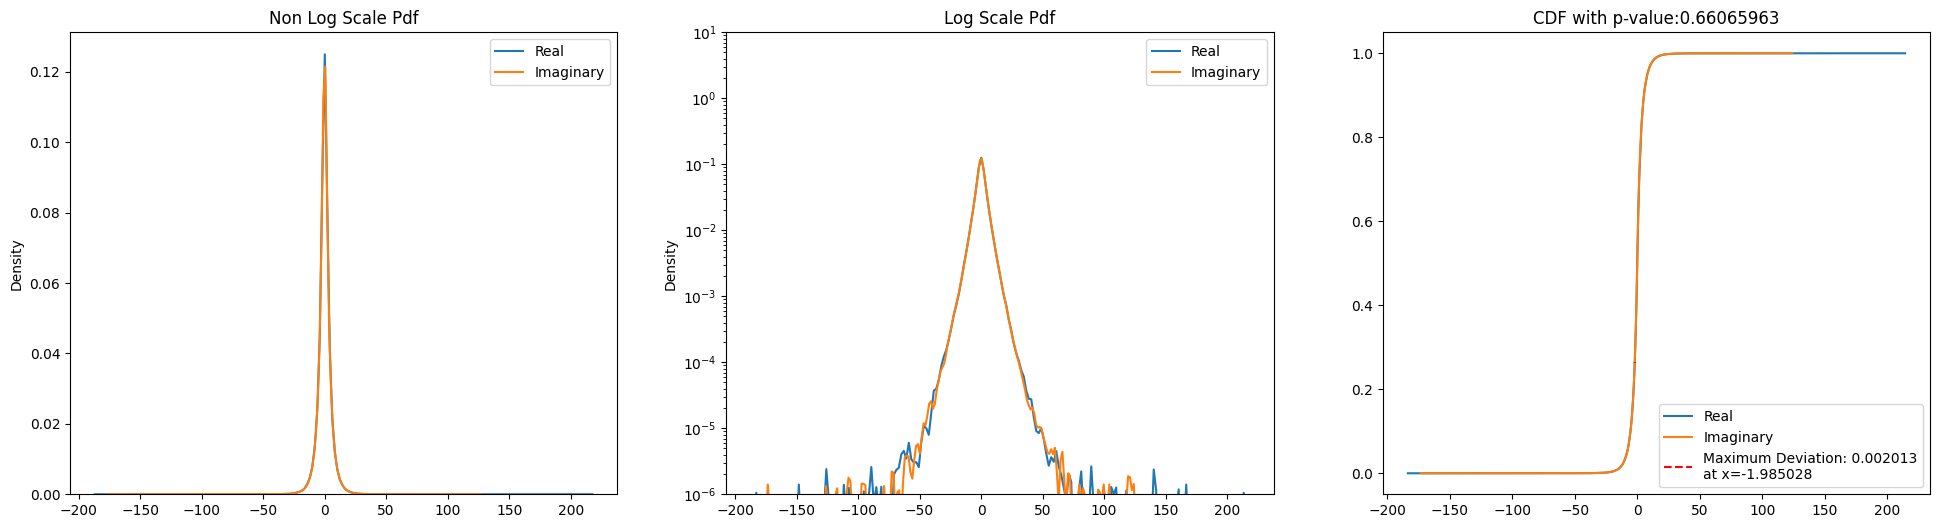

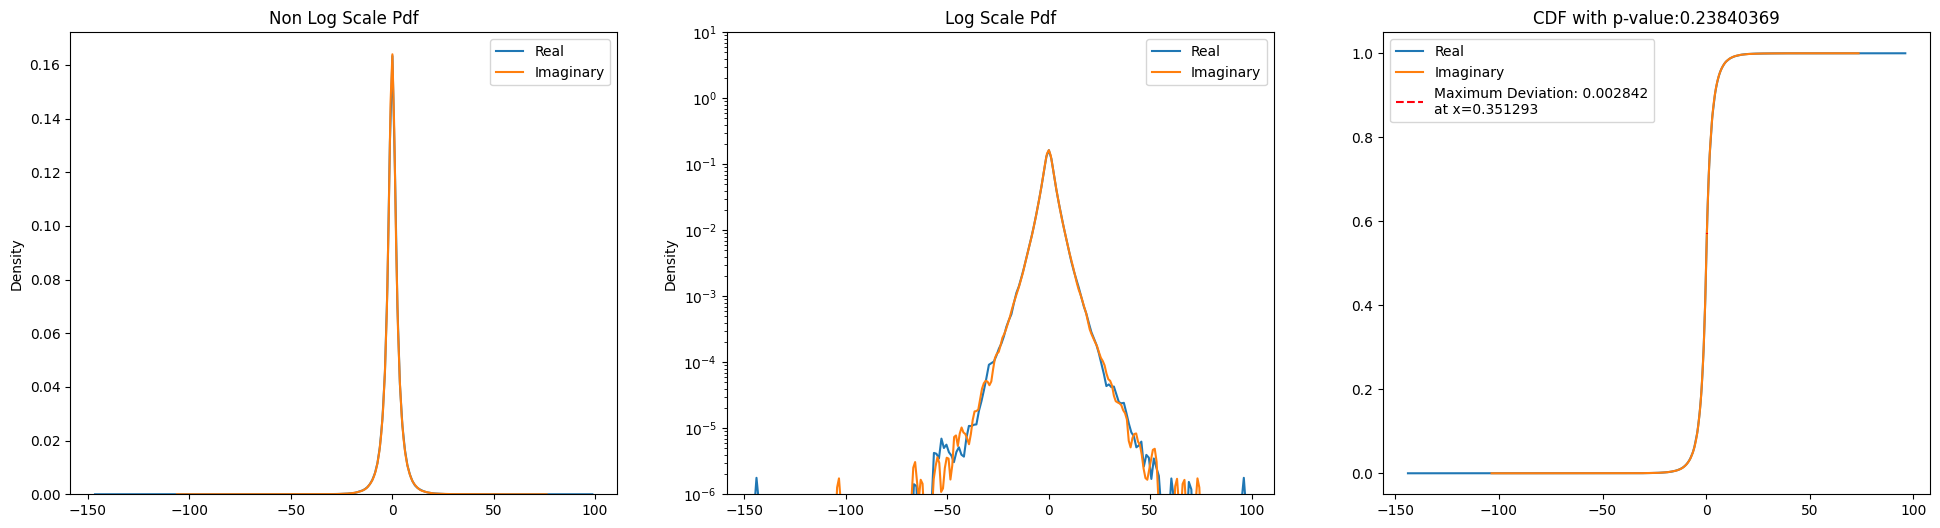

In [8]:
for i in range(10):
    twoSampleComparisonPlots(real_data[n//100 * i*10: n//100 * (i*10+1)], imag_data[n//100 * i*10: n//100 * (i*10+1)], samp1name="Real", samp2name="Imaginary")


# Red

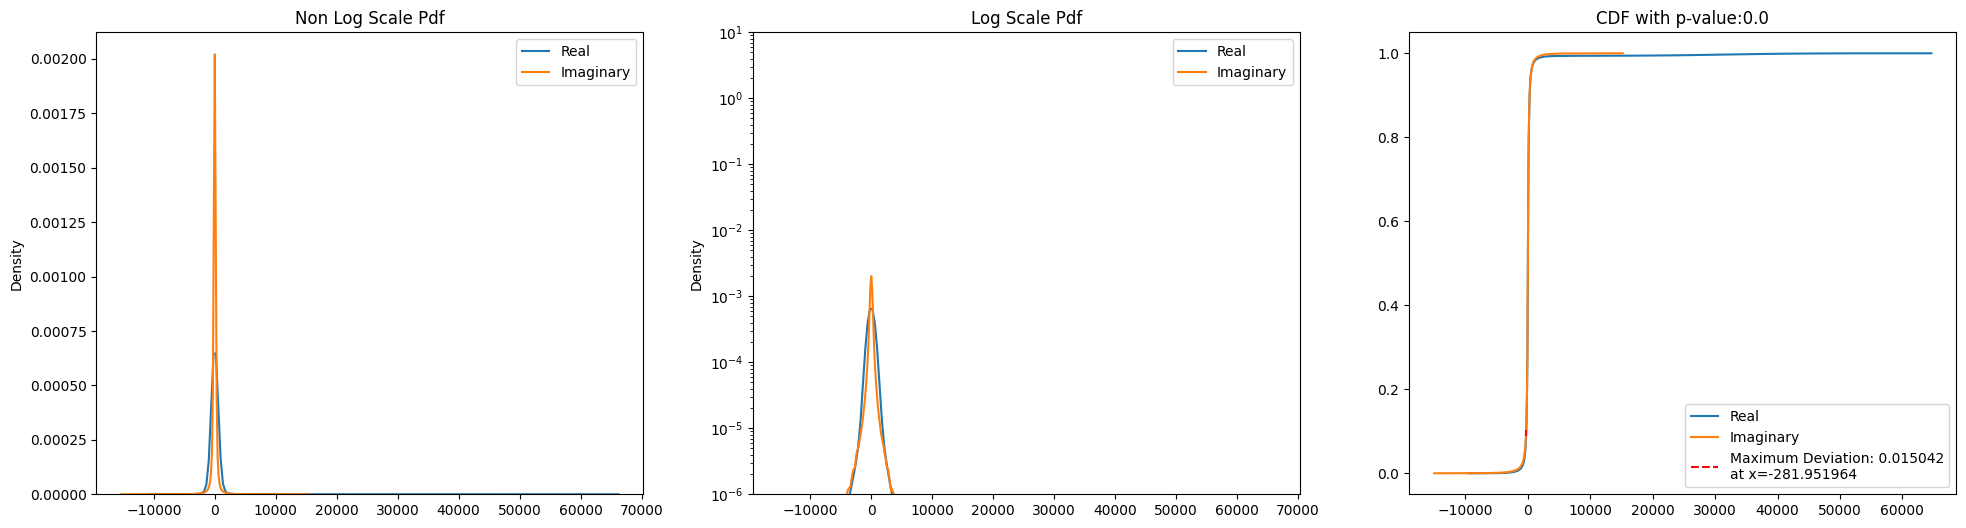

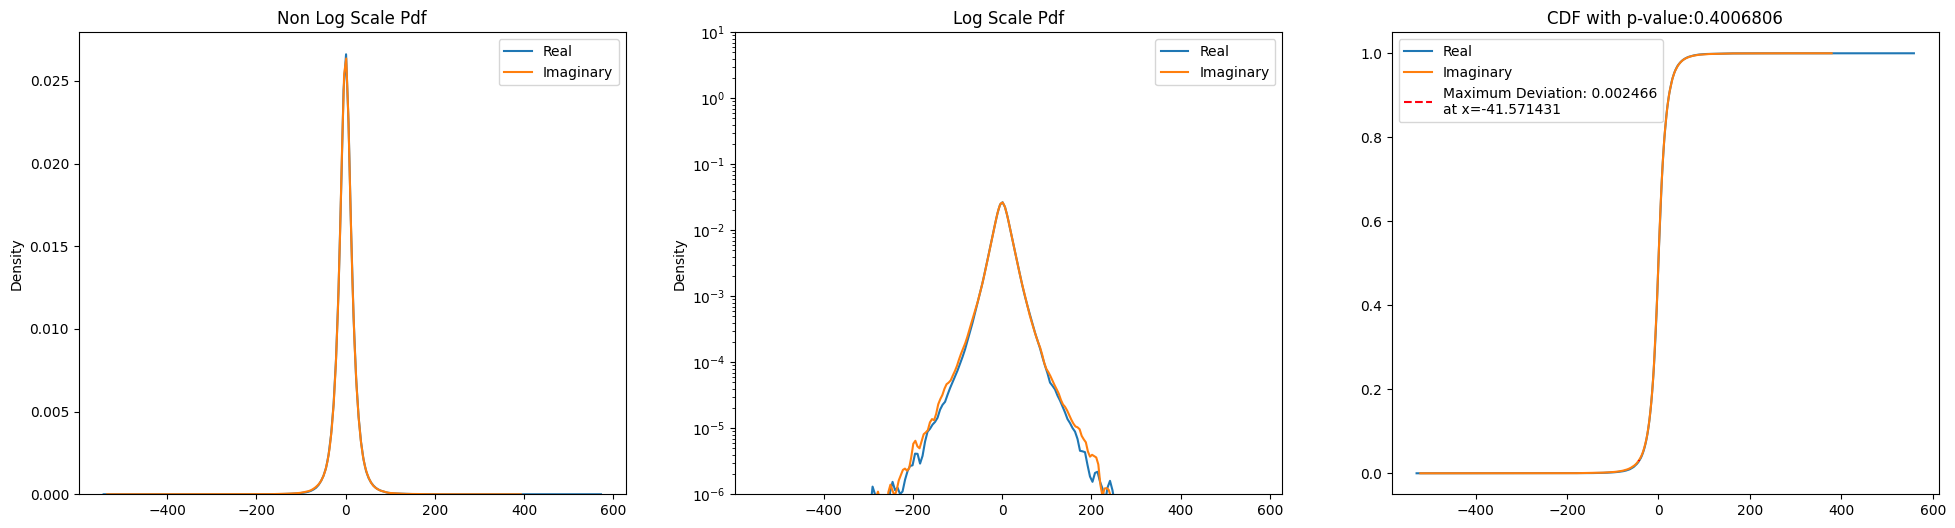

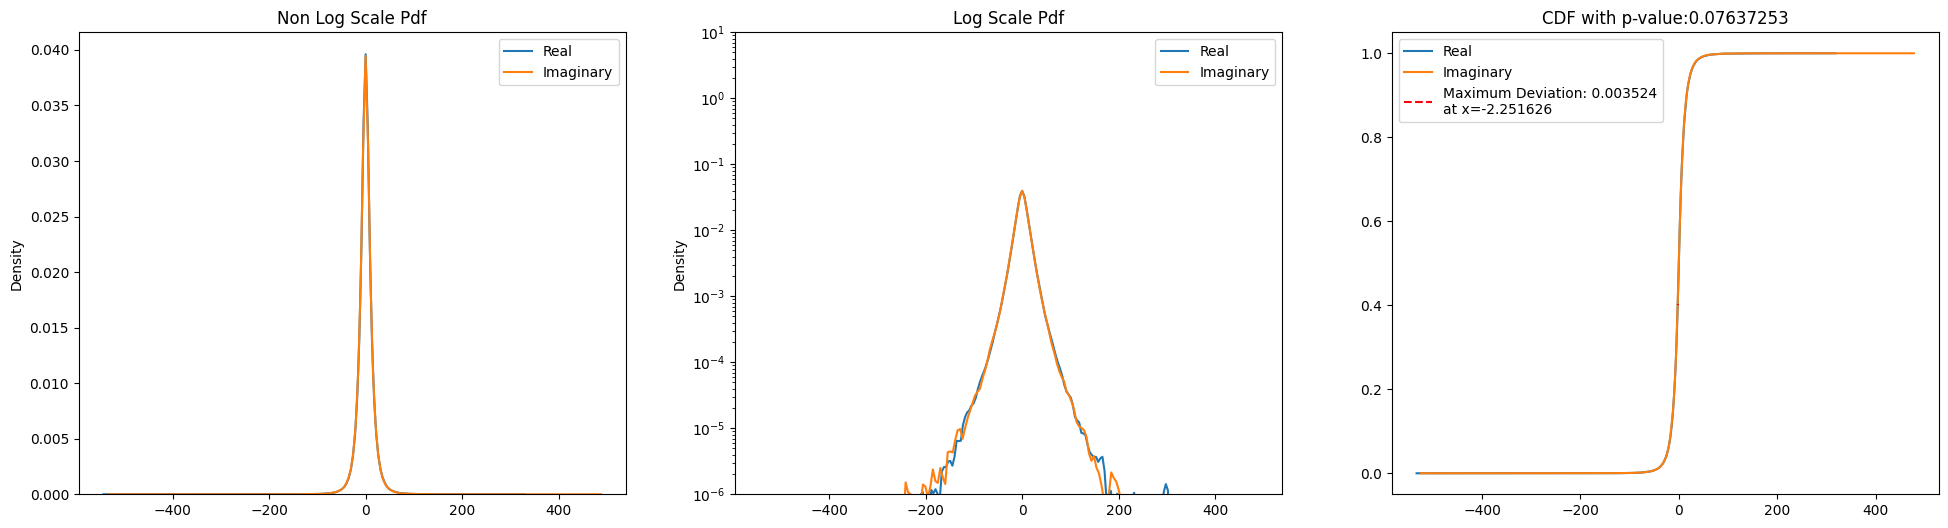

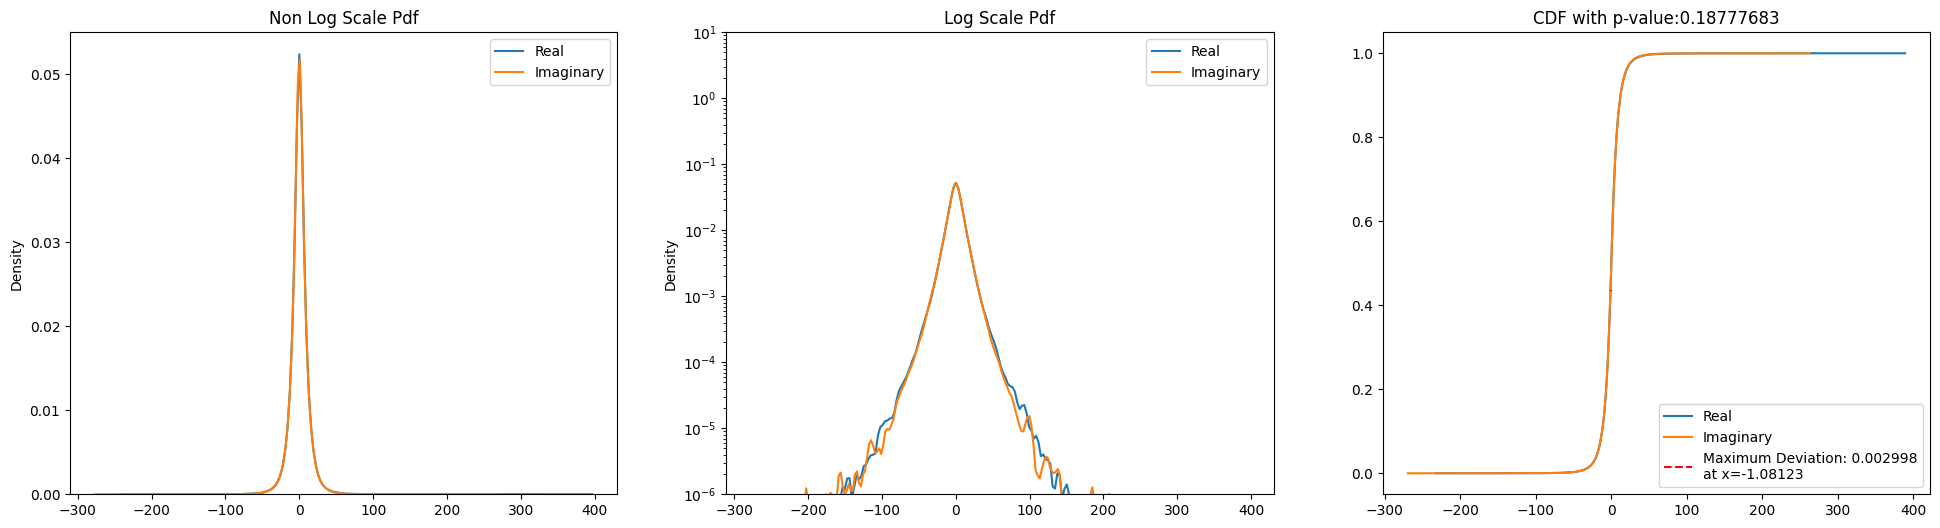

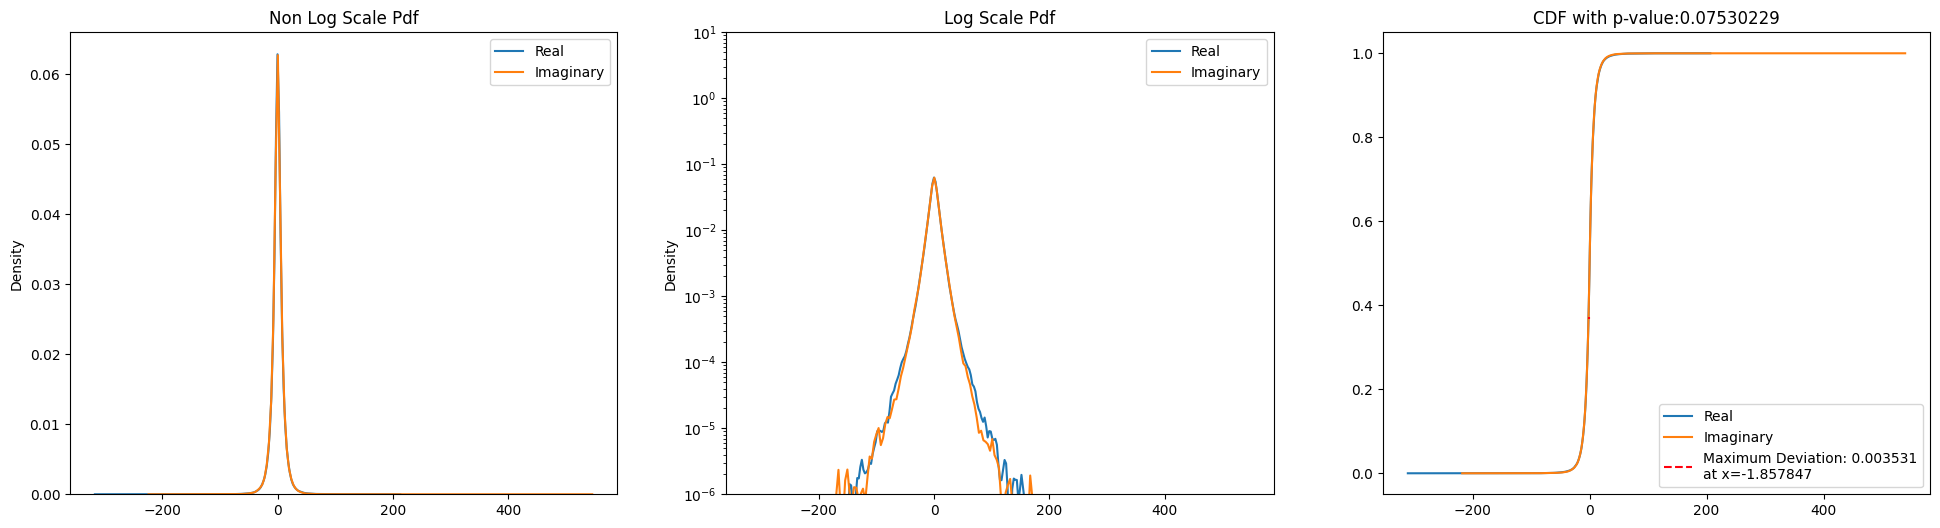

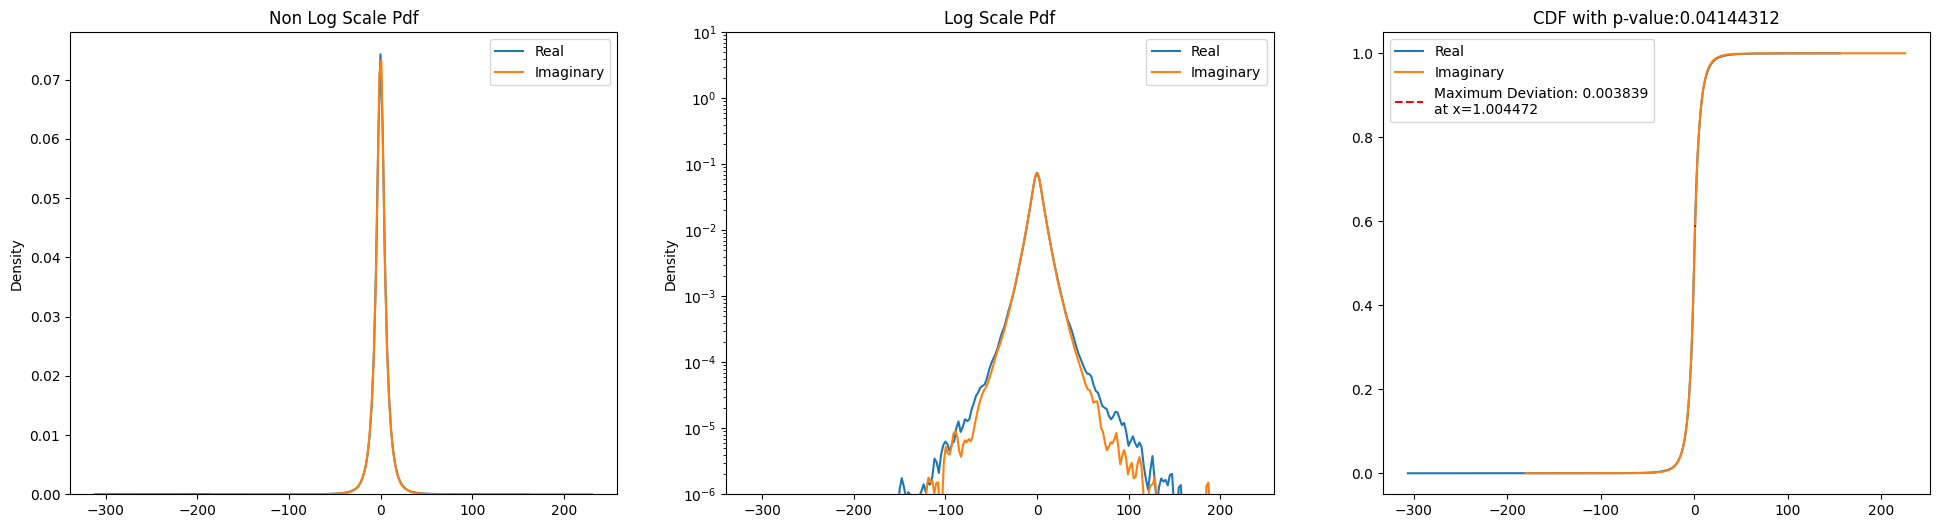

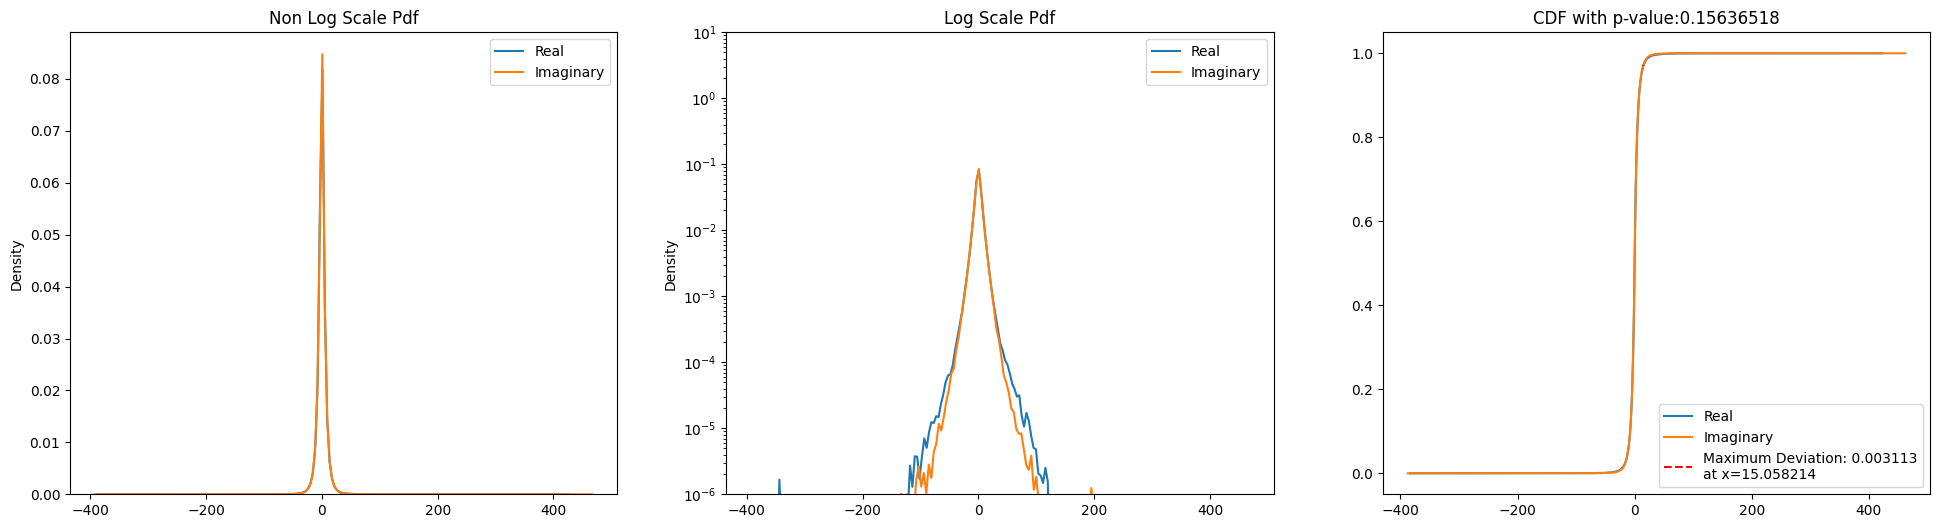

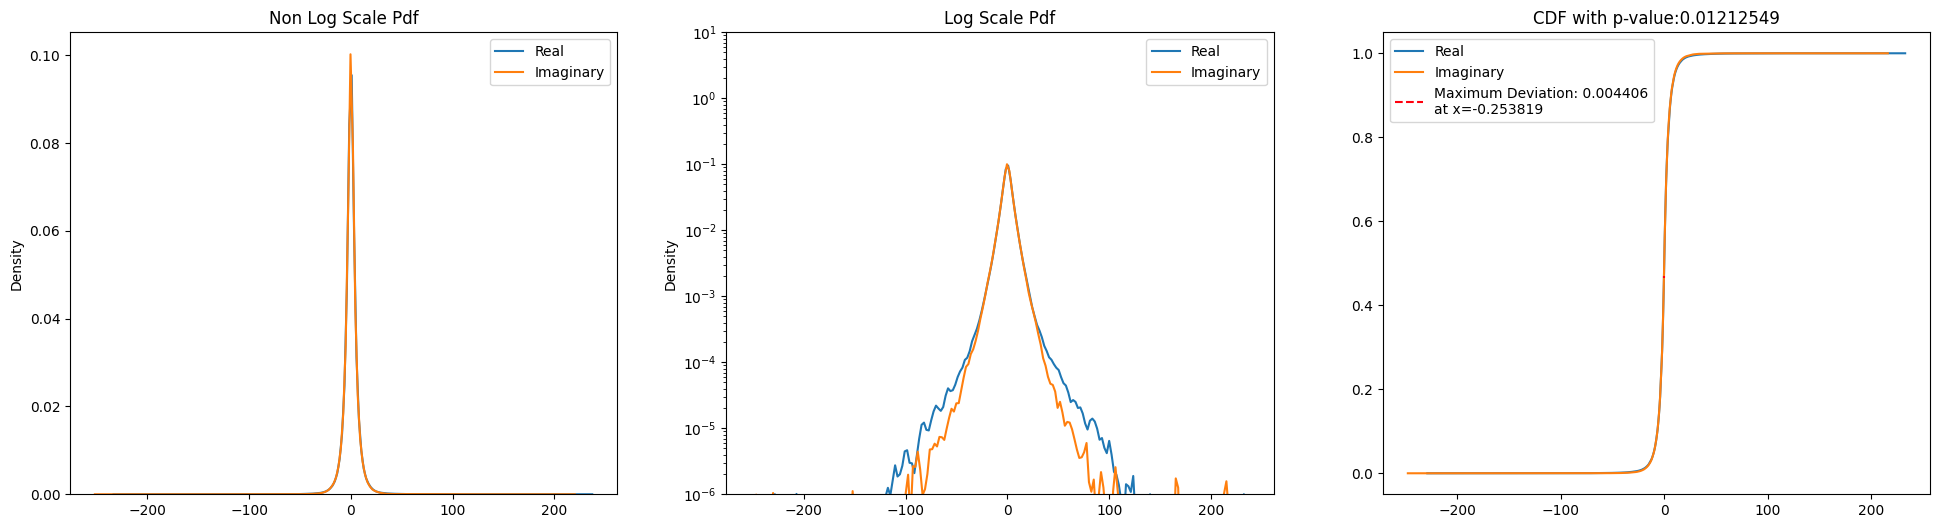

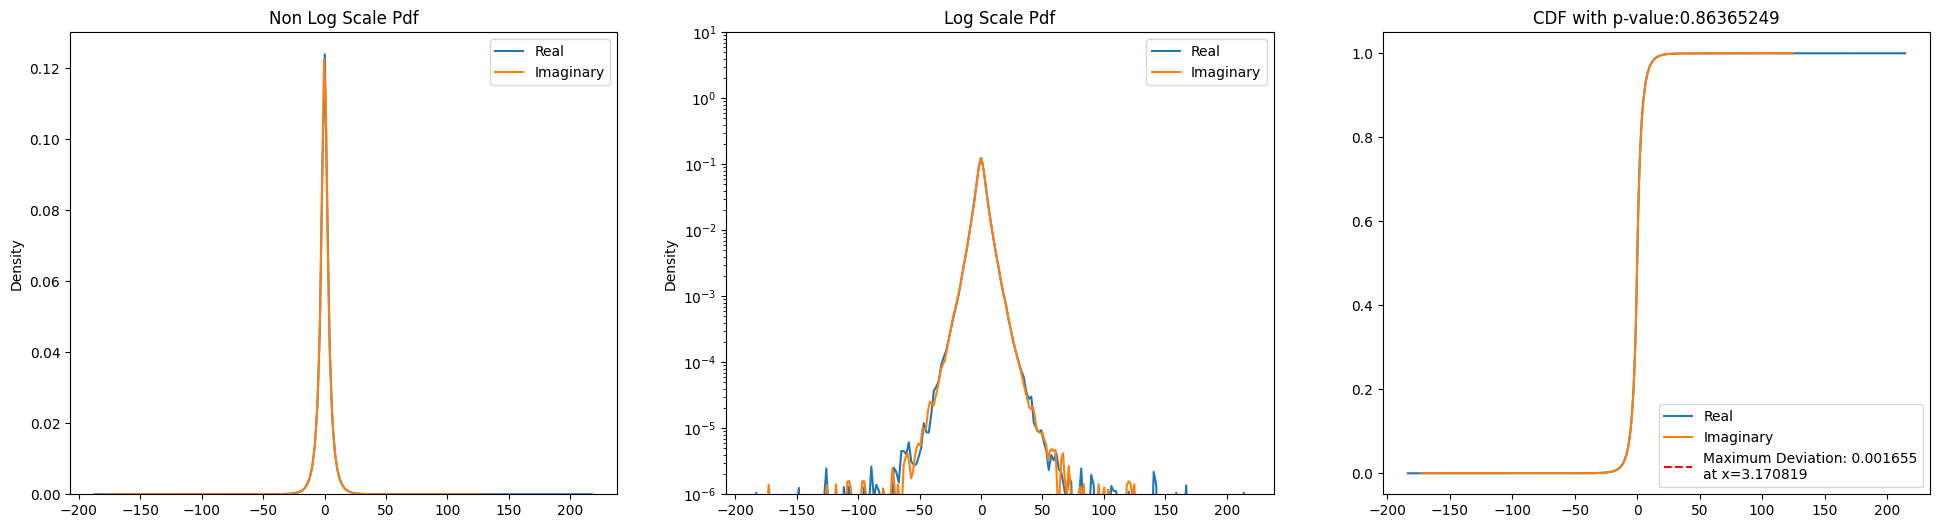

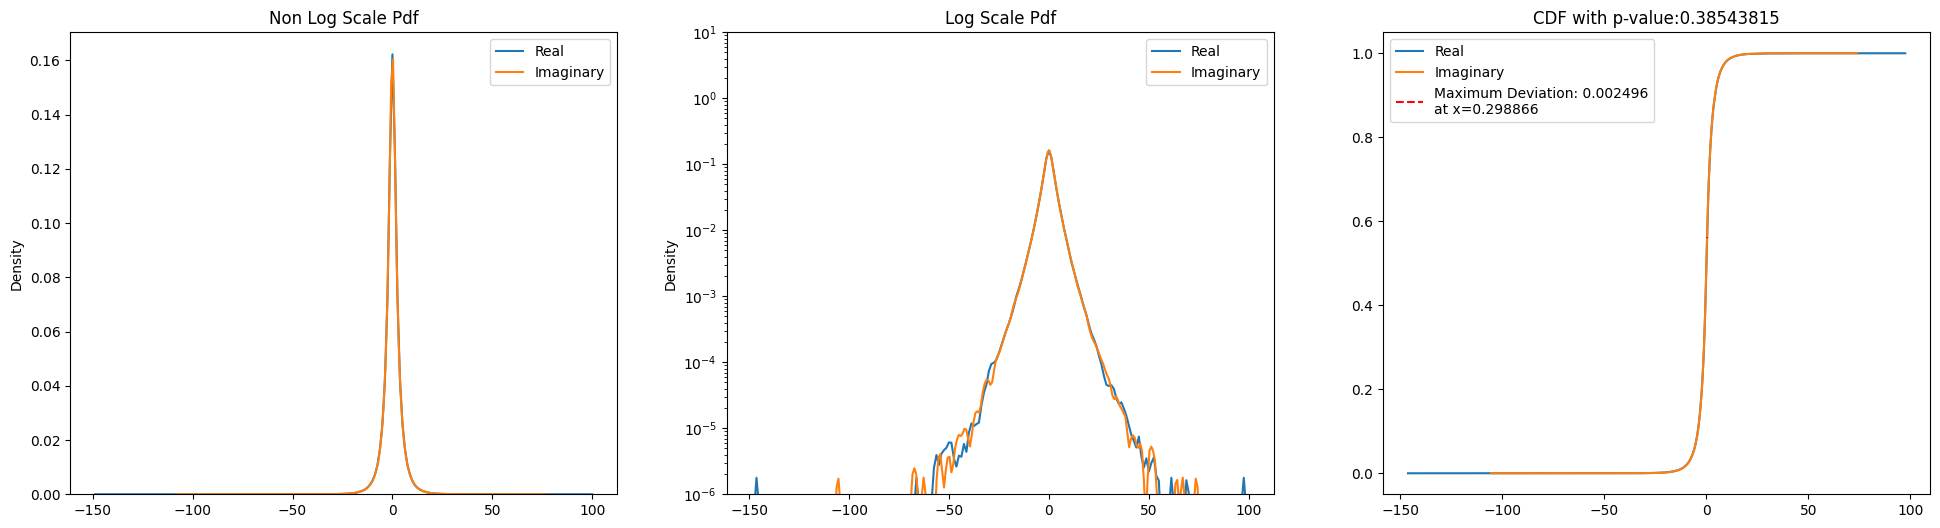

In [11]:
coeffs, mags = convert_fourier_list(data_dir, c = 0, image_opener = npz_opener_pickle)
real_data = np.real(coeffs)
imag_data = np.imag(coeffs)
n= len(real_data)
for i in range(10):
    twoSampleComparisonPlots(real_data[n//100 * i*10: n//100 * (i*10+1)], imag_data[n//100 * i*10: n//100 * (i*10+1)], samp1name="Real", samp2name="Imaginary")


# Green

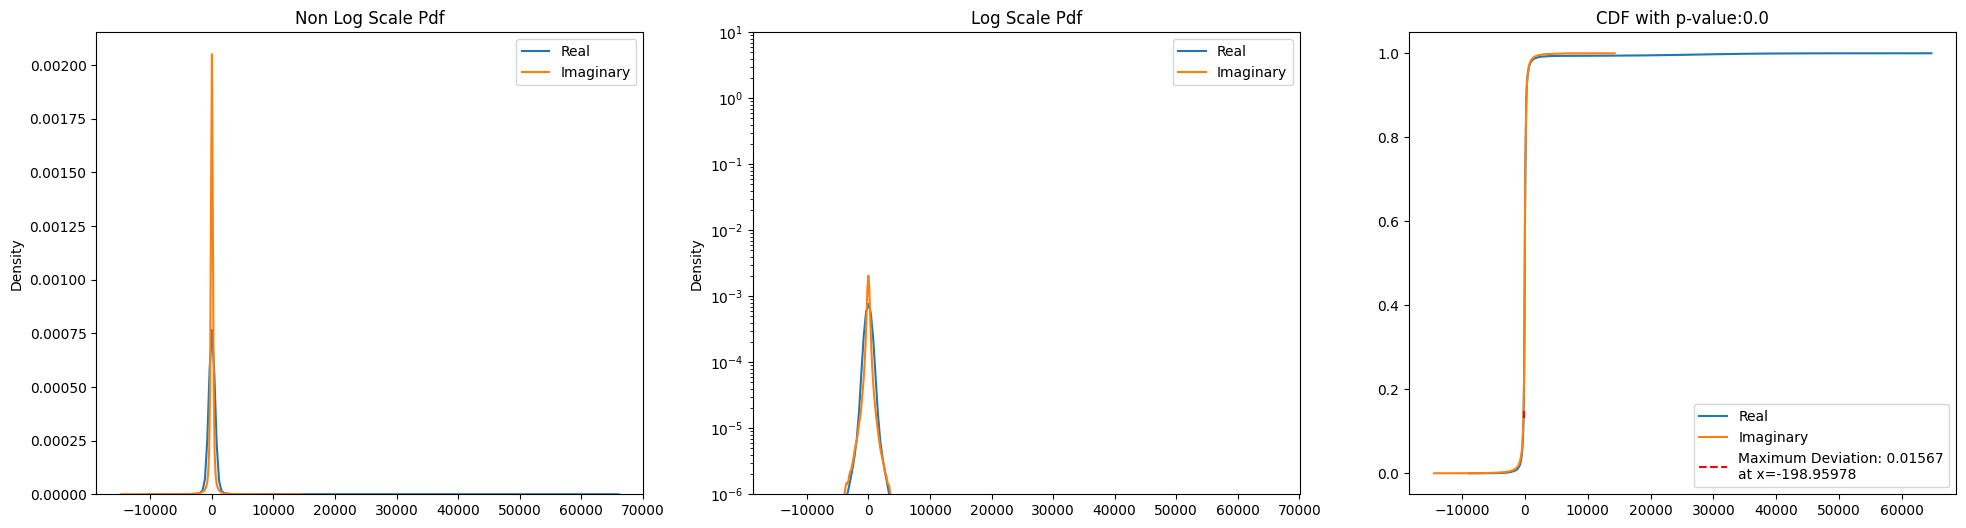

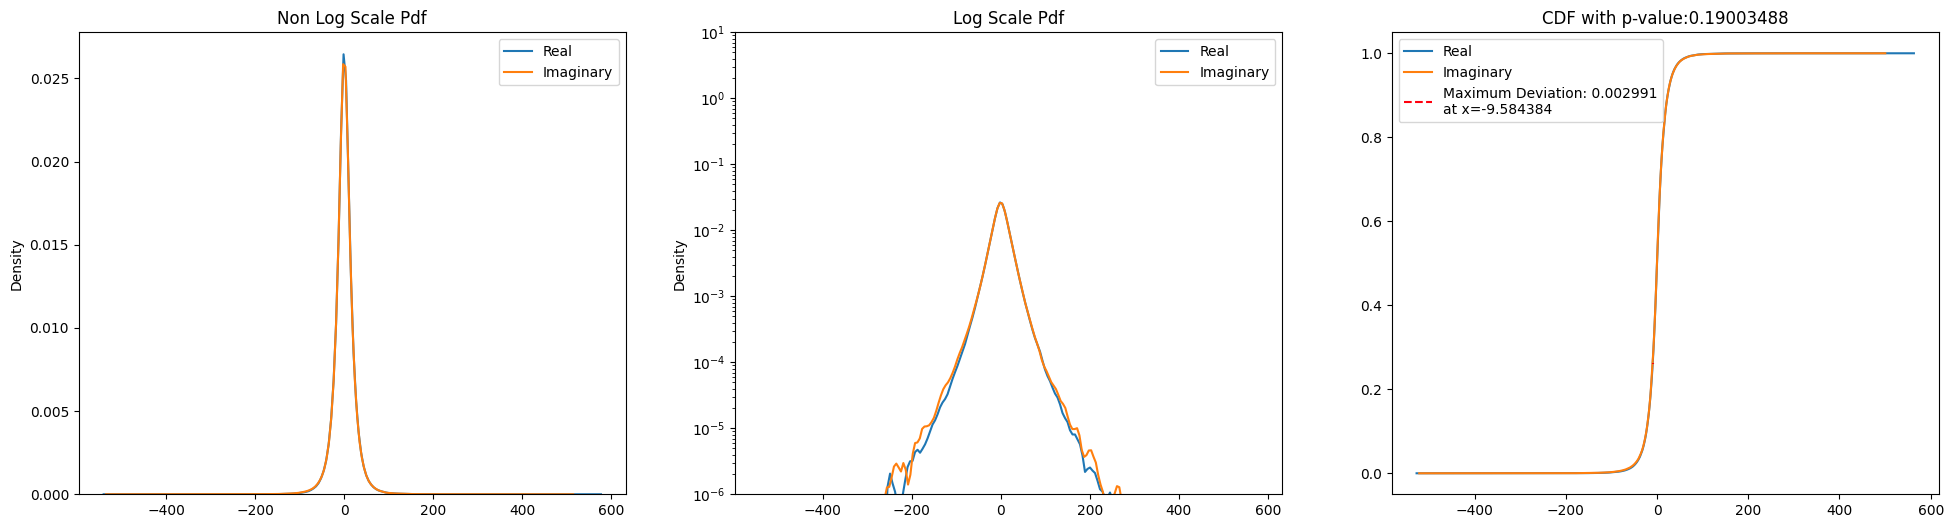

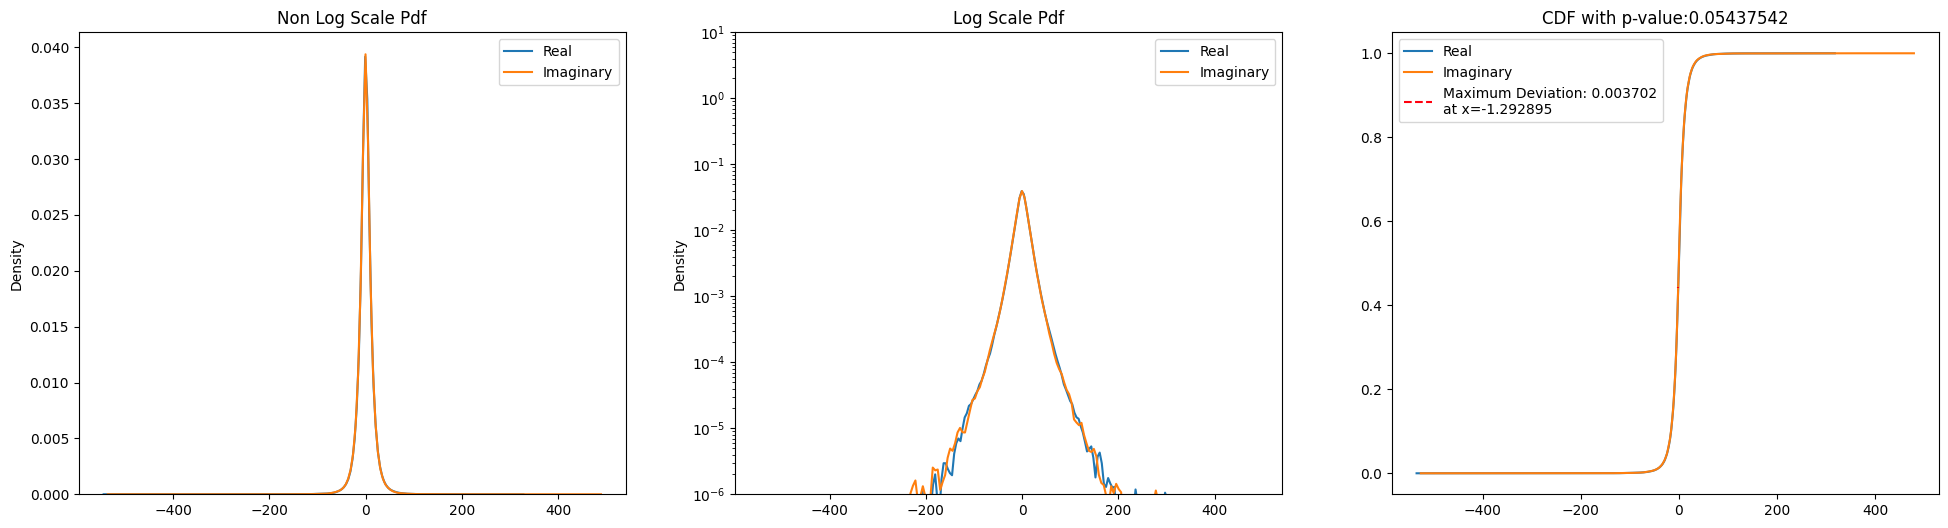

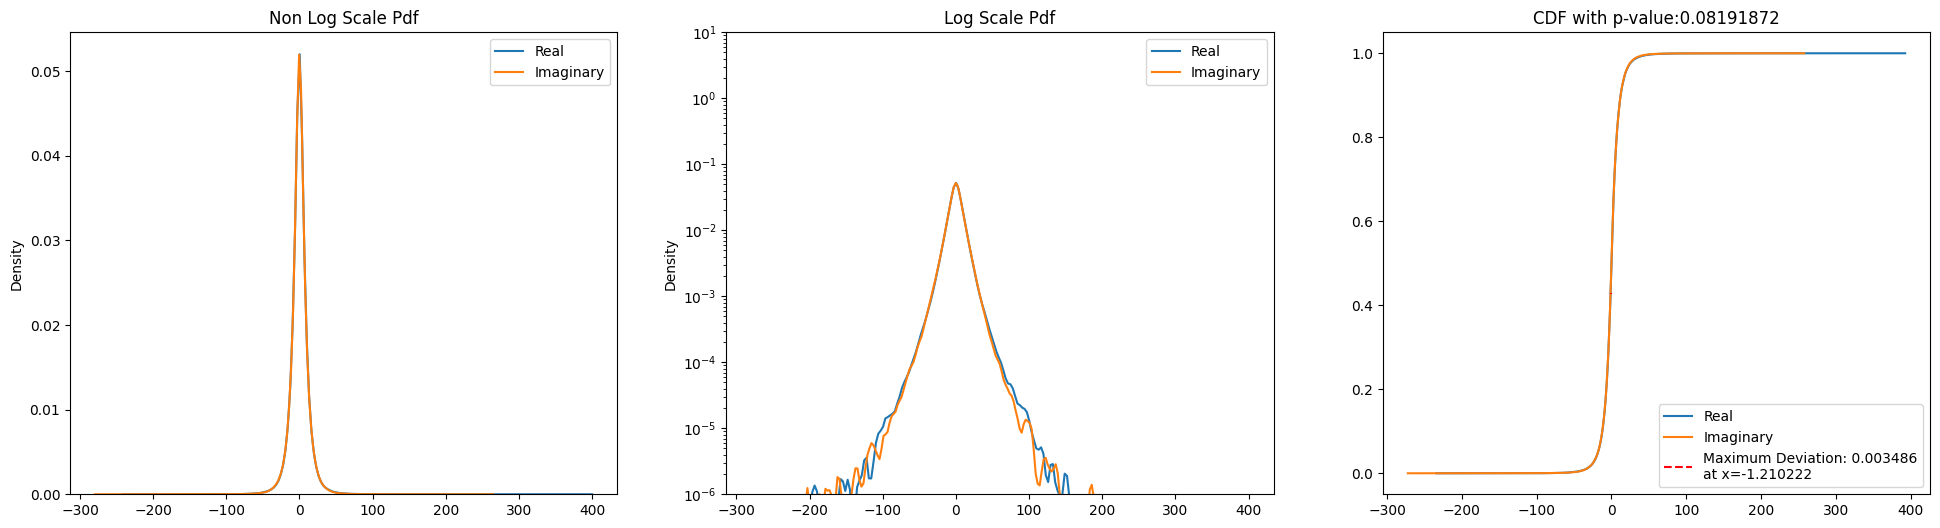

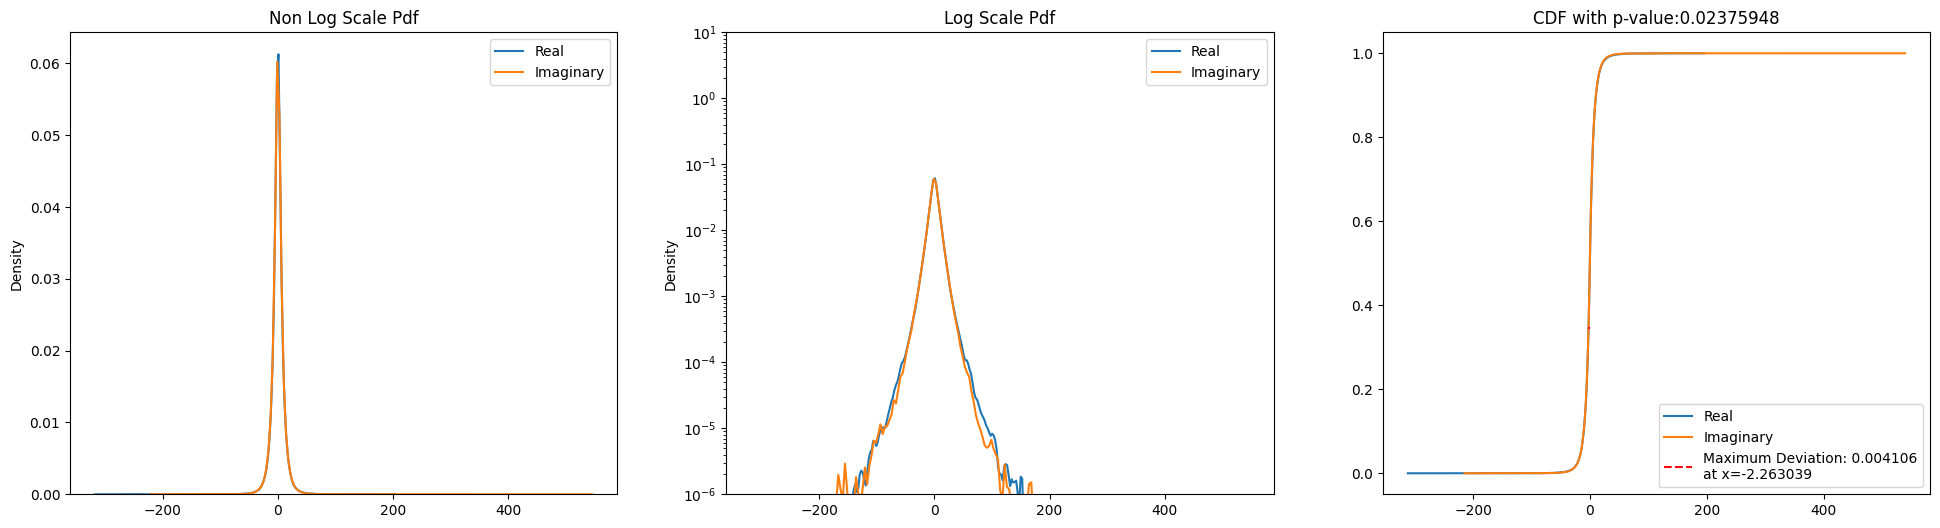

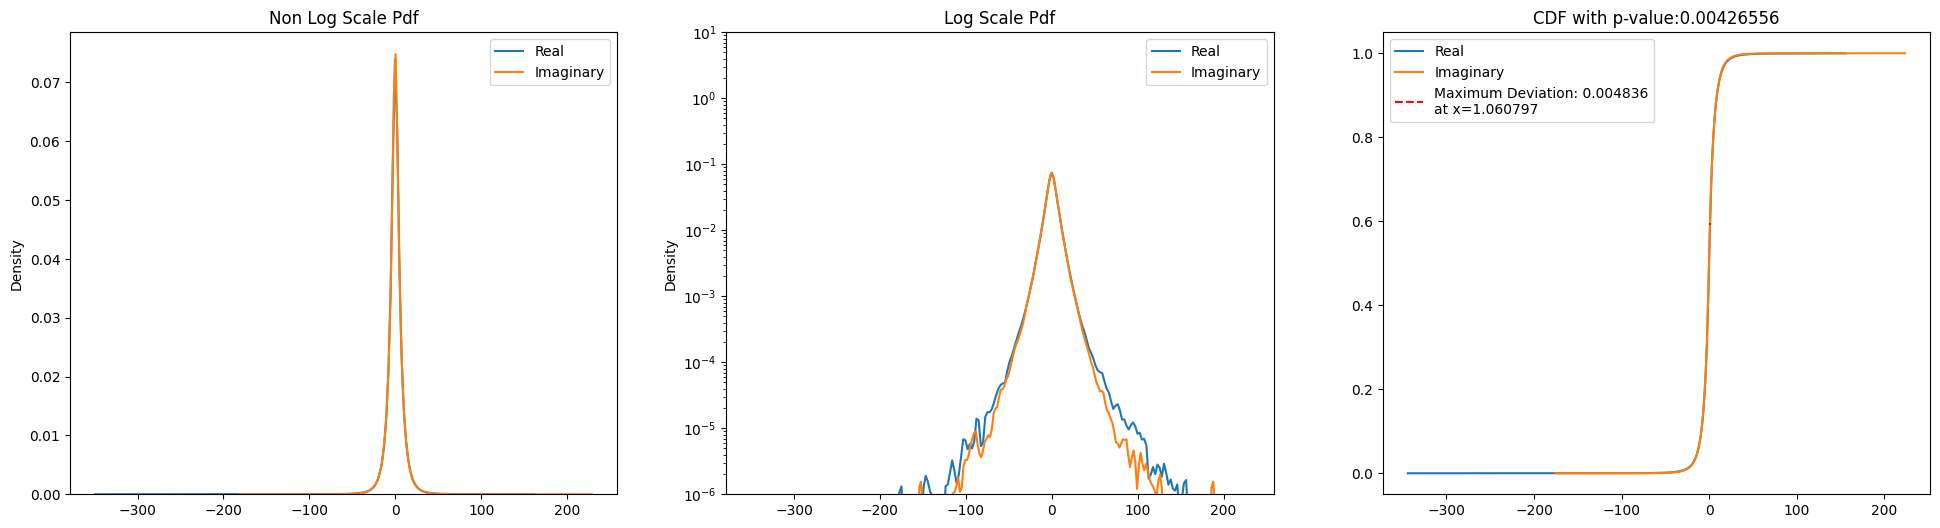

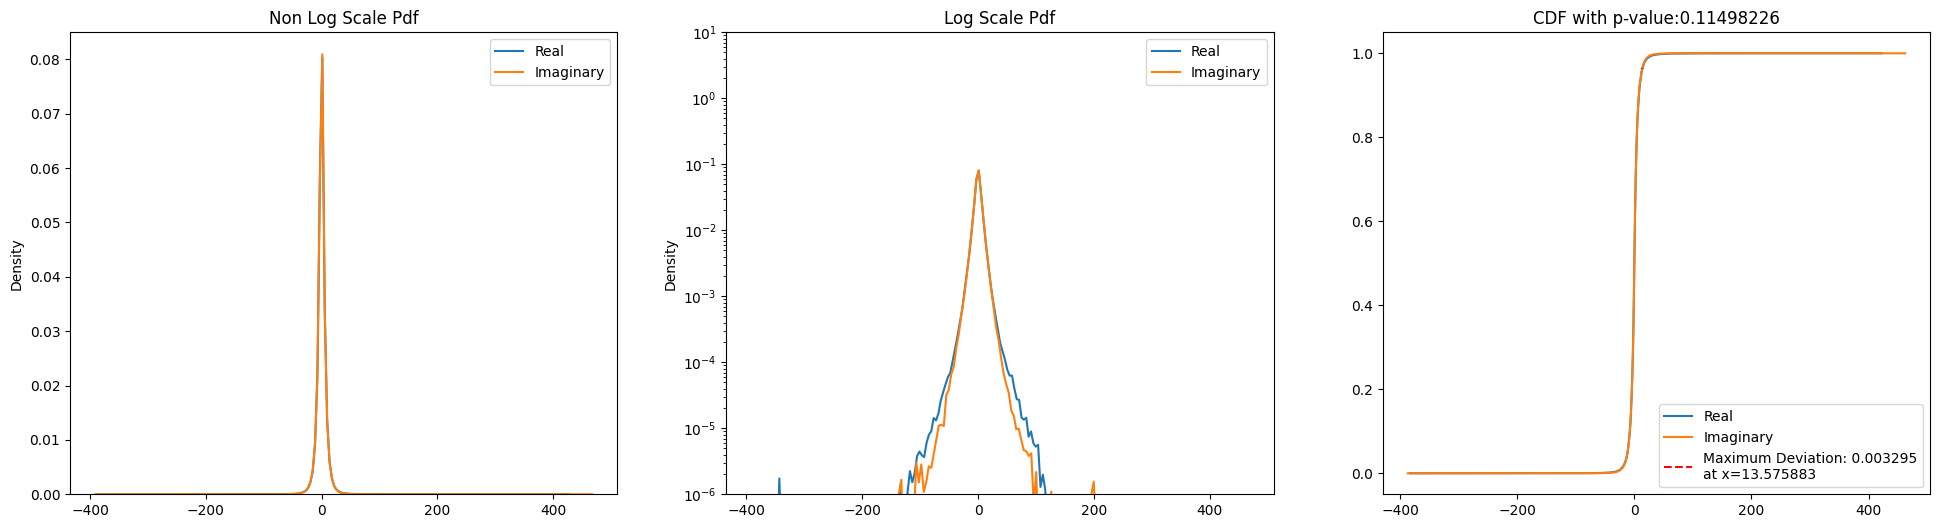

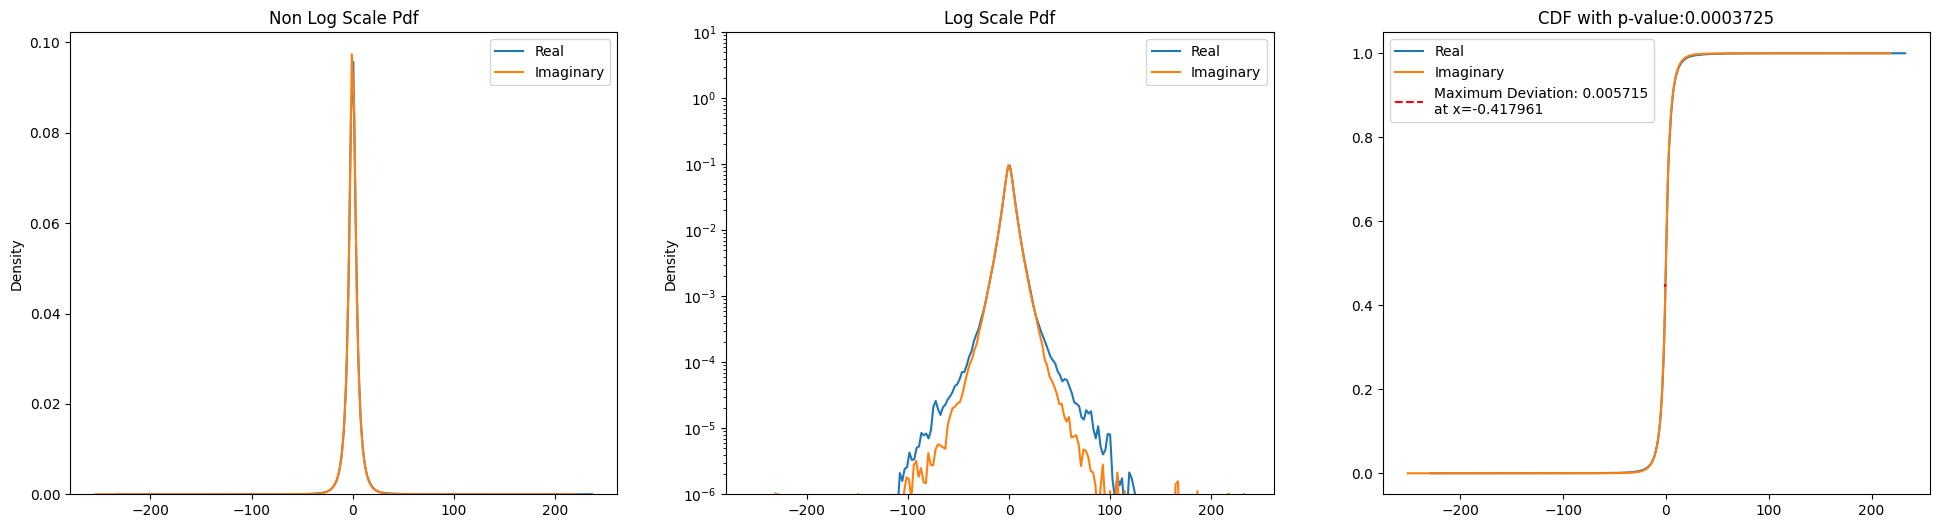

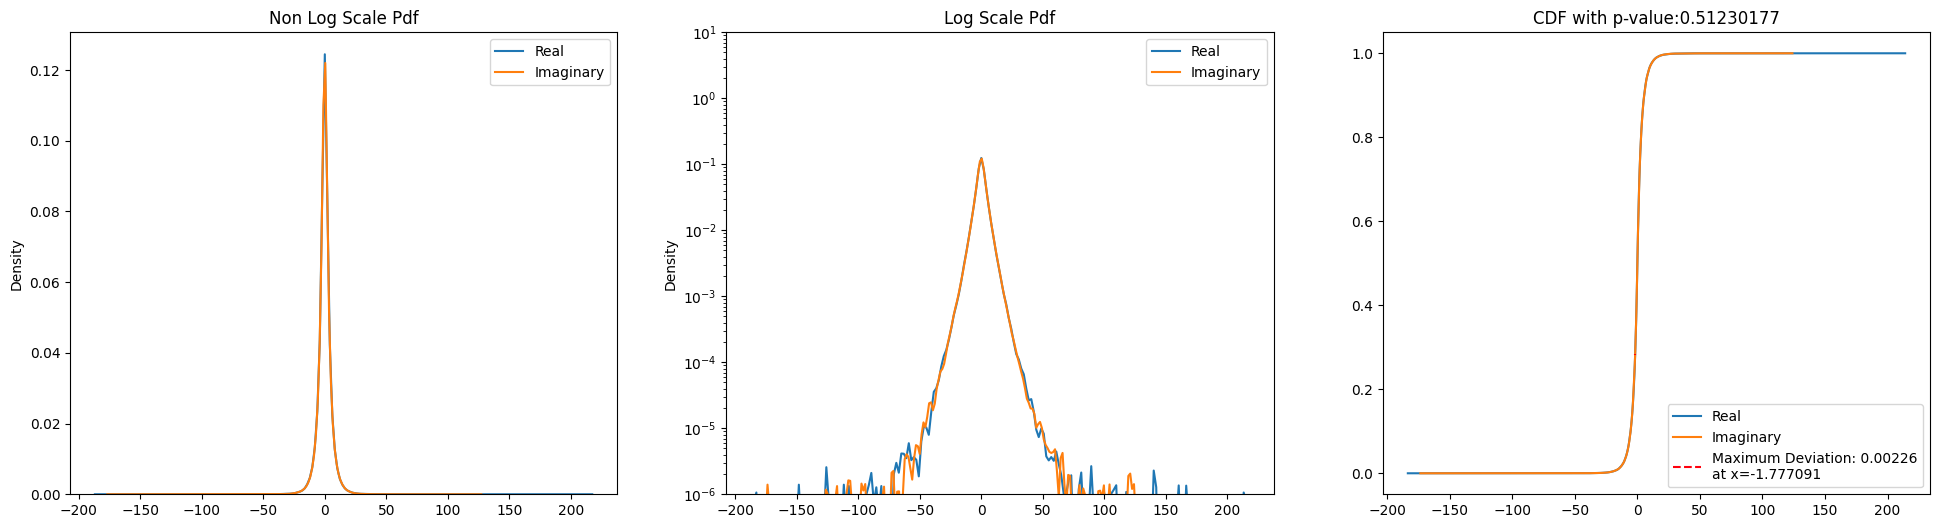

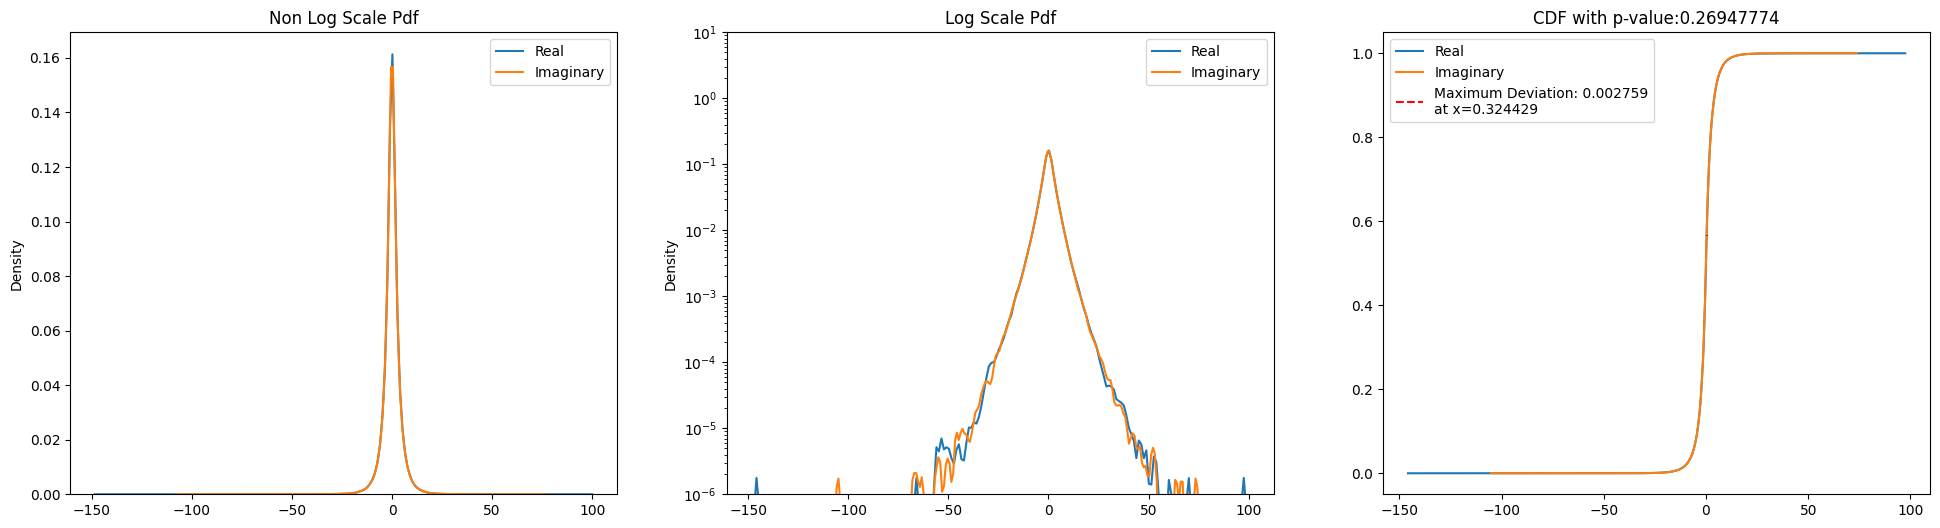

In [12]:
coeffs, mags = convert_fourier_list(data_dir, c = 1, image_opener = npz_opener_pickle)
real_data = np.real(coeffs)
imag_data = np.imag(coeffs)
n= len(real_data)
for i in range(10):
    twoSampleComparisonPlots(real_data[n//100 * i*10: n//100 * (i*10+1)], imag_data[n//100 * i*10: n//100 * (i*10+1)], samp1name="Real", samp2name="Imaginary")


# Blue

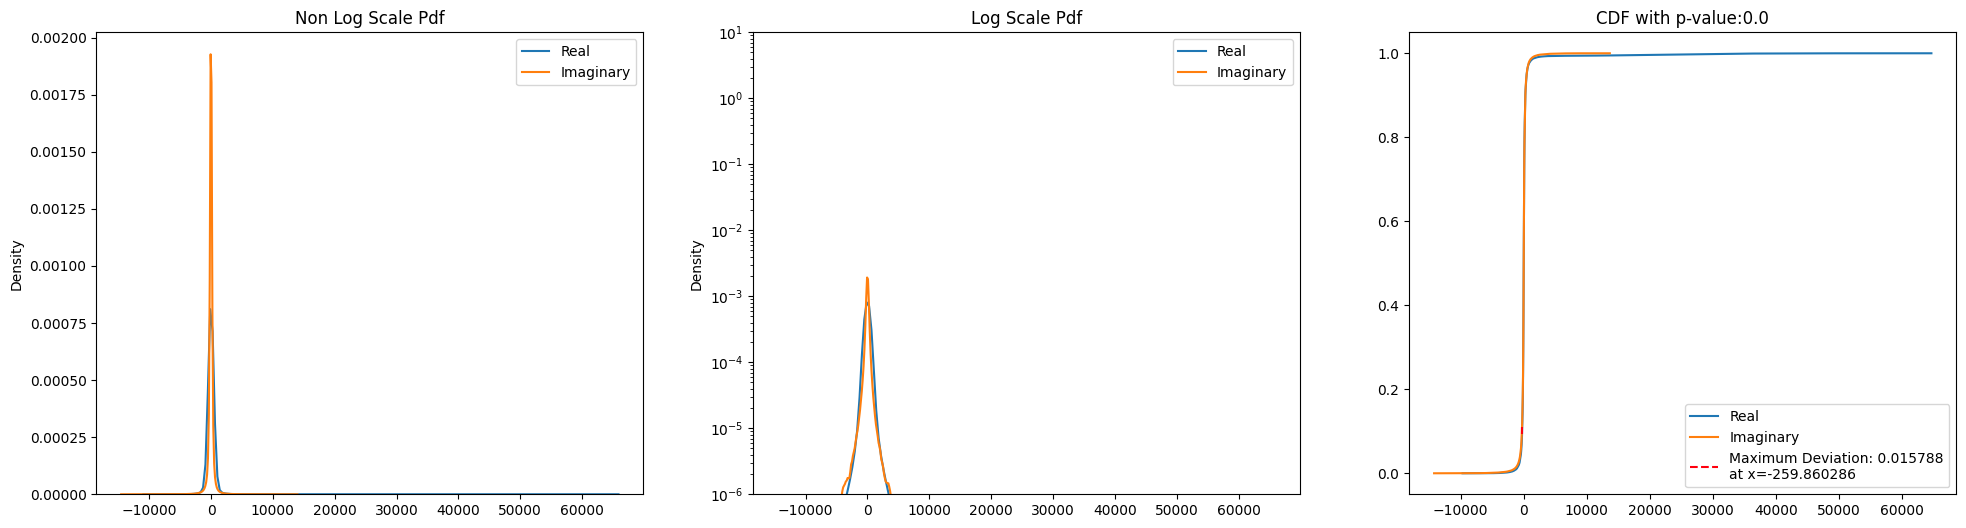

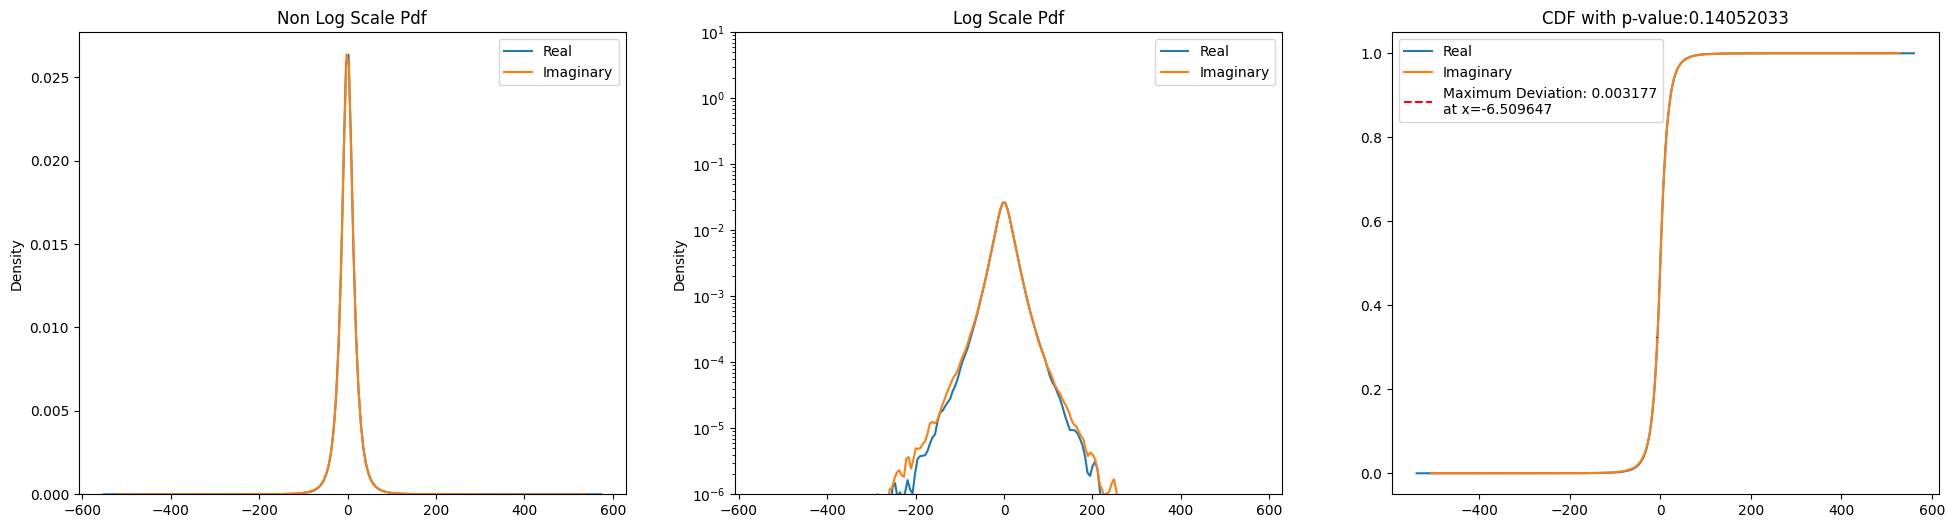

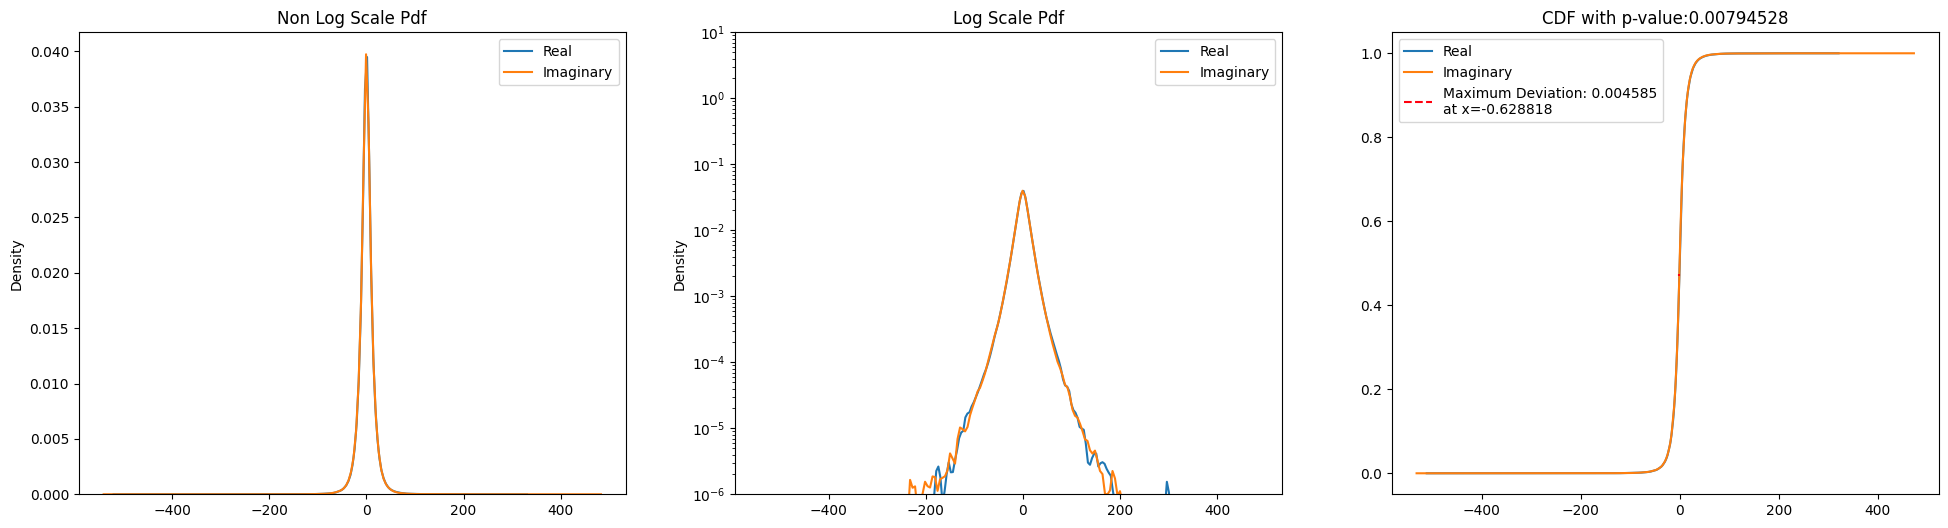

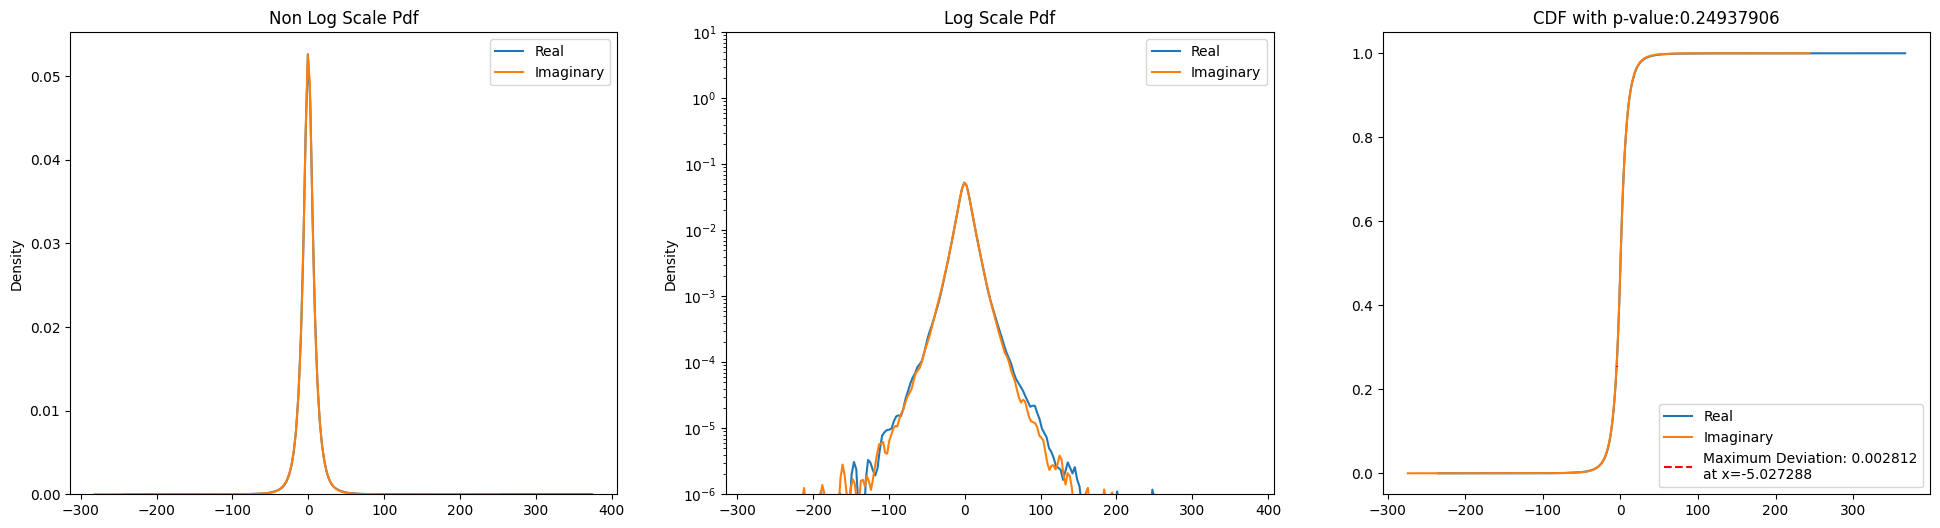

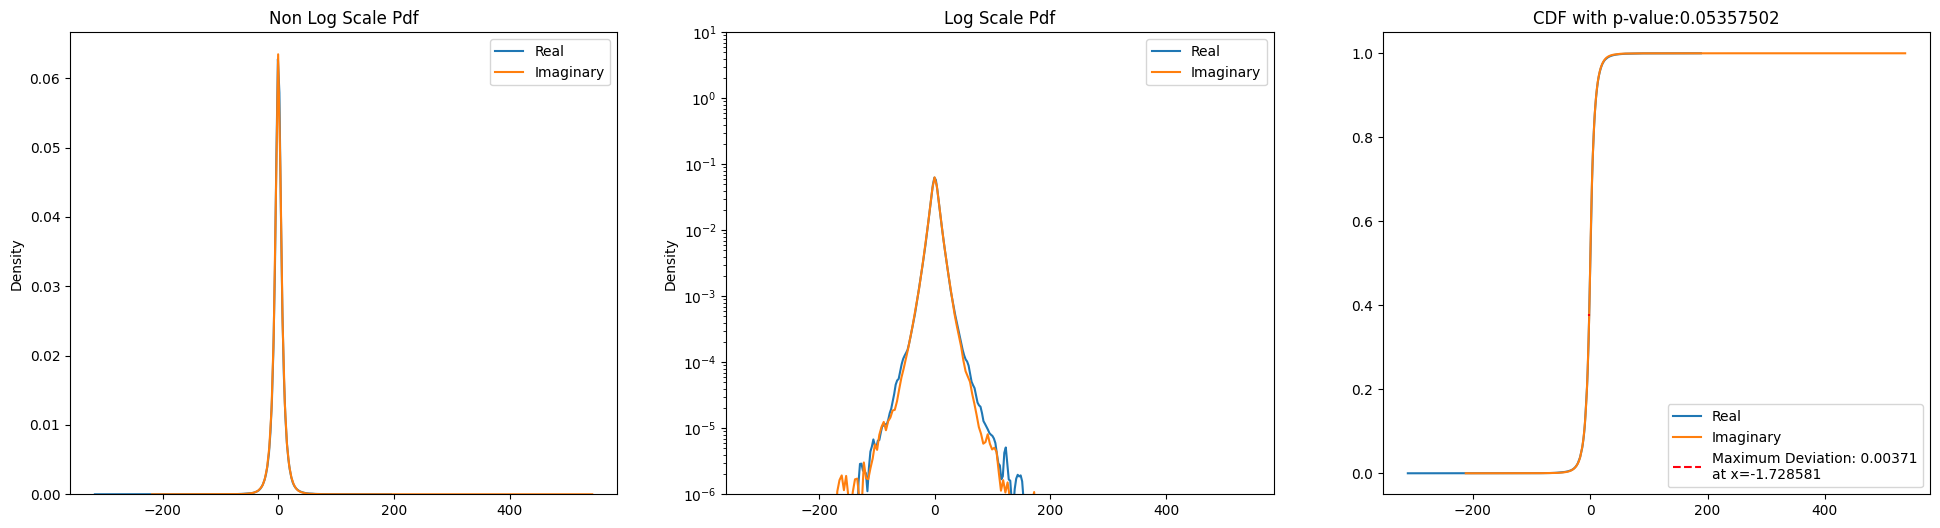

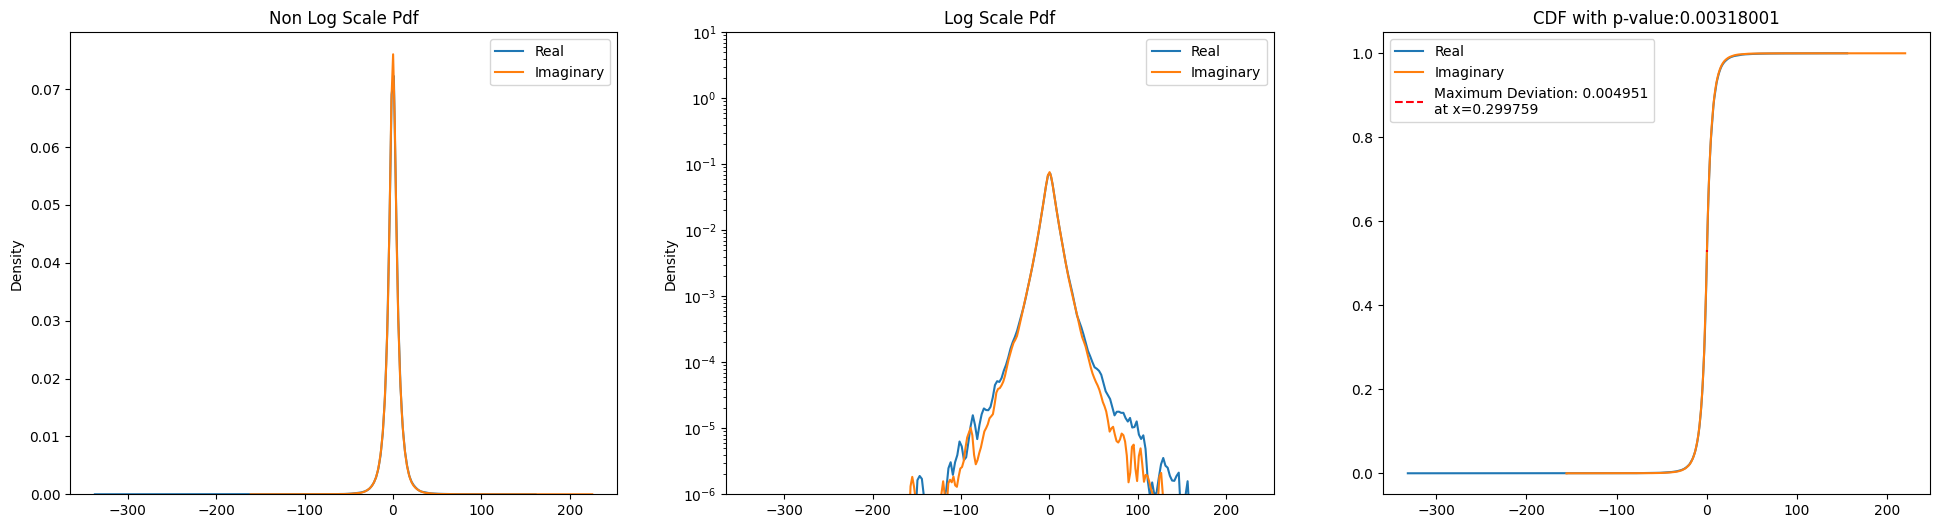

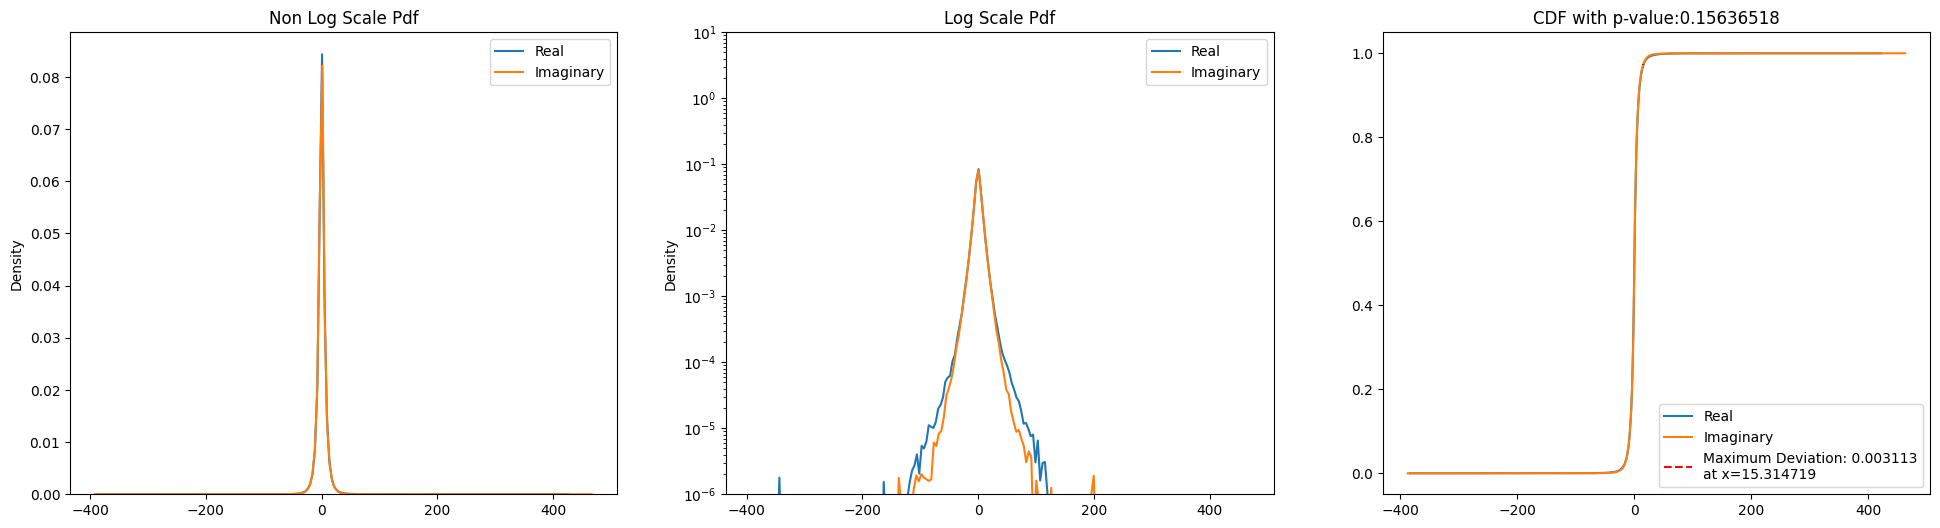

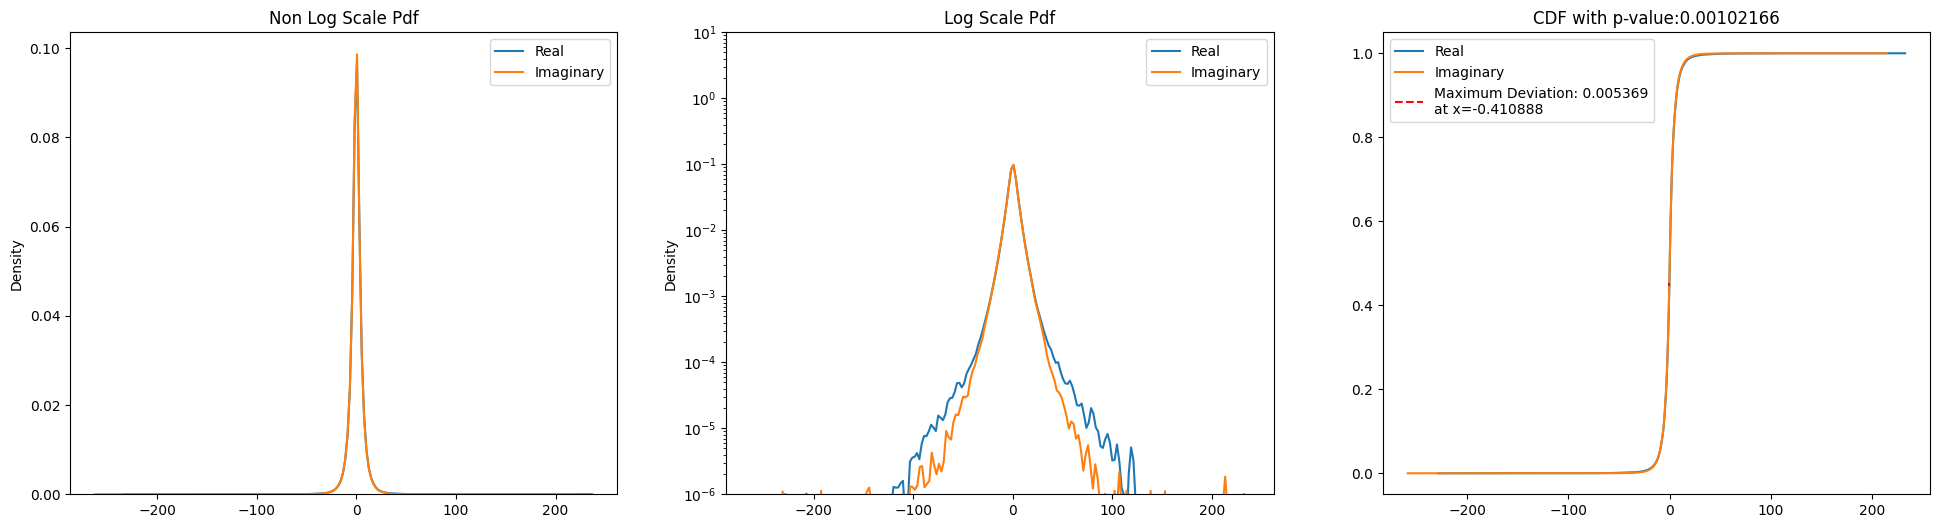

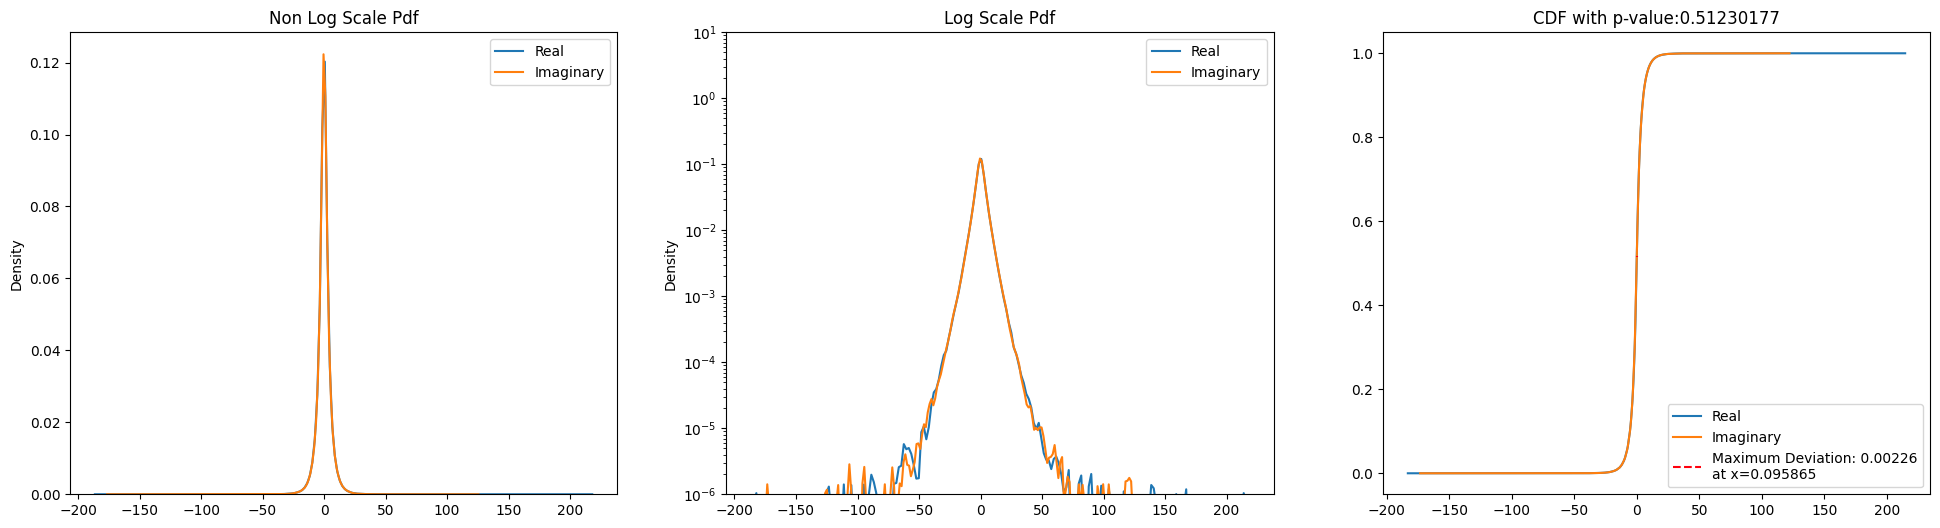

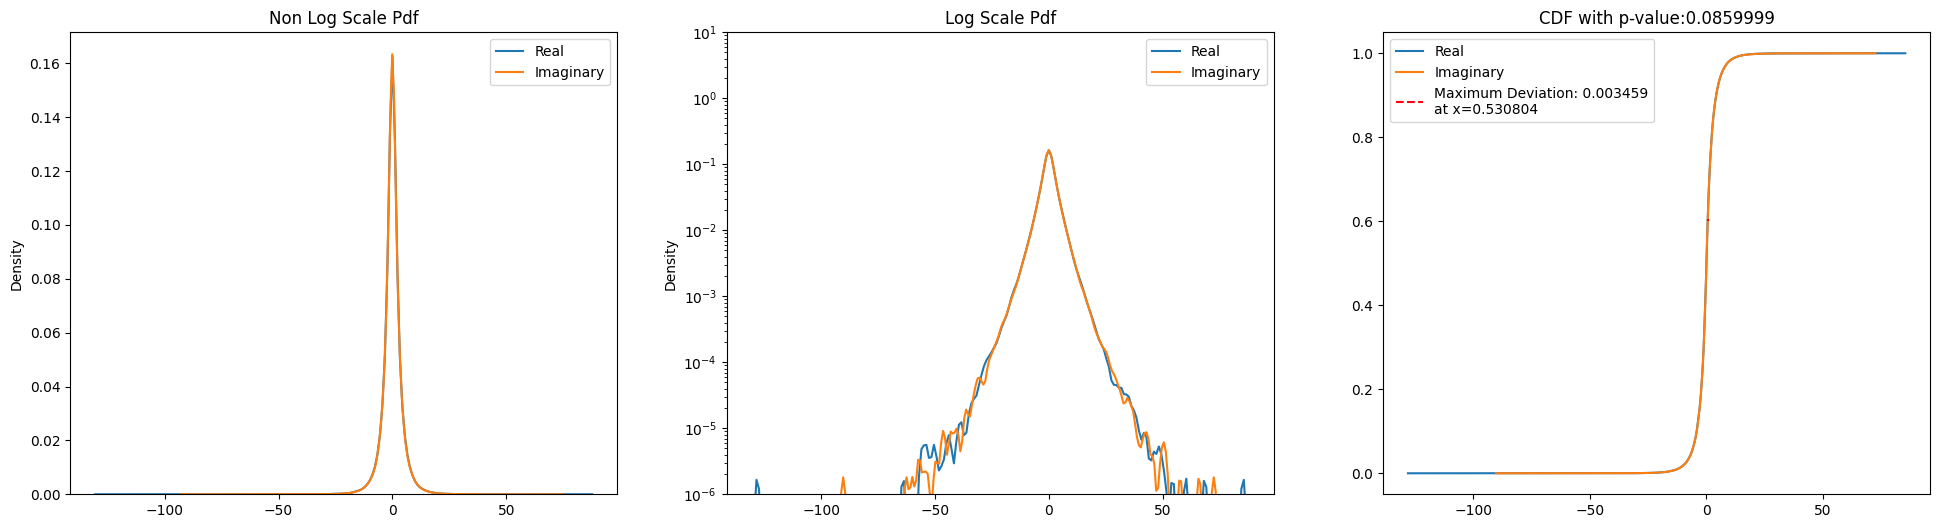

In [13]:
coeffs, mags = convert_fourier_list(data_dir, c = 2, image_opener = npz_opener_pickle)
real_data = np.real(coeffs)
imag_data = np.imag(coeffs)
n= len(real_data)
for i in range(10):
    twoSampleComparisonPlots(real_data[n//100 * i*10: n//100 * (i*10+1)], imag_data[n//100 * i*10: n//100 * (i*10+1)], samp1name="Real", samp2name="Imaginary")


# Infrared

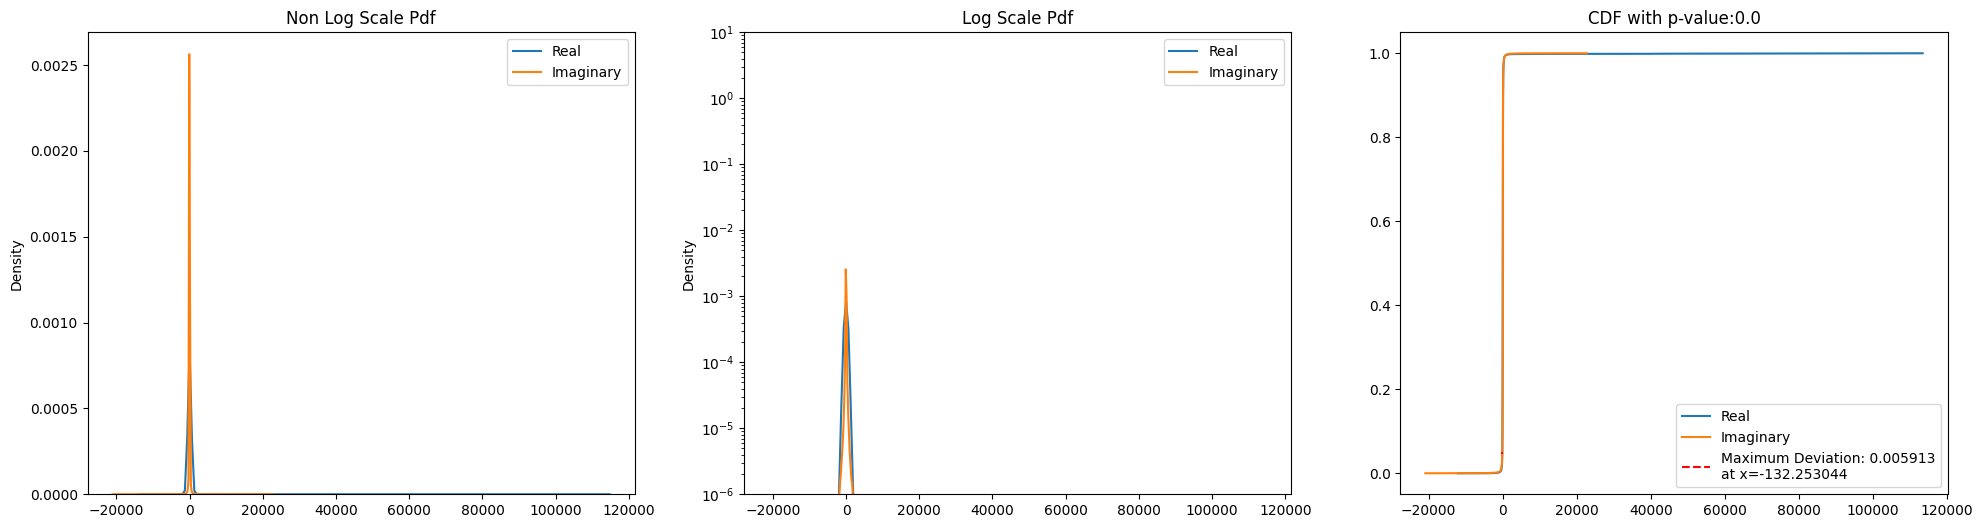

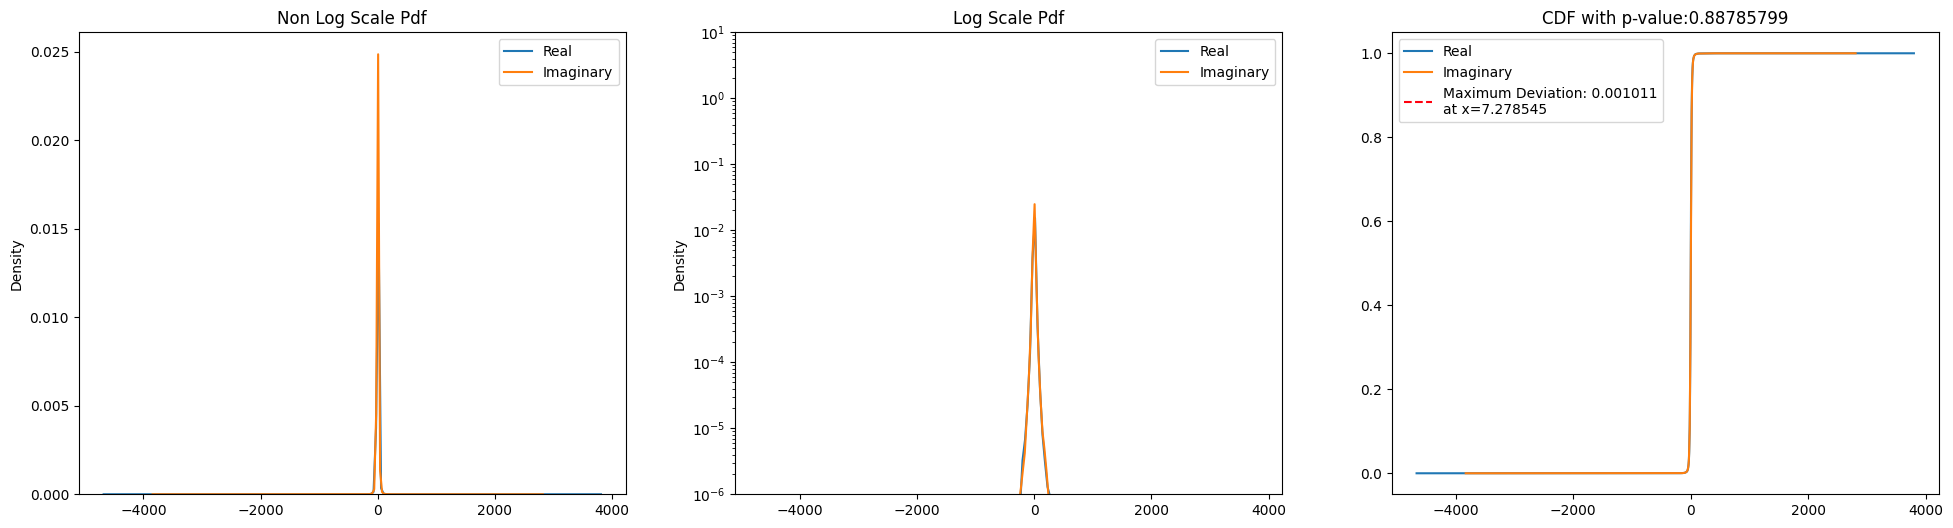

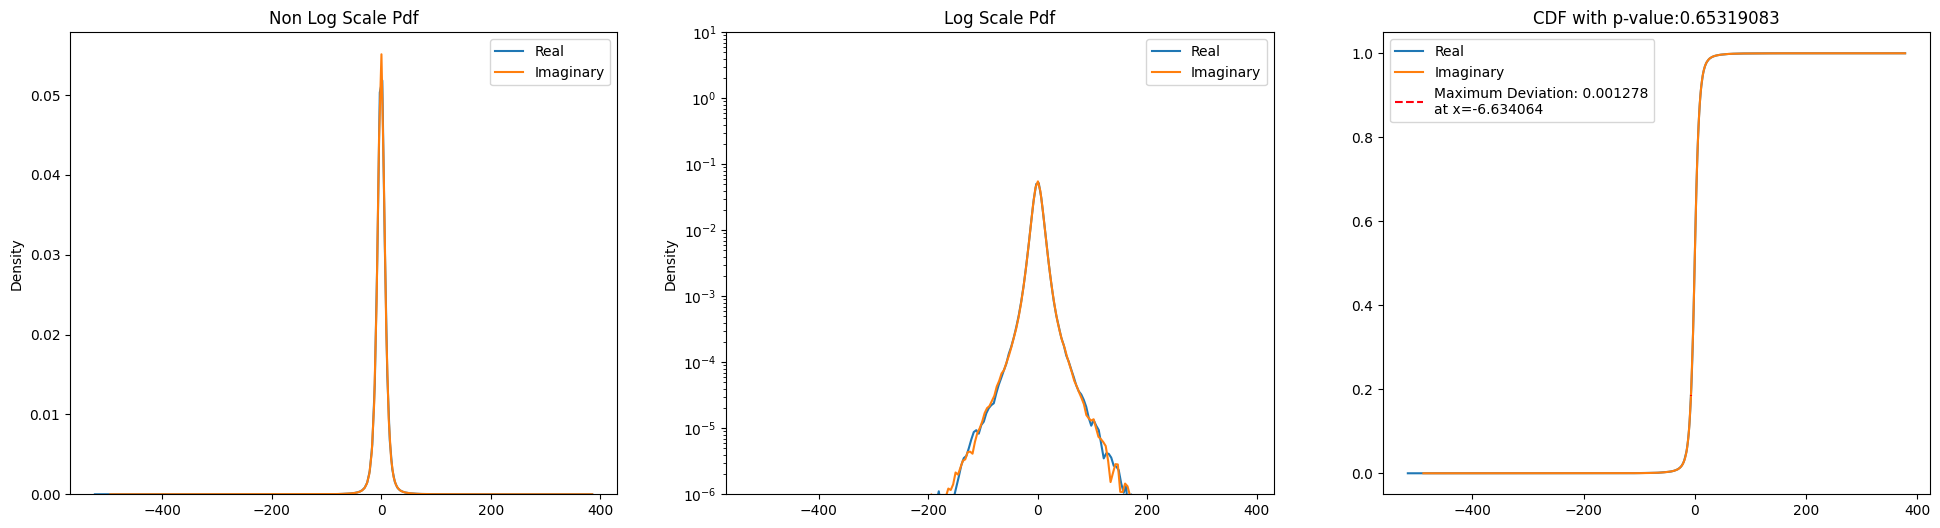

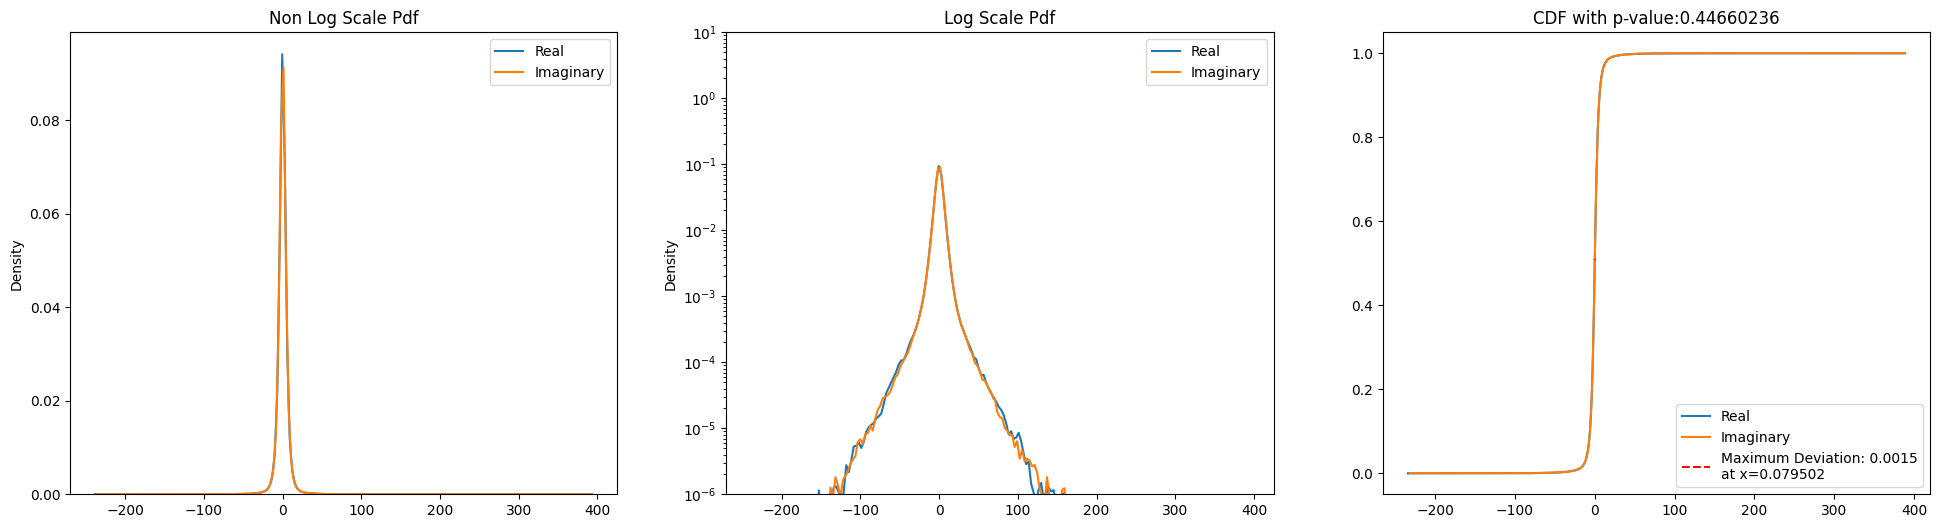

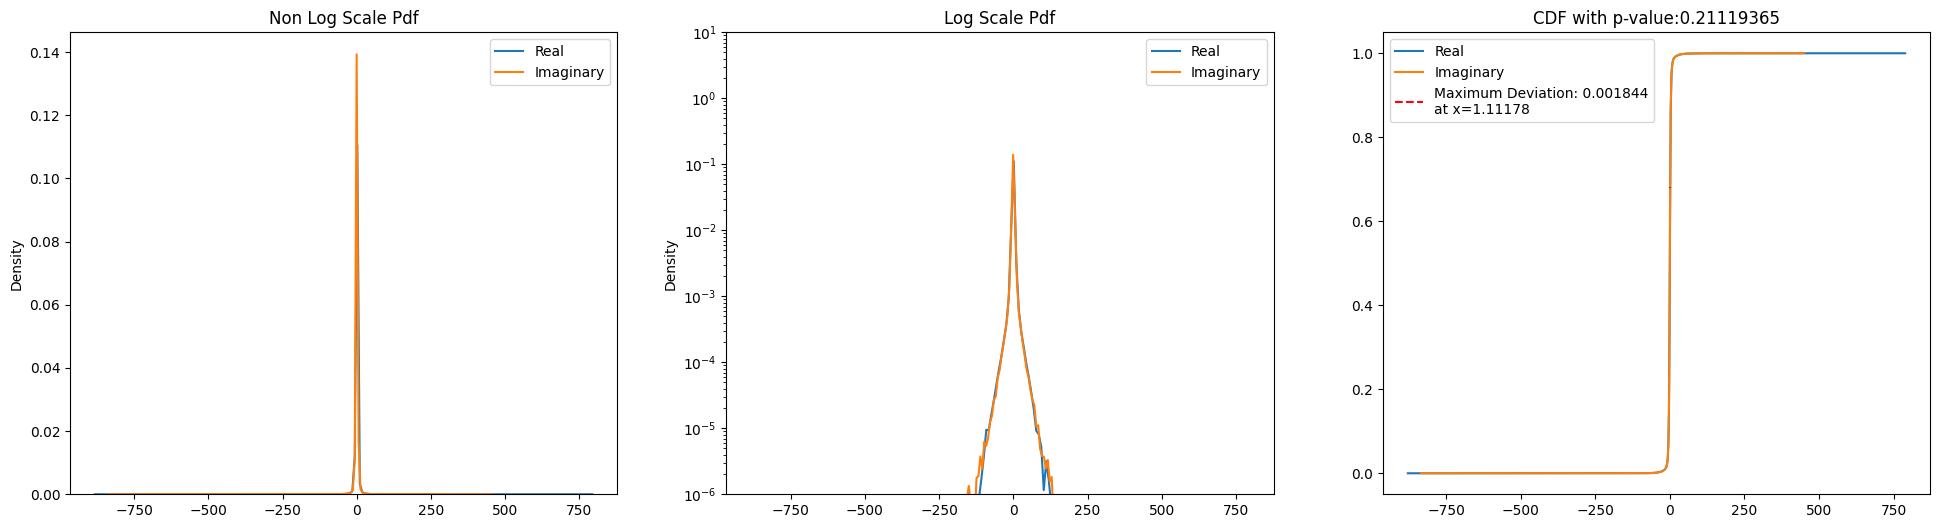

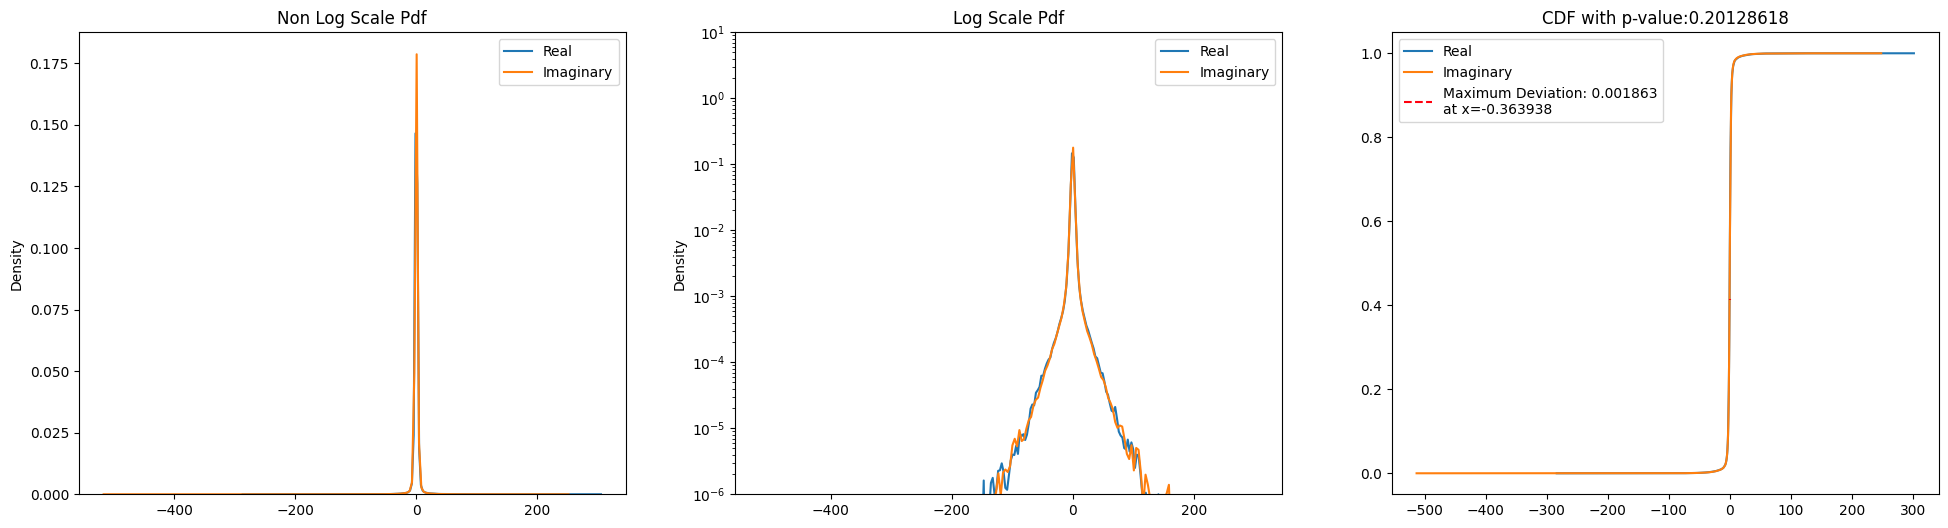

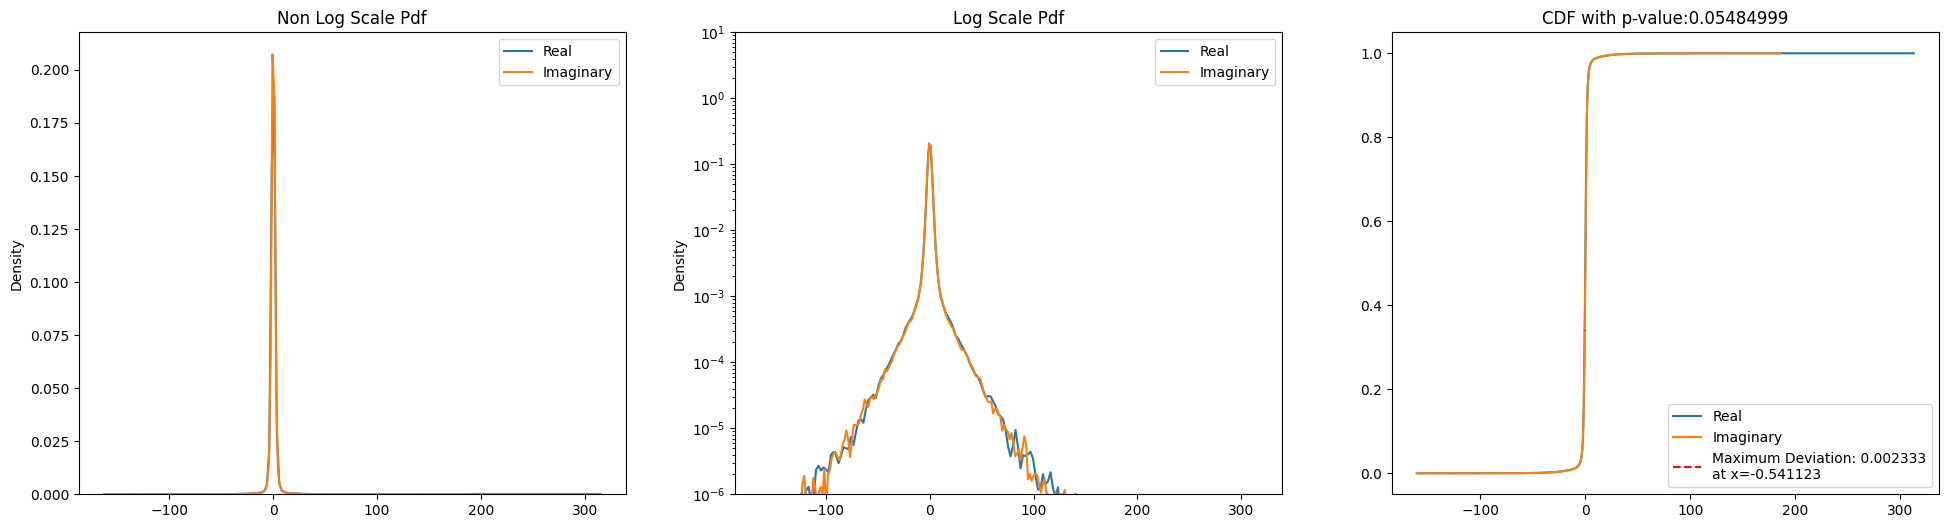

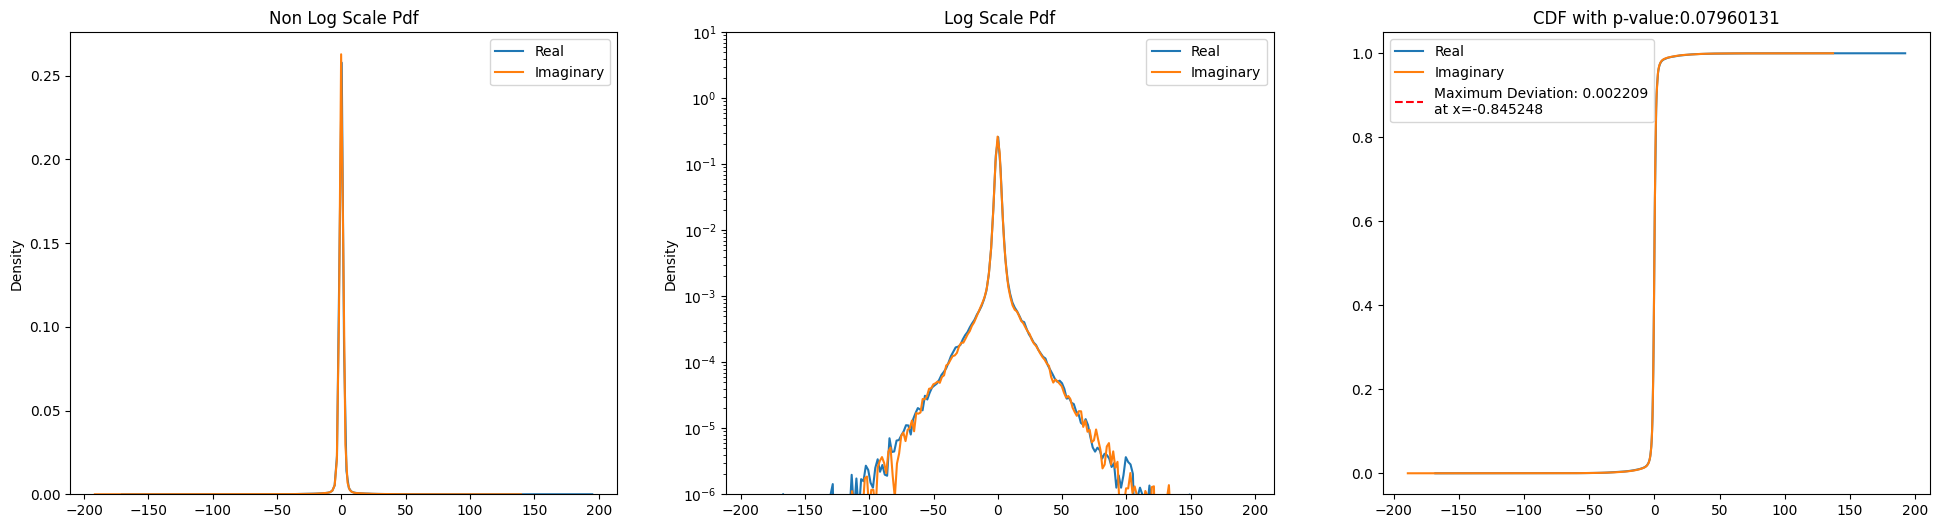

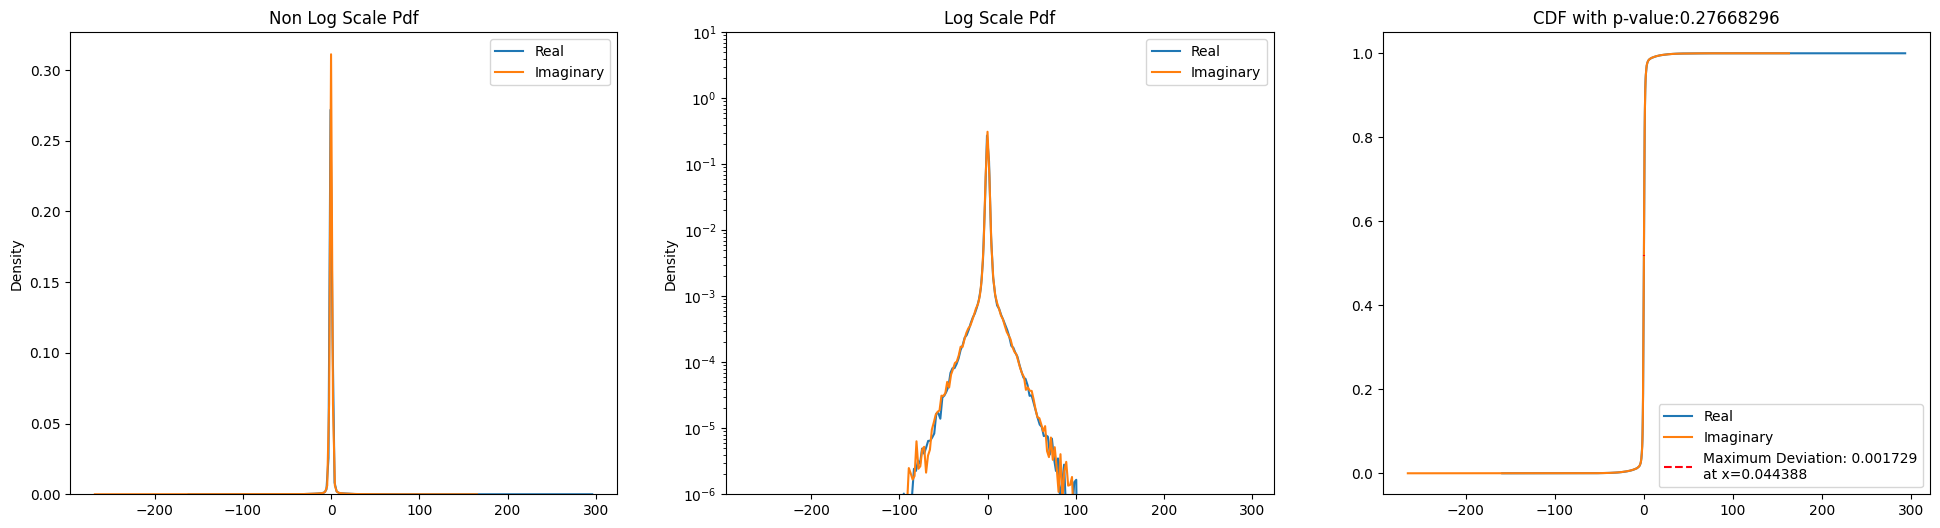

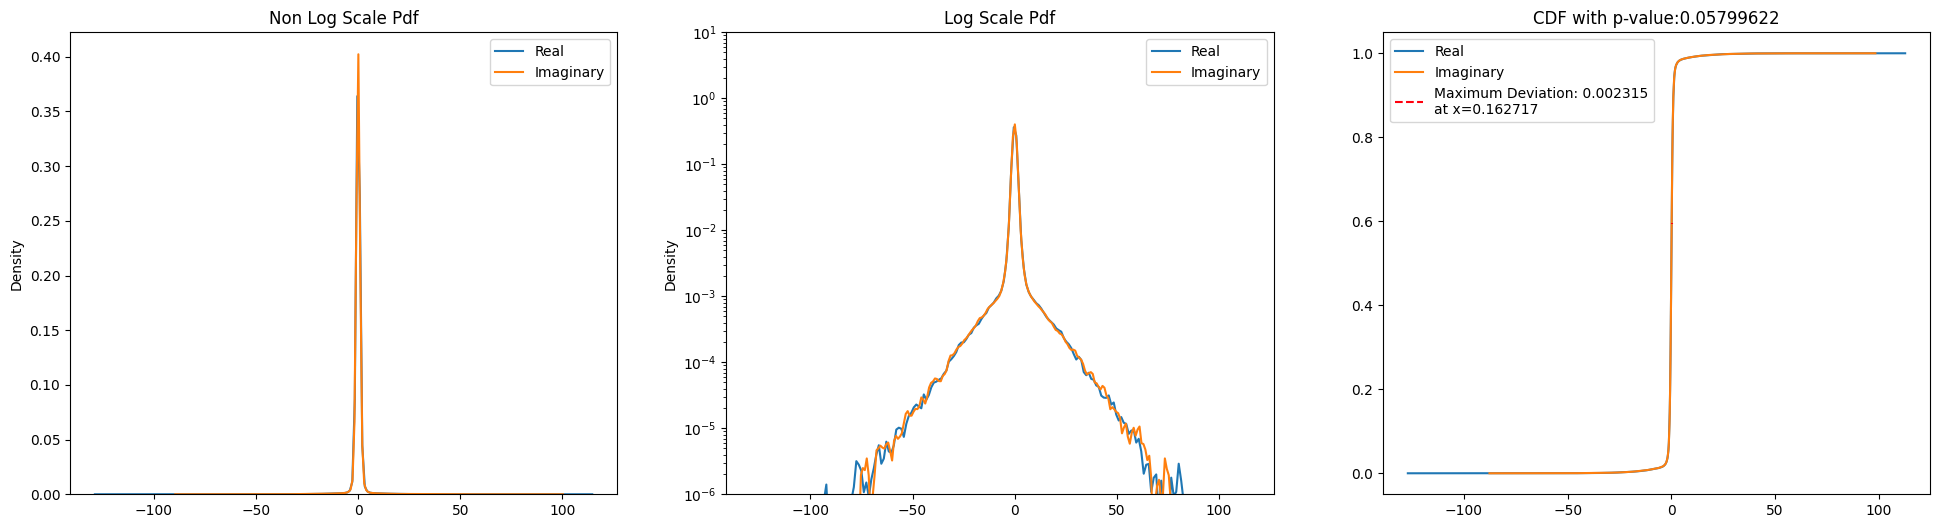

In [9]:
infra_dir = os.path.join(ROOT_DIR, 'raw-data','agriVision','toy-agriVision-nearIR')
coeffs, mags = convert_fourier_list(infra_dir, c = 4)
real_data = np.real(coeffs)
imag_data = np.imag(coeffs)
n= len(real_data)
for i in range(10):
    twoSampleComparisonPlots(real_data[n//100 * i*10: n//100 * (i*10+1)], imag_data[n//100 * i*10: n//100 * (i*10+1)], samp1name="Real", samp2name="Imaginary")


In [14]:
n = len(file_list)

# Red

In [15]:
red_converted = convert_to_fourier_basis(data_dir, "red", threshold =0.02, max_depth = 9, presplit= 2, image_opener = npz_opener_pickle)
red_converted["number_of_coefficents"] = red_converted["data"].apply(lambda x:len(x))/(2 *n)
red_converted

Both Endpoints Are The Same 0.0 and 0.0 Recursion Depth of 8
Both Endpoints Are The Same 0.00390625 and 0.00390625 Recursion Depth of 8
Both Endpoints Are The Same 0.005524271728019903 and 0.005524271728019903 Recursion Depth of 8
Both Endpoints Are The Same 0.0078125 and 0.0078125 Recursion Depth of 9
Both Endpoints Are The Same 0.008734640537108554 and 0.008734640537108554 Recursion Depth of 9
Both Endpoints Are The Same 0.011048543456039806 and 0.011048543456039806 Recursion Depth of 9
Recursion Depth Exceeded Endpoints are 0.01171875 and 0.012352647110032733
Both Endpoints Are The Same 0.014084184669781208 and 0.014084184669781208 Recursion Depth of 9
Both Endpoints Are The Same 0.015625 and 0.015625 Recursion Depth of 9
Recursion Depth Exceeded Endpoints are 0.016105881350068987 and 0.016572815184059706
Both Endpoints Are The Same 0.017469281074217108 and 0.017469281074217108 Recursion Depth of 9
Recursion Depth Exceeded Endpoints are 0.01953125 and 0.019918044974971814
Both Endpo

band channel                           magnitude_endpoints  \
0      1     red                                    (0.0, 0.0)   
1      2     red                      (0.00390625, 0.00390625)   
2      3     red  (0.005524271728019903, 0.005524271728019903)   
3      4     red                        (0.0078125, 0.0078125)   
4      5     red  (0.008734640537108554, 0.008734640537108554)   
..   ...     ...                                           ...   
59    60     red      (0.43849287448778745, 0.482243925935374)   
60    61     red     (0.48225974628889046, 0.5040424961157789)   
61    62     red          (0.50416357286413, 0.52601104747934)   
62    63     red      (0.5262285662202785, 0.5699645770928444)   
63    64     red      (0.5701653277572765, 0.6138159492317302)   

    unique_magnitudes                                               data  \
0                   1  [26379.12890625, 34216.12109375, 48492.6367187...   
1                   1  [-1207.5840689341553, 1064.2592329408053, -151...   
2                   1  [-4327.9492695098725, -115.38082447574695, 187...   
3                   1  [296.6046038157639, -80.8084361763251, 1093.51...   
4                   1  [554.1301272141513, 730.5096409446649, 260.966...   
..                ...                                                ...   
59                667  [3.7118726180832358, 1.239795998862773, 1.5199...   
60                347  [1.2795525440758273, 2.3827493021165242, 2.592...   
61                295  [-0.043250648546198533, 9.139532242481437, -5....   
62                485  [-1.2554981952526623, 0.6176078030098395, -1.3...   
63                349  [-1.5185158129121952, -15.92723253629593, -3.7...   

    number_of_coefficents  
0                     1.0  
1                     2.0  
2                     1.0  
3                     2.0  
4                     2.0  
..                    ...  
59                 2092.0  
60                 1074.0  
61                  790.0  
62                 1128.0  
63                  732.0  

[64 rows x 6 columns]

In [17]:
red_converted = convert_to_fourier_basis(data_dir, "red", threshold =0.04, max_depth = 9, image_opener = npz_opener_pickle)
red_converted["number_of_coefficents"] = red_converted["data"].apply(lambda x:len(x))/(2 *n)
red_converted

Both Endpoints Are The Same 0.0 and 0.0 Recursion Depth of 8
Both Endpoints Are The Same 0.00390625 and 0.00390625 Recursion Depth of 8
Both Endpoints Are The Same 0.005524271728019903 and 0.005524271728019903 Recursion Depth of 8
Both Endpoints Are The Same 0.0078125 and 0.0078125 Recursion Depth of 9
Both Endpoints Are The Same 0.008734640537108554 and 0.008734640537108554 Recursion Depth of 9
Both Endpoints Are The Same 0.011048543456039806 and 0.011048543456039806 Recursion Depth of 9
Recursion Depth Exceeded Endpoints are 0.01171875 and 0.012352647110032733
Both Endpoints Are The Same 0.014084184669781208 and 0.014084184669781208 Recursion Depth of 9
Both Endpoints Are The Same 0.015625 and 0.015625 Recursion Depth of 9
Recursion Depth Exceeded Endpoints are 0.02209708691207961 and 0.022777155839239456
Recursion Depth Exceeded Endpoints are 0.0234375 and 0.02376079113397742
[0.00195312 0.00436732 0.00712946 0.00827357 0.0105179  0.0117006
 0.01333677 0.01485459 0.01604217 0.021836

band channel                           magnitude_endpoints  \
0      1     red                                    (0.0, 0.0)   
1      2     red                      (0.00390625, 0.00390625)   
2      3     red  (0.005524271728019903, 0.005524271728019903)   
3      4     red                        (0.0078125, 0.0078125)   
4      5     red  (0.008734640537108554, 0.008734640537108554)   
5      6     red  (0.011048543456039806, 0.011048543456039806)   
6      7     red            (0.01171875, 0.012352647110032733)   
7      8     red  (0.014084184669781208, 0.014084184669781208)   
8      9     red                          (0.015625, 0.015625)   
9     10     red  (0.016105881350068987, 0.021035800027869155)   
10    11     red   (0.02209708691207961, 0.022777155839239456)   
11    12     red              (0.0234375, 0.02376079113397742)   
12    13     red  (0.024705294220065465, 0.026203921611325662)   
13    14     red             (0.02734375, 0.03221176270013797)   
14    15     red    (0.03314563036811941, 0.04314594147338774)   
15    16     red    (0.04367320268554277, 0.05482683143600859)   
16    17     red    (0.05524271728019903, 0.06548068208687582)   
17    18     red    (0.06629126073623882, 0.07674563556401758)   
18    19     red    (0.07694420157653206, 0.08734640537108554)   
19    20     red    (0.08778205099314153, 0.10944473223532734)   
20    21     red     (0.10965366287201718, 0.1313104399529032)   
21    22     red     (0.1317744358861953, 0.17508542836730445)   
22    23     red     (0.1754336841631689, 0.21909849472468998)   
23    24     red     (0.21930732574403436, 0.2627660946694084)   
24    25     red     (0.26311428311013924, 0.3505410508347239)   
25    26     red     (0.3508021291113589, 0.43835365934831944)   
26    27     red       (0.43849287448778745, 0.52601104747934)   
27    28     red      (0.5262285662202785, 0.6138159492317302)   

    unique_magnitudes                                               data  \
0                   1  [26379.12890625, 34216.12109375, 48492.6367187...   
1                   1  [-1207.5840689341553, 1064.2592329408053, -151...   
2                   1  [-4327.9492695098725, -115.38082447574695, 187...   
3                   1  [296.6046038157639, -80.8084361763251, 1093.51...   
4                   1  [554.1301272141513, 730.5096409446649, 260.966...   
5                   1  [-362.5650932942121, -523.0845086238178, -999....   
6                   2  [-797.4840571810738, -251.93731872089904, -249...   
7                   1  [129.18938226114471, -108.98000343082245, 827....   
8                   1  [-517.893419133141, 372.35687707940895, 454.84...   
9                   6  [-647.067920117539, 773.3703344530072, -121.96...   
10                  2  [-744.9776821921913, -30.841815646194775, -214...   
11                  2  [-156.9514092996419, 236.07613158649542, 228.3...   
12                  3  [-44.67632558648495, -507.1661575289439, -110....   
13                  9  [280.59992142030785, 261.36203945315214, -12.9...   
14                 21  [-108.51598307176806, -152.28177594382203, -92...   
15                 26  [89.06031754244005, -248.39653816458525, 294.2...   
16                 28  [-12.351069728719466, 89.84991588478736, 190.3...   
17                 33  [52.08988698503566, -50.02680392798368, 54.278...   
18                 38  [-54.66913995370146, 60.32128380072386, 27.901...   
19                 88  [-59.282191219858056, 33.194432906063184, -20....   
20                105  [-34.989876736561484, -9.995405166419612, -29....   
21                251  [23.99906540802446, -13.952621457388936, -13.8...   
22                319  [6.169403596086221, 2.9160297014282954, -10.52...   
23                376  [-11.895533477003745, -15.789947686131955, -1....   
24                927  [-0.9244029680765982, 8.48079380955613, -21.01...   
25               1163  [-1.0856341826250682, -0.3385205302087444, -12...   
26               1309  [3.71187261808

In [18]:
filtered_red = red_converted[red_converted["magnitude_endpoints"].apply(lambda x: x[0] > 0.026203921611325662)]
filtered_red

band channel                         magnitude_endpoints  \
13    14     red           (0.02734375, 0.03221176270013797)   
14    15     red  (0.03314563036811941, 0.04314594147338774)   
15    16     red  (0.04367320268554277, 0.05482683143600859)   
16    17     red  (0.05524271728019903, 0.06548068208687582)   
17    18     red  (0.06629126073623882, 0.07674563556401758)   
18    19     red  (0.07694420157653206, 0.08734640537108554)   
19    20     red  (0.08778205099314153, 0.10944473223532734)   
20    21     red   (0.10965366287201718, 0.1313104399529032)   
21    22     red   (0.1317744358861953, 0.17508542836730445)   
22    23     red   (0.1754336841631689, 0.21909849472468998)   
23    24     red   (0.21930732574403436, 0.2627660946694084)   
24    25     red   (0.26311428311013924, 0.3505410508347239)   
25    26     red   (0.3508021291113589, 0.43835365934831944)   
26    27     red     (0.43849287448778745, 0.52601104747934)   
27    28     red    (0.5262285662202785, 0.6138159492317302)   

    unique_magnitudes                                               data  \
13                  9  [280.59992142030785, 261.36203945315214, -12.9...   
14                 21  [-108.51598307176806, -152.28177594382203, -92...   
15                 26  [89.06031754244005, -248.39653816458525, 294.2...   
16                 28  [-12.351069728719466, 89.84991588478736, 190.3...   
17                 33  [52.08988698503566, -50.02680392798368, 54.278...   
18                 38  [-54.66913995370146, 60.32128380072386, 27.901...   
19                 88  [-59.282191219858056, 33.194432906063184, -20....   
20                105  [-34.989876736561484, -9.995405166419612, -29....   
21                251  [23.99906540802446, -13.952621457388936, -13.8...   
22                319  [6.169403596086221, 2.9160297014282954, -10.52...   
23                376  [-11.895533477003745, -15.789947686131955, -1....   
24                927  [-0.9244029680765982, 8.48079380955613, -21.01...   
25               1163  [-1.0856341826250682, -0.3385205302087444, -12...   
26               1309  [3.7118726180832358, 1.239795998862773, 1.5199...   
27                834  [-1.2554981952526623, 0.6176078030098395, -1.3...   

    number_of_coefficents  
13                   21.0  
14                   44.0  
15                   62.0  
16                   68.0  
17                   84.0  
18                   96.0  
19                  228.0  
20                  280.0  
21                  698.0  
22                  912.0  
23                 1094.0  
24                 2782.0  
25                 3592.0  
26                 3956.0  
27                 1860.0

 
0.2098 x - 6.343


/var/folders/hn/7wzd6_fs6wncrcy89b9jdj100000gn/T/ipykernel_10352/629385160.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_red["magnitude_length"] = filtered_red["magnitude_endpoints"].apply(lambda x: x[1] - x[0])


1.2334247678156935

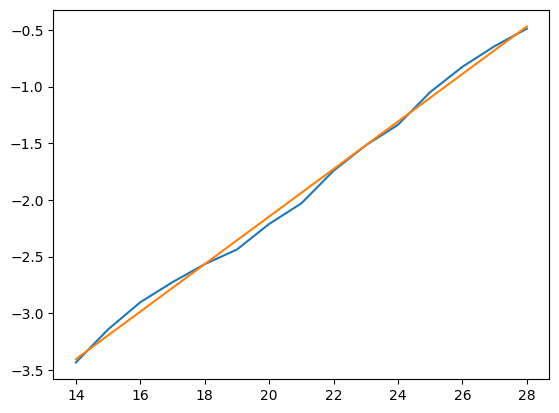

In [19]:

filtered_red["magnitude_length"] = filtered_red["magnitude_endpoints"].apply(lambda x: x[1] - x[0])
x = filtered_red["band"].to_numpy()
y = filtered_red["magnitude_endpoints"].apply(lambda x: x[1]).to_numpy()
logy = np.log(y)
plt.plot(x, logy)
print(np.poly1d(np.polyfit(x, logy, 1)))
plt.plot(x, np.poly1d(np.polyfit(x, logy, 1))(x))
np.exp(np.polyfit(x, logy, 1)[0])

# Green

In [21]:
green_converted = convert_to_fourier_basis(data_dir, "green", threshold =0.04, max_depth = 9, image_opener = npz_opener_pickle)
green_converted["number_of_coefficents"] = green_converted["data"].apply(lambda x:len(x))/(2 *n)
green_converted

Both Endpoints Are The Same 0.0 and 0.0 Recursion Depth of 8
Both Endpoints Are The Same 0.00390625 and 0.00390625 Recursion Depth of 8
Both Endpoints Are The Same 0.005524271728019903 and 0.005524271728019903 Recursion Depth of 8
Both Endpoints Are The Same 0.0078125 and 0.0078125 Recursion Depth of 9
Both Endpoints Are The Same 0.008734640537108554 and 0.008734640537108554 Recursion Depth of 9
Both Endpoints Are The Same 0.011048543456039806 and 0.011048543456039806 Recursion Depth of 9
Recursion Depth Exceeded Endpoints are 0.01171875 and 0.012352647110032733
Both Endpoints Are The Same 0.014084184669781208 and 0.014084184669781208 Recursion Depth of 9
Both Endpoints Are The Same 0.015625 and 0.015625 Recursion Depth of 9
Recursion Depth Exceeded Endpoints are 0.02209708691207961 and 0.022777155839239456
Recursion Depth Exceeded Endpoints are 0.0234375 and 0.02376079113397742
[0.00195312 0.00436732 0.00712946 0.00827357 0.0105179  0.0117006
 0.01333677 0.01485459 0.01604217 0.021836

band channel                           magnitude_endpoints  \
0      1   green                                    (0.0, 0.0)   
1      2   green                      (0.00390625, 0.00390625)   
2      3   green  (0.005524271728019903, 0.005524271728019903)   
3      4   green                        (0.0078125, 0.0078125)   
4      5   green  (0.008734640537108554, 0.008734640537108554)   
5      6   green  (0.011048543456039806, 0.011048543456039806)   
6      7   green            (0.01171875, 0.012352647110032733)   
7      8   green  (0.014084184669781208, 0.014084184669781208)   
8      9   green                          (0.015625, 0.015625)   
9     10   green  (0.016105881350068987, 0.021035800027869155)   
10    11   green   (0.02209708691207961, 0.022777155839239456)   
11    12   green              (0.0234375, 0.02376079113397742)   
12    13   green  (0.024705294220065465, 0.026203921611325662)   
13    14   green             (0.02734375, 0.03221176270013797)   
14    15   green    (0.03314563036811941, 0.04314594147338774)   
15    16   green    (0.04367320268554277, 0.05482683143600859)   
16    17   green    (0.05524271728019903, 0.06548068208687582)   
17    18   green    (0.06629126073623882, 0.08734640537108554)   
18    19   green    (0.08778205099314153, 0.10944473223532734)   
19    20   green     (0.10965366287201718, 0.1313104399529032)   
20    21   green     (0.1317744358861953, 0.17508542836730445)   
21    22   green     (0.1754336841631689, 0.21909849472468998)   
22    23   green     (0.21930732574403436, 0.2627660946694084)   
23    24   green     (0.26311428311013924, 0.3505410508347239)   
24    25   green     (0.3508021291113589, 0.43835365934831944)   
25    26   green       (0.43849287448778745, 0.52601104747934)   
26    27   green      (0.5262285662202785, 0.6138159492317302)   

    unique_magnitudes                                               data  \
0                   1  [24739.984375, 34184.08984375, 45530.0546875, ...   
1                   1  [-1681.9793620875748, 1163.2670131087223, -277...   
2                   1  [-4997.130031654578, -461.8127926718754, 1696....   
3                   1  [-75.50084135518156, -216.6134690715197, -106....   
4                   1  [103.37924072255626, 197.47530265116478, -490....   
5                   1  [-39.685484516807264, -78.90267466686167, -119...   
6                   2  [-312.25278691222627, -607.4167947037723, -206...   
7                   1  [229.29129974590302, 149.92387744392818, 245.3...   
8                   1  [-609.4857897742423, 423.90934629535104, 123.3...   
9                   6  [-381.9358731381369, 582.9998960340063, -211.8...   
10                  2  [-164.65880197512007, -18.942846424360816, -38...   
11                  2  [141.00571527370556, 321.16293970806487, 315.6...   
12                  3  [-258.8317423611481, -491.1630104824254, -121....   
13                  9  [398.5015053061843, 113.65247699978143, 59.996...   
14                 21  [-3.862877021770279, 10.944305640678888, -136....   
15                 26  [128.91870474963957, -205.26768862854072, 238....   
16                 28  [-34.20851375044345, 50.075896470666486, 187.2...   
17                 71  [47.04928180079008, 28.120103788633333, 90.622...   
18                 88  [-71.14418703995281, 39.48042332808962, -35.43...   
19                105  [-18.40962505846299, -8.430189192271257, -15.7...   
20                251  [22.00189615019707, -15.890893819232744, -24.6...   
21                319  [13.346378435719277, 0.5163567878573514, -11.9...   
22                376  [-1.1274789375129213, -20.499837835254574, -6....   
23                927  [-0.44492090380210936, 8.702604066867806, -22....   
24               1163  [-0.76656764031625, 0.48651037918686146, -12.8...   
25               1309  [3.429243174210027, 1.8447243447596957, 1.3614...   
26                834  [-1.015740464733959, 1.0531499991855884, -0.28...   

    number_of_coefficents 

In [22]:
filtered_green = green_converted[green_converted["magnitude_endpoints"].apply(lambda x: x[0] > 0.026203921611325662)]
filtered_green

band channel                         magnitude_endpoints  \
13    14   green           (0.02734375, 0.03221176270013797)   
14    15   green  (0.03314563036811941, 0.04314594147338774)   
15    16   green  (0.04367320268554277, 0.05482683143600859)   
16    17   green  (0.05524271728019903, 0.06548068208687582)   
17    18   green  (0.06629126073623882, 0.08734640537108554)   
18    19   green  (0.08778205099314153, 0.10944473223532734)   
19    20   green   (0.10965366287201718, 0.1313104399529032)   
20    21   green   (0.1317744358861953, 0.17508542836730445)   
21    22   green   (0.1754336841631689, 0.21909849472468998)   
22    23   green   (0.21930732574403436, 0.2627660946694084)   
23    24   green   (0.26311428311013924, 0.3505410508347239)   
24    25   green   (0.3508021291113589, 0.43835365934831944)   
25    26   green     (0.43849287448778745, 0.52601104747934)   
26    27   green    (0.5262285662202785, 0.6138159492317302)   

    unique_magnitudes                                               data  \
13                  9  [398.5015053061843, 113.65247699978143, 59.996...   
14                 21  [-3.862877021770279, 10.944305640678888, -136....   
15                 26  [128.91870474963957, -205.26768862854072, 238....   
16                 28  [-34.20851375044345, 50.075896470666486, 187.2...   
17                 71  [47.04928180079008, 28.120103788633333, 90.622...   
18                 88  [-71.14418703995281, 39.48042332808962, -35.43...   
19                105  [-18.40962505846299, -8.430189192271257, -15.7...   
20                251  [22.00189615019707, -15.890893819232744, -24.6...   
21                319  [13.346378435719277, 0.5163567878573514, -11.9...   
22                376  [-1.1274789375129213, -20.499837835254574, -6....   
23                927  [-0.44492090380210936, 8.702604066867806, -22....   
24               1163  [-0.76656764031625, 0.48651037918686146, -12.8...   
25               1309  [3.429243174210027, 1.8447243447596957, 1.3614...   
26                834  [-1.015740464733959, 1.0531499991855884, -0.28...   

    number_of_coefficents  
13                   21.0  
14                   44.0  
15                   62.0  
16                   68.0  
17                  180.0  
18                  228.0  
19                  280.0  
20                  698.0  
21                  912.0  
22                 1094.0  
23                 2782.0  
24                 3592.0  
25                 3956.0  
26                 1860.0

 
0.2289 x - 6.585


/var/folders/hn/7wzd6_fs6wncrcy89b9jdj100000gn/T/ipykernel_10352/3855697063.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_green["magnitude_length"] = filtered_green["magnitude_endpoints"].apply(lambda x: x[1] - x[0])


1.257229848551886

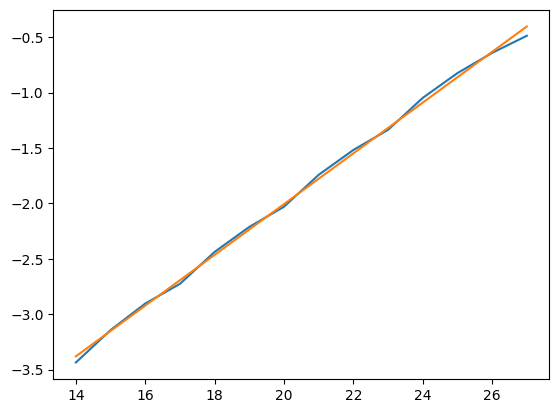

In [23]:

filtered_green["magnitude_length"] = filtered_green["magnitude_endpoints"].apply(lambda x: x[1] - x[0])
x = filtered_green["band"].to_numpy()
y = filtered_green["magnitude_endpoints"].apply(lambda x: x[1]).to_numpy()
logy = np.log(y)
plt.plot(x, logy)
print(np.poly1d(np.polyfit(x, logy, 1)))
plt.plot(x, np.poly1d(np.polyfit(x, logy, 1))(x))
np.exp(np.polyfit(x, logy, 1)[0])

# Blue

In [25]:
blue_converted = convert_to_fourier_basis(data_dir, "blue", threshold =0.04, max_depth = 9, image_opener = npz_opener_pickle)
blue_converted["number_of_coefficents"] = blue_converted["data"].apply(lambda x:len(x))/(2 *n)
blue_converted

Both Endpoints Are The Same 0.0 and 0.0 Recursion Depth of 8
Both Endpoints Are The Same 0.00390625 and 0.00390625 Recursion Depth of 8
Both Endpoints Are The Same 0.005524271728019903 and 0.005524271728019903 Recursion Depth of 8
Both Endpoints Are The Same 0.0078125 and 0.0078125 Recursion Depth of 9
Both Endpoints Are The Same 0.008734640537108554 and 0.008734640537108554 Recursion Depth of 9
Both Endpoints Are The Same 0.011048543456039806 and 0.011048543456039806 Recursion Depth of 9
Recursion Depth Exceeded Endpoints are 0.01171875 and 0.012352647110032733
Both Endpoints Are The Same 0.014084184669781208 and 0.014084184669781208 Recursion Depth of 9
Both Endpoints Are The Same 0.015625 and 0.015625 Recursion Depth of 9
Recursion Depth Exceeded Endpoints are 0.02209708691207961 and 0.022777155839239456
Recursion Depth Exceeded Endpoints are 0.0234375 and 0.02376079113397742
[0.00195312 0.00436732 0.00712946 0.00827357 0.0105179  0.0117006
 0.01333677 0.01485459 0.01604217 0.021836

band channel                           magnitude_endpoints  \
0      1    blue                                    (0.0, 0.0)   
1      2    blue                      (0.00390625, 0.00390625)   
2      3    blue  (0.005524271728019903, 0.005524271728019903)   
3      4    blue                        (0.0078125, 0.0078125)   
4      5    blue  (0.008734640537108554, 0.008734640537108554)   
5      6    blue  (0.011048543456039806, 0.011048543456039806)   
6      7    blue            (0.01171875, 0.012352647110032733)   
7      8    blue  (0.014084184669781208, 0.014084184669781208)   
8      9    blue                          (0.015625, 0.015625)   
9     10    blue  (0.016105881350068987, 0.021035800027869155)   
10    11    blue   (0.02209708691207961, 0.022777155839239456)   
11    12    blue              (0.0234375, 0.02376079113397742)   
12    13    blue  (0.024705294220065465, 0.026203921611325662)   
13    14    blue             (0.02734375, 0.03221176270013797)   
14    15    blue    (0.03314563036811941, 0.04314594147338774)   
15    16    blue    (0.04367320268554277, 0.05482683143600859)   
16    17    blue    (0.05524271728019903, 0.06548068208687582)   
17    18    blue    (0.06629126073623882, 0.08734640537108554)   
18    19    blue    (0.08778205099314153, 0.10944473223532734)   
19    20    blue     (0.10965366287201718, 0.1313104399529032)   
20    21    blue     (0.1317744358861953, 0.17508542836730445)   
21    22    blue     (0.1754336841631689, 0.21909849472468998)   
22    23    blue     (0.21930732574403436, 0.2627660946694084)   
23    24    blue     (0.26311428311013924, 0.3505410508347239)   
24    25    blue     (0.3508021291113589, 0.43835365934831944)   
25    26    blue       (0.43849287448778745, 0.52601104747934)   
26    27    blue      (0.5262285662202785, 0.6138159492317302)   

    unique_magnitudes                                               data  \
0                   1  [25380.015625, 30578.77734375, 43920.640625, 2...   
1                   1  [-1520.2275748393868, 1562.8455287933048, 265....   
2                   1  [-4643.7397757100125, -1260.2122067650416, 169...   
3                   1  [-171.7275104426355, -489.94825989379376, -458...   
4                   1  [692.5578513828269, -335.28685838382904, -843....   
5                   1  [405.9104975891535, -156.4858476925752, -1402....   
6                   2  [-230.24281338298, -815.8106095748067, -137.16...   
7                   1  [421.991308089531, 366.48884037678977, 38.6995...   
8                   1  [-890.9520068320082, 565.4677741353519, 218.32...   
9                   6  [-550.2459076502664, 650.7289803366609, -278.7...   
10                  2  [-92.29688930976408, 36.231653971962174, -576....   
11                  2  [203.71319030443112, 419.42948108492567, 356.9...   
12                  3  [-360.5157752298981, -566.6402455105681, -55.6...   
13                  9  [581.2759713148598, 31.363408989242558, 75.490...   
14                 21  [10.993307112276197, -31.403730011062546, -139...   
15                 26  [191.37459894725873, -149.59334435183666, 205....   
16                 28  [-74.44370982943924, 1.8862707324412131, 181.1...   
17                 71  [56.41475822080989, 17.86500778642352, 102.732...   
18                 88  [-87.86929749974627, 18.927928129255612, -50.5...   
19                105  [-6.732678161595785, -32.518225278241026, -20....   
20                251  [23.58736927682867, 0.7281139107603014, -28.31...   
21                319  [11.935106543759657, -3.6997033290452706, -17....   
22                376  [-1.1592908424949044, -19.19817025918801, -11....   
23                927  [-0.6656879485130869, 9.547997475596237, -23.2...   
24               1163  [-2.5323999104944566, -3.249996959194638, -11....   
25               1309  [4.40034724858149, 1.442038829231377, 1.202420...   
26                834  [-0.8517065533570736, 0.6921749244468579, -0.6...   

    number_of_coefficents 

In [26]:
filtered_blue = blue_converted[blue_converted["magnitude_endpoints"].apply(lambda x: x[0] > 0.026203921611325662)]
filtered_blue

band channel                         magnitude_endpoints  \
13    14    blue           (0.02734375, 0.03221176270013797)   
14    15    blue  (0.03314563036811941, 0.04314594147338774)   
15    16    blue  (0.04367320268554277, 0.05482683143600859)   
16    17    blue  (0.05524271728019903, 0.06548068208687582)   
17    18    blue  (0.06629126073623882, 0.08734640537108554)   
18    19    blue  (0.08778205099314153, 0.10944473223532734)   
19    20    blue   (0.10965366287201718, 0.1313104399529032)   
20    21    blue   (0.1317744358861953, 0.17508542836730445)   
21    22    blue   (0.1754336841631689, 0.21909849472468998)   
22    23    blue   (0.21930732574403436, 0.2627660946694084)   
23    24    blue   (0.26311428311013924, 0.3505410508347239)   
24    25    blue   (0.3508021291113589, 0.43835365934831944)   
25    26    blue     (0.43849287448778745, 0.52601104747934)   
26    27    blue    (0.5262285662202785, 0.6138159492317302)   

    unique_magnitudes                                               data  \
13                  9  [581.2759713148598, 31.363408989242558, 75.490...   
14                 21  [10.993307112276197, -31.403730011062546, -139...   
15                 26  [191.37459894725873, -149.59334435183666, 205....   
16                 28  [-74.44370982943924, 1.8862707324412131, 181.1...   
17                 71  [56.41475822080989, 17.86500778642352, 102.732...   
18                 88  [-87.86929749974627, 18.927928129255612, -50.5...   
19                105  [-6.732678161595785, -32.518225278241026, -20....   
20                251  [23.58736927682867, 0.7281139107603014, -28.31...   
21                319  [11.935106543759657, -3.6997033290452706, -17....   
22                376  [-1.1592908424949044, -19.19817025918801, -11....   
23                927  [-0.6656879485130869, 9.547997475596237, -23.2...   
24               1163  [-2.5323999104944566, -3.249996959194638, -11....   
25               1309  [4.40034724858149, 1.442038829231377, 1.202420...   
26                834  [-0.8517065533570736, 0.6921749244468579, -0.6...   

    number_of_coefficents  
13                   21.0  
14                   44.0  
15                   62.0  
16                   68.0  
17                  180.0  
18                  228.0  
19                  280.0  
20                  698.0  
21                  912.0  
22                 1094.0  
23                 2782.0  
24                 3592.0  
25                 3956.0  
26                 1860.0

 
0.2289 x - 6.585


/var/folders/hn/7wzd6_fs6wncrcy89b9jdj100000gn/T/ipykernel_10352/1902520630.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_blue["magnitude_length"] = filtered_blue["magnitude_endpoints"].apply(lambda x: x[1] - x[0])


1.257229848551886

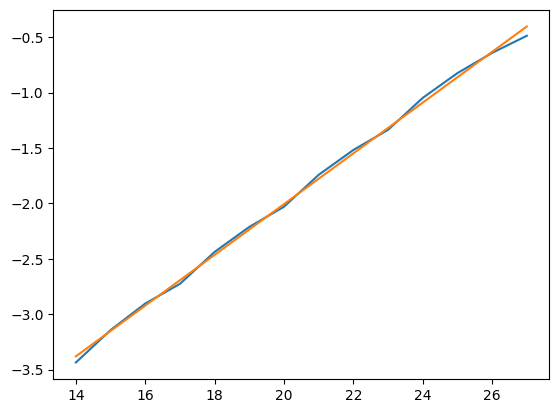

In [27]:
filtered_blue["magnitude_length"] = filtered_blue["magnitude_endpoints"].apply(lambda x: x[1] - x[0])
x = filtered_blue["band"].to_numpy()
y = filtered_blue["magnitude_endpoints"].apply(lambda x: x[1]).to_numpy()
logy = np.log(y)
plt.plot(x, logy)
print(np.poly1d(np.polyfit(x, logy, 1)))
plt.plot(x, np.poly1d(np.polyfit(x, logy, 1))(x))
np.exp(np.polyfit(x, logy, 1)[0])

# Gray

In [29]:
gray_converted = convert_to_fourier_basis(data_dir, "gray", threshold =0.04, max_depth = 9, image_opener = npz_opener_pickle)
gray_converted["number_of_coefficents"] = gray_converted["data"].apply(lambda x:len(x))/(2 *n)
gray_converted

Both Endpoints Are The Same 0.0 and 0.0 Recursion Depth of 8
Both Endpoints Are The Same 0.00390625 and 0.00390625 Recursion Depth of 8
Both Endpoints Are The Same 0.005524271728019903 and 0.005524271728019903 Recursion Depth of 8
Both Endpoints Are The Same 0.0078125 and 0.0078125 Recursion Depth of 9
Both Endpoints Are The Same 0.008734640537108554 and 0.008734640537108554 Recursion Depth of 9
Both Endpoints Are The Same 0.011048543456039806 and 0.011048543456039806 Recursion Depth of 9
Recursion Depth Exceeded Endpoints are 0.01171875 and 0.012352647110032733
Both Endpoints Are The Same 0.014084184669781208 and 0.014084184669781208 Recursion Depth of 9
Both Endpoints Are The Same 0.015625 and 0.015625 Recursion Depth of 9
Recursion Depth Exceeded Endpoints are 0.02209708691207961 and 0.022777155839239456
Recursion Depth Exceeded Endpoints are 0.0234375 and 0.02376079113397742
[0.00195312 0.00436732 0.00712946 0.00827357 0.0105179  0.0117006
 0.01333677 0.01485459 0.01604217 0.021836

band channel                           magnitude_endpoints  \
0      1    gray                                    (0.0, 0.0)   
1      2    gray                      (0.00390625, 0.00390625)   
2      3    gray  (0.005524271728019903, 0.005524271728019903)   
3      4    gray                        (0.0078125, 0.0078125)   
4      5    gray  (0.008734640537108554, 0.008734640537108554)   
5      6    gray  (0.011048543456039806, 0.011048543456039806)   
6      7    gray            (0.01171875, 0.012352647110032733)   
7      8    gray  (0.014084184669781208, 0.014084184669781208)   
8      9    gray                          (0.015625, 0.015625)   
9     10    gray  (0.016105881350068987, 0.021035800027869155)   
10    11    gray   (0.02209708691207961, 0.022777155839239456)   
11    12    gray              (0.0234375, 0.02376079113397742)   
12    13    gray  (0.024705294220065465, 0.026203921611325662)   
13    14    gray             (0.02734375, 0.03221176270013797)   
14    15    gray    (0.03314563036811941, 0.04314594147338774)   
15    16    gray    (0.04367320268554277, 0.05482683143600859)   
16    17    gray    (0.05524271728019903, 0.06548068208687582)   
17    18    gray    (0.06629126073623882, 0.08734640537108554)   
18    19    gray    (0.08778205099314153, 0.10944473223532734)   
19    20    gray     (0.10965366287201718, 0.1313104399529032)   
20    21    gray     (0.1317744358861953, 0.17508542836730445)   
21    22    gray     (0.1754336841631689, 0.21909849472468998)   
22    23    gray     (0.21930732574403436, 0.2627660946694084)   
23    24    gray     (0.26311428311013924, 0.3505410508347239)   
24    25    gray     (0.3508021291113589, 0.43835365934831944)   
25    26    gray       (0.43849287448778745, 0.52601104747934)   
26    27    gray      (0.5262285662202785, 0.6138159492317302)   

    unique_magnitudes                                               data  \
0                   1  [25300.414239453123, 33779.23995039062, 46227....   
1                   1  [-1521.5747072815154, 1179.1092117032633, -585...   
2                   1  [-4756.325699668679, -449.2356293054063, 1749....   
3                   1  [24.75918601457981, -207.15984954597792, 211.8...   
4                   1  [305.2647043860926, 296.04463247883757, -306.3...   
5                   1  [-85.39228907184241, -220.50521629406046, -116...   
6                   2  [-447.90805133455956, -524.8601325483189, -211...   
7                   1  [221.31570843090776, 97.21092083706708, 395.70...   
8                   1  [-614.1350303552254, 424.5955830858368, 233.23...   
9                   6  [-480.3329923273491, 647.5644356983448, -192.5...   
10                  2  [-329.85039134795454, -16.20766099494375, -358...   
11                  2  [59.080882320707296, 306.90076218351913, 294.2...   
12                  3  [-206.38678486000265, -504.5016396267898, -110...   
13                  9  [384.05716085715426, 148.41054621619259, 39.95...   
14                 21  [-33.44969914113115, -42.672740639791044, -123...   
15                 26  [124.11211288146121, -211.7914997384573, 251.2...   
16                 28  [-32.25871523398064, 56.46572594974246, 187.42...   
17                 71  [49.61887807406326, 3.590100117505748, 81.1307...   
18                 88  [-69.49818466303896, 35.25460829594604, -32.76...   
19                105  [-22.03244937629788, -11.64322534182554, -20.2...   
20                251  [22.77739378818265, -13.415388239676515, -21.8...   
21                319  [11.038961022625998, 0.7529365327180177, -12.1...   
22                376  [-4.34956424864091, -18.941611582226717, -5.88...   
23                927  [-0.6133610438204293, 8.731809569145689, -21.9...   
24               1163  [-1.0631648518486385, -0.18610184724489276, -1...   
25               1309  [3.624084055144664, 1.6178206409664107, 1.3905...   
26                834  [-1.068602610442569, 0.8817099632285224, -0.64...   

    number_of_coefficents 

In [30]:
filtered_gray = gray_converted[gray_converted["magnitude_endpoints"].apply(lambda x: x[0] > 0.026203921611325662)]
filtered_gray

band channel                         magnitude_endpoints  \
13    14    gray           (0.02734375, 0.03221176270013797)   
14    15    gray  (0.03314563036811941, 0.04314594147338774)   
15    16    gray  (0.04367320268554277, 0.05482683143600859)   
16    17    gray  (0.05524271728019903, 0.06548068208687582)   
17    18    gray  (0.06629126073623882, 0.08734640537108554)   
18    19    gray  (0.08778205099314153, 0.10944473223532734)   
19    20    gray   (0.10965366287201718, 0.1313104399529032)   
20    21    gray   (0.1317744358861953, 0.17508542836730445)   
21    22    gray   (0.1754336841631689, 0.21909849472468998)   
22    23    gray   (0.21930732574403436, 0.2627660946694084)   
23    24    gray   (0.26311428311013924, 0.3505410508347239)   
24    25    gray   (0.3508021291113589, 0.43835365934831944)   
25    26    gray     (0.43849287448778745, 0.52601104747934)   
26    27    gray    (0.5262285662202785, 0.6138159492317302)   

    unique_magnitudes                                               data  \
13                  9  [384.05716085715426, 148.41054621619259, 39.95...   
14                 21  [-33.44969914113115, -42.672740639791044, -123...   
15                 26  [124.11211288146121, -211.7914997384573, 251.2...   
16                 28  [-32.25871523398064, 56.46572594974246, 187.42...   
17                 71  [49.61887807406326, 3.590100117505748, 81.1307...   
18                 88  [-69.49818466303896, 35.25460829594604, -32.76...   
19                105  [-22.03244937629788, -11.64322534182554, -20.2...   
20                251  [22.77739378818265, -13.415388239676515, -21.8...   
21                319  [11.038961022625998, 0.7529365327180177, -12.1...   
22                376  [-4.34956424864091, -18.941611582226717, -5.88...   
23                927  [-0.6133610438204293, 8.731809569145689, -21.9...   
24               1163  [-1.0631648518486385, -0.18610184724489276, -1...   
25               1309  [3.624084055144664, 1.6178206409664107, 1.3905...   
26                834  [-1.068602610442569, 0.8817099632285224, -0.64...   

    number_of_coefficents  
13                   21.0  
14                   44.0  
15                   62.0  
16                   68.0  
17                  180.0  
18                  228.0  
19                  280.0  
20                  698.0  
21                  912.0  
22                 1094.0  
23                 2782.0  
24                 3592.0  
25                 3956.0  
26                 1860.0

 
0.2289 x - 6.585


/var/folders/hn/7wzd6_fs6wncrcy89b9jdj100000gn/T/ipykernel_10352/1853322745.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_gray["magnitude_length"] = filtered_gray["magnitude_endpoints"].apply(lambda x: x[1] - x[0])


1.257229848551886

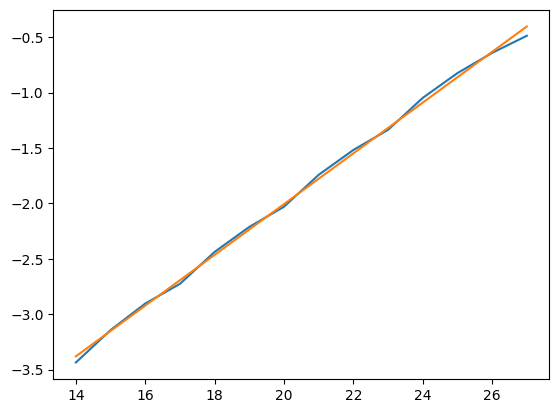

In [31]:
filtered_gray["magnitude_length"] = filtered_gray["magnitude_endpoints"].apply(lambda x: x[1] - x[0])
x = filtered_gray["band"].to_numpy()
y = filtered_gray["magnitude_endpoints"].apply(lambda x: x[1]).to_numpy()
logy = np.log(y)
plt.plot(x, logy)
print(np.poly1d(np.polyfit(x, logy, 1)))
plt.plot(x, np.poly1d(np.polyfit(x, logy, 1))(x))
np.exp(np.polyfit(x, logy, 1)[0])

# IR

In [ ]:
infra_dir = os.path.join(ROOT_DIR, 'raw-data','agriVision','toy-agriVision-nearIR')
infra_converted = convert_to_fourier_basis(infra_dir, "infrared", threshold =0.03, max_depth = 9)
infra_converted["number_of_Coefficents"] = infra_converted["data"].apply(lambda x:len(x))/(2 *n)
infra_converted

Both Endpoints Are The Same 0.0 and 0.0 Recursion Depth of 9
Both Endpoints Are The Same 0.001953125 and 0.001953125 Recursion Depth of 9
Both Endpoints Are The Same 0.0027621358640099515 and 0.0027621358640099515 Recursion Depth of 9
Recursion Depth Exceeded Endpoints are 0.00390625 and 0.004367320268554277
Recursion Depth Exceeded Endpoints are 0.005524271728019903 and 0.006176323555016366
Recursion Depth Exceeded Endpoints are 0.007042092334890604 and 0.0078125
Recursion Depth Exceeded Endpoints are 0.011048543456039806 and 0.01188039556698871
Recursion Depth Exceeded Endpoints are 0.012352647110032733 and 0.013101960805662831
[0.00097656 0.00218366 0.00356473 0.00525895 0.00666839 0.00802109
 0.0109183  0.01207525 0.01357721 0.01644257 0.02194551 0.02741871
 0.03299406 0.04398869 0.05497586 0.06602095 0.08802615 0.13206901
 0.15406518 0.17606856 0.19815606 0.22015294 0.24214621 0.26415428
 0.28614297 0.30814661 0.33015514 0.35217232 0.37416607 0.39618053
 0.44020209 0.48422275 0.50

band   channel                             magnitude_endpoints  \
0      1  infrared                                      (0.0, 0.0)   
1      2  infrared                      (0.001953125, 0.001953125)   
2      3  infrared  (0.0027621358640099515, 0.0027621358640099515)   
3      4  infrared              (0.00390625, 0.004367320268554277)   
4      5  infrared    (0.005524271728019903, 0.006176323555016366)   
5      6  infrared               (0.007042092334890604, 0.0078125)   
6      7  infrared    (0.008052940675034493, 0.010517900013934578)   
7      8  infrared     (0.011048543456039806, 0.01188039556698871)   
8      9  infrared    (0.012352647110032733, 0.013101960805662831)   
9     10  infrared             (0.013671875, 0.016105881350068987)   
10    11  infrared    (0.016572815184059706, 0.021836601342771385)   
11    12  infrared     (0.02209708691207961, 0.027413415718004295)   
12    13  infrared     (0.027621358640099514, 0.03274034104343791)   
13    14  infrared     (0.03314563036811941, 0.043891025496570764)   
14    15  infrared     (0.044064508487025304, 0.05482683143600859)   
15    16  infrared     (0.055000499376284075, 0.06588721794309765)   
16    17  infrared      (0.06608954810815872, 0.08797738773090007)   
17    18  infrared       (0.08808572096702875, 0.1320347170402779)   
18    19  infrared      (0.13207804736481807, 0.15404944559930467)   
19    20  infrared        (0.1540865853384064, 0.1760523083722651)   
20    21  infrared        (0.1761714419340575, 0.1981146641872217)   
21    22  infrared      (0.19823016050339848, 0.22014066880633393)   
22    23  infrared       (0.22015799657752896, 0.2421402423651555)   
23    24  infrared       (0.24216387233535297, 0.2641344322329363)   
24    25  infrared      (0.26415609472963614, 0.28611781370671857)   
25    26  infrared       (0.28615114329081515, 0.3081298431572973)   
26    27  infrared       (0.3081731706768128, 0.33014745943396734)   
27    28  infrared      (0.33017056767641423, 0.35213711720920055)   
28    29  infrared       (0.35217503062719485, 0.3741496299031186)   
29    30  infrared       (0.37419550749846164, 0.3961571155552783)   
30    31  infrared        (0.3961956306967596, 0.4401860208027468)   
31    32  infrared       (0.44021635111728374, 0.4842056470577126)   
32    33  infrared       (0.48422534230346337, 0.5062249825029936)   
33    34  infrared        (0.5062513563349886, 0.5282291467669505)   
34    35  infrared        (0.5282905274067067, 0.5722689579681098)   
35    36  infrared        (0.5723022865816303, 0.6162627813472334)   

    unique_magnitudes                                               data  \
0                   1  [36350903.0, 29113077.0, 19924472.0, 22022197....   
1                   1  [-623752.6038447742, 206769.23890754022, -3738...   
2                   1  [-364151.1729922761, 240647.1587276202, 34669....   
3                   2  [-248671.0561667045, 221498.06410867523, 17472...   
4                   3  [19335.59771961689, 145226.14198845671, 12620....   
5                   2  [-48640.36250730565, -178941.37806739114, 2196...   
6                   6  [-165232.6484126338, 47638.800054071486, -5577...   
7                   4  [27898.898007444943, -83848.32502334696, -4156...   
8                   3  [-107576.8935970107, 188108.4899261115, 12216....   
9                   9  [23113.517722660676, 52337.48468181843, 52550....   
10                 22  [60133.39893179062, -103192.35636735141, -3375...   
11                 25  [-7998.869895527389, -49976.15039333284, 28457...   
12                 28  [53225.6606857881, -20977.148919613577, -11168...   
13                 72  [-54868.37003059918, -11703.797431113464, -197...   
14                 88  [-21683.839373147035, -11868.584995889489, 242...   
15                105  [30654.884575990218, -1937.527923985323, 15062...   
16                256  [19749.111373772826, 312.5937733447156, -11679...   
17                699  [-24683.855237669653, 

In [ ]:
filtered_infra = infra_converted[infra_converted["magnitude_endpoints"].apply(lambda x: x[0] > 0.013101960805662831)]
filtered_infra

band   channel                           magnitude_endpoints  \
9     10  infrared           (0.013671875, 0.016105881350068987)   
10    11  infrared  (0.016572815184059706, 0.021836601342771385)   
11    12  infrared   (0.02209708691207961, 0.027413415718004295)   
12    13  infrared   (0.027621358640099514, 0.03274034104343791)   
13    14  infrared   (0.03314563036811941, 0.043891025496570764)   
14    15  infrared   (0.044064508487025304, 0.05482683143600859)   
15    16  infrared   (0.055000499376284075, 0.06588721794309765)   
16    17  infrared    (0.06608954810815872, 0.08797738773090007)   
17    18  infrared     (0.08808572096702875, 0.1320347170402779)   
18    19  infrared    (0.13207804736481807, 0.15404944559930467)   
19    20  infrared      (0.1540865853384064, 0.1760523083722651)   
20    21  infrared      (0.1761714419340575, 0.1981146641872217)   
21    22  infrared    (0.19823016050339848, 0.22014066880633393)   
22    23  infrared     (0.22015799657752896, 0.2421402423651555)   
23    24  infrared     (0.24216387233535297, 0.2641344322329363)   
24    25  infrared    (0.26415609472963614, 0.28611781370671857)   
25    26  infrared     (0.28615114329081515, 0.3081298431572973)   
26    27  infrared     (0.3081731706768128, 0.33014745943396734)   
27    28  infrared    (0.33017056767641423, 0.35213711720920055)   
28    29  infrared     (0.35217503062719485, 0.3741496299031186)   
29    30  infrared     (0.37419550749846164, 0.3961571155552783)   
30    31  infrared      (0.3961956306967596, 0.4401860208027468)   
31    32  infrared     (0.44021635111728374, 0.4842056470577126)   
32    33  infrared     (0.48422534230346337, 0.5062249825029936)   
33    34  infrared      (0.5062513563349886, 0.5282291467669505)   
34    35  infrared      (0.5282905274067067, 0.5722689579681098)   
35    36  infrared      (0.5723022865816303, 0.6162627813472334)   

    unique_magnitudes                                               data  \
9                   9  [23113.517722660676, 52337.48468181843, 52550....   
10                 22  [60133.39893179062, -103192.35636735141, -3375...   
11                 25  [-7998.869895527389, -49976.15039333284, 28457...   
12                 28  [53225.6606857881, -20977.148919613577, -11168...   
13                 72  [-54868.37003059918, -11703.797431113464, -197...   
14                 88  [-21683.839373147035, -11868.584995889489, 242...   
15                105  [30654.884575990218, -1937.527923985323, 15062...   
16                256  [19749.111373772826, 312.5937733447156, -11679...   
17                699  [-24683.855237669653, -6137.129800675035, -865...   
18                439  [10183.443701741522, 9312.784426443259, -10427...   
19                500  [-10258.03206970309, 2413.7114523954842, 1000....   
20                557  [5612.08418572167, -4387.506884123547, -11041....   
21                611  [-7815.730442525766, -4134.1195832773155, 248....   
22                672  [2372.5274690537153, -642.6582460872309, -4724...   
23                727  [1890.2385679243616, -5187.561614147764, 1550....   
24                781  [3765.055076498164, 4410.680335255925, 5913.62...   
25                842  [-209.2858028982451, -1701.1218318686974, -284...   
26                893  [-1225.7809021012185, 100.45411474824164, 2354...   
27                955  [5545.956413926993, 741.813696349655, 378.8678...   
28                999  [446.419747327074, -1152.6426794916113, -1423....   
29               1059  [-2037.0888406272154, 1857.958974966936, 833.6...   
30               2280  [-370.15272247507573, 84.58596732328829, -46.5...   
31               2507  [269.82975301600663, -2562.642451719482, 653.2...   
32               1301  [340.6268759152091, 444.29341900065674, 318.43...   
33               1118  [-3.2336752489059677, 175.08109247587208, -184...   
34               1843  [-191.30245872962928, -49.78801704557206, 414....   
35               1344  [-27.96343567843809, -47

 
0.1322 x - 4.821


/var/folders/0c/5hhs4r6n7pnc4jcl295d7j_c0000gn/T/ipykernel_12738/2617865376.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_infra["magnitude_length"] = filtered_infra["magnitude_endpoints"].apply(lambda x: x[1] - x[0])


1.141349420695688

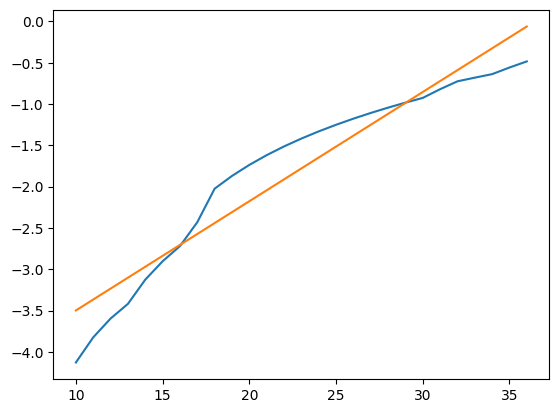

In [ ]:
filtered_infra["magnitude_length"] = filtered_infra["magnitude_endpoints"].apply(lambda x: x[1] - x[0])
x = filtered_infra["band"].to_numpy()
y = filtered_infra["magnitude_endpoints"].apply(lambda x: x[1]).to_numpy()
logy = np.log(y)
plt.plot(x, logy)
print(np.poly1d(np.polyfit(x, logy, 1)))
plt.plot(x, np.poly1d(np.polyfit(x, logy, 1))(x))
np.exp(np.polyfit(x, logy, 1)[0])

In [32]:
splits = getSplits(0.026203921611325662,0.6138159492317302, 1.23)
splits

[0.026203921611325662,
 0.032230823581930565,
 0.03964391300577459,
 0.04876201299710275,
 0.05997727598643638,
 0.07377204946331675,
 0.0907396208398796,
 0.1116097336330519,
 0.13727997236865383,
 0.1688543660134442,
 0.20769087019653637,
 0.2554597703417397,
 0.3142155175203398,
 0.38648508655001795,
 0.47537665645652205,
 0.5847132874415221,
 0.7191973435530721]

In [34]:
converted_red_with_splits = convert_to_fourier_basis(data_dir, "red", split_list = splits, image_opener = npz_opener_pickle)
converted_red_with_splits

[0.02620392 0.03223082 0.03964391 0.04876201 0.05997728 0.07377205
 0.09073962 0.11160973 0.13727997 0.16885437 0.20769087 0.25545977
 0.31421552 0.38648509 0.47537666 0.58471329 0.71919734]


band channel                          magnitude_endpoints  \
0      1     red                  (0.0, 0.025012204052472065)   
1      2     red  (0.026203921611325662, 0.03221176270013797)   
2      3     red  (0.03314563036811941, 0.039257326645003476)   
3      4     red  (0.03983608994994363, 0.048317644050206957)   
4      5     red   (0.04894517221149089, 0.05975413492491545)   
5      6     red   (0.06064130740726572, 0.07370297759419221)   
6      7     red   (0.07411588266019639, 0.09060479300580626)   
7      8     red   (0.09085705741885163, 0.11117382399029459)   
8      9     red   (0.11172148160996165, 0.13722006304883044)   
9     10     red   (0.13738676089897636, 0.16869392876319675)   
10    11     red    (0.1690102160373745, 0.20765677906253144)   
11    12     red     (0.207913802846426, 0.25543410506674713)   
12    13     red     (0.2556132523278576, 0.3141800541812171)   
13    14     red    (0.3142528962674807, 0.38632397779624356)   
14    15     red   (0.38654115240165565, 0.47537634145550933)   
15    16     red      (0.4754244865200072, 0.584699212369328)   
16    17     red      (0.585051413339033, 0.7015825094585276)   

    unique_magnitudes                                               data  
0                  22  [26379.12890625, 34216.12109375, 48492.6367187...  
1                  10  [-151.42994047089744, -156.1682599448632, 212....  
2                  13  [-108.51598307176806, -152.28177594382203, -92...  
3                  19  [-182.34544389501588, -151.0676042782003, -324...  
4                  28  [55.303560022453816, -76.67539841351486, -22.5...  
5                  39  [-57.745477206627285, -51.446857331578876, 43....  
6                  58  [9.894455955387292, -42.55920253534915, 77.226...  
7                  87  [37.02229713986614, -68.85665775623376, -19.14...  
8                 126  [-14.888939553289553, -40.69315797432803, -19....  
9                 181  [-4.763971144658804, 41.362024599978724, -47.9...  
10                271  [-2.574726588549621, 9.00768632581009, 23.7799...  
11                395  [-5.263322323038724, 14.7442718095311, -17.840...  
12                584  [-2.3948356370257446, -18.02835055162956, -7.5...  
13                861  [-5.005998156515728, -23.82529071854598, 10.55...  
14               1273  [7.536616482512377, 2.6321560700951476, -4.061...  
15               1363  [-0.5522985106699598, 7.228805916582971, -3.20...  
16                509  [0.03557534946397567, 3.0948685336565998, -3.4...

In [ ]:
converted_green_with_splits = convert_to_fourier_basis(data_dir, "green", split_list = splits, image_opener = npz_opener)
converted_green_with_splits

[0.00805294 0.00926088 0.01065001 0.01224752 0.01408464 0.01619734
 0.01862694 0.02142098 0.02463413 0.02832925 0.03257864 0.03746543
 0.04308525 0.04954803 0.05698024 0.06552727 0.07535637 0.08665982
 0.09965879 0.11460761 0.13179875 0.15156857 0.17430385 0.20044943
 0.23051685 0.26509437 0.30485853 0.35058731 0.4031754  0.46365171]


band channel                           magnitude_endpoints  \
0      1   green                              (0.0, 0.0078125)   
1      2   green  (0.008052940675034493, 0.008734640537108554)   
2      3   green           (0.009765625, 0.010517900013934578)   
3      4   green   (0.011048543456039806, 0.01188039556698871)   
4      5   green  (0.012352647110032733, 0.014084184669781208)   
5      6   green  (0.014218964627501012, 0.016105881350068987)   
6      7   green  (0.016572815184059706, 0.018528970665049098)   
7      8   green  (0.019236050394133015, 0.021126277004671814)   
8      9   green           (0.021484375, 0.024472586105745445)   
9     10   green  (0.024705294220065465, 0.028168369339562415)   
10    11   green   (0.028437929255002024, 0.03250647847088523)   
11    12   green   (0.03274034104343791, 0.037314400731528904)   
12    13   green    (0.0375183060787081, 0.043013116299893045)   
13    14   green   (0.04314594147338774, 0.049449175395203764)   
14    15   green    (0.04971844555217912, 0.05694288959809864)   
15    16   green     (0.0570432885410556, 0.06550980402831415)   
16    17   green     (0.0656261625641072, 0.07516359923786663)   
17    18   green    (0.07536633352177632, 0.08651263511855509)   
18    19   green     (0.0866888321139537, 0.09962852144419414)   
19    20   green    (0.09968593871230348, 0.11458703237400492)   
20    21   green     (0.11463695774085304, 0.1317889094362292)   
21    22   green      (0.13190464066330504, 0.151414433150893)   
22    23   green     (0.1516032685181643, 0.17422269123905224)   
23    24   green    (0.17435401489431102, 0.20044049391667967)   
24    25   green     (0.20048806719575762, 0.2305018514364364)   
25    26   green     (0.23054322154848345, 0.2650859074528069)   
26    27   green     (0.2651650429449553, 0.30485021696754006)   
27    28   green     (0.3049002662564945, 0.35057369625216644)   
28    29   green      (0.350611778730786, 0.40316776965462064)   
29    30   green     (0.4032339968926231, 0.46359469792623004)   

    unique_magnitudes                                               data  
0                  10  [132337.4305287921, -94390.76719970972, -25336...  
1                   3  [-3744.2517307820394, 27861.851019473375, -834...  
2                   3  [33471.33269346464, 123824.82250566437, 34140....  
3                   4  [-1484.3855749710306, 48440.95662398659, 327.6...  
4                   6  [-134.22405033910488, -13102.246547704386, 147...  
5                   6  [-4157.122139563215, 92624.21102152459, -14078...  
6                   9  [-3615.6105012069156, -4331.356927374733, -806...  
7                  10  [-78.03614790436167, 42640.10973606152, -2528....  
8                  14  [-7802.285743968246, 5985.598993590172, -780.2...  
9                  18  [3303.274320208527, 20047.431364818483, -1769....  
10                 23  [774.5759807316168, 4415.676376697004, -3871.5...  
11                 29  [-1118.7219100237694, -10510.688881196822, -31...  
12                 39  [-131.09403884850573, -3327.6789068645585, 201...  
13                 49  [2075.4202780238384, 8902.543533935039, 2987.8...  
14                 64  [-1736.9105218173213, -7060.172255307523, 139....  
15                 82  [-531.9918664535685, 3655.9724582616227, 1706....  
16                104  [112.15907404511769, -701.2119846431932, -138....  
17                138  [607.6615095317704, 7463.602356088377, -318.75...  
18                180  [-166.74874637012974, 5617.953620178152, -1357...  
19                229  [-7.737550682415915, -1873.402379729209, 3.960...  
20                304  [250.40616061306395, -8873.297235612918, 283.5...  
21                388  [-241.79883984531938, 480.8481434022927, 775.3...  
22                510  [801.8452258582861, -29.793185182728678, -681....  
23                666  [5.878945213588308, 2863.366879902859, 847.096...  
24                858  [-268.1136165437716, 1639.2274647375061, -126....  
25     

In [35]:
converted_blue_with_splits = convert_to_fourier_basis(data_dir, "blue", split_list = splits, image_opener = npz_opener_pickle)
converted_blue_with_splits

[0.02620392 0.03223082 0.03964391 0.04876201 0.05997728 0.07377205
 0.09073962 0.11160973 0.13727997 0.16885437 0.20769087 0.25545977
 0.31421552 0.38648509 0.47537666 0.58471329 0.71919734]


band channel                          magnitude_endpoints  \
0      1    blue                  (0.0, 0.025012204052472065)   
1      2    blue  (0.026203921611325662, 0.03221176270013797)   
2      3    blue  (0.03314563036811941, 0.039257326645003476)   
3      4    blue  (0.03983608994994363, 0.048317644050206957)   
4      5    blue   (0.04894517221149089, 0.05975413492491545)   
5      6    blue   (0.06064130740726572, 0.07370297759419221)   
6      7    blue   (0.07411588266019639, 0.09060479300580626)   
7      8    blue   (0.09085705741885163, 0.11117382399029459)   
8      9    blue   (0.11172148160996165, 0.13722006304883044)   
9     10    blue   (0.13738676089897636, 0.16869392876319675)   
10    11    blue    (0.1690102160373745, 0.20765677906253144)   
11    12    blue     (0.207913802846426, 0.25543410506674713)   
12    13    blue     (0.2556132523278576, 0.3141800541812171)   
13    14    blue    (0.3142528962674807, 0.38632397779624356)   
14    15    blue   (0.38654115240165565, 0.47537634145550933)   
15    16    blue      (0.4754244865200072, 0.584699212369328)   
16    17    blue      (0.585051413339033, 0.7015825094585276)   

    unique_magnitudes                                               data  
0                  22  [25380.015625, 30578.77734375, 43920.640625, 2...  
1                  10  [-29.592005626552893, -5.743617036867871, 269....  
2                  13  [10.993307112276197, -31.403730011062546, -139...  
3                  19  [-120.00682928853308, -54.023924506010914, -36...  
4                  28  [11.270843016222177, -51.959521126352875, 25.2...  
5                  39  [-54.69532338961412, -28.746519665924005, -20....  
6                  58  [17.636397131322482, -11.952038364449752, 82.7...  
7                  87  [9.340519285950165, -67.18621112899203, -57.36...  
8                 126  [15.918966861288624, -14.618391878044703, -31....  
9                 181  [7.990770233269202, 48.6233545329557, -50.7050...  
10                271  [-5.513027727227387, 2.173450809892521, 25.081...  
11                395  [-4.3654053168507145, 8.948912950490438, -20.0...  
12                584  [-2.1136853342374913, -16.420238409329727, -7....  
13                861  [-5.524088834793449, -24.89083980626539, 9.922...  
14               1273  [5.832006299290931, 2.5502845319467142, -4.179...  
15               1363  [-0.30947028093410855, 6.874184480102828, -2.3...  
16                509  [-0.13984915693370947, 3.112706406381734, -3.5...

In [36]:
converted_gray_with_splits = convert_to_fourier_basis(data_dir, "gray", split_list = splits, image_opener = npz_opener_pickle)
converted_gray_with_splits

[0.02620392 0.03223082 0.03964391 0.04876201 0.05997728 0.07377205
 0.09073962 0.11160973 0.13727997 0.16885437 0.20769087 0.25545977
 0.31421552 0.38648509 0.47537666 0.58471329 0.71919734]


band channel                          magnitude_endpoints  \
0      1    gray                  (0.0, 0.025012204052472065)   
1      2    gray  (0.026203921611325662, 0.03221176270013797)   
2      3    gray  (0.03314563036811941, 0.039257326645003476)   
3      4    gray  (0.03983608994994363, 0.048317644050206957)   
4      5    gray   (0.04894517221149089, 0.05975413492491545)   
5      6    gray   (0.06064130740726572, 0.07370297759419221)   
6      7    gray   (0.07411588266019639, 0.09060479300580626)   
7      8    gray   (0.09085705741885163, 0.11117382399029459)   
8      9    gray   (0.11172148160996165, 0.13722006304883044)   
9     10    gray   (0.13738676089897636, 0.16869392876319675)   
10    11    gray    (0.1690102160373745, 0.20765677906253144)   
11    12    gray     (0.207913802846426, 0.25543410506674713)   
12    13    gray     (0.2556132523278576, 0.3141800541812171)   
13    14    gray    (0.3142528962674807, 0.38632397779624356)   
14    15    gray   (0.38654115240165565, 0.47537634145550933)   
15    16    gray      (0.4754244865200072, 0.584699212369328)   
16    17    gray      (0.585051413339033, 0.7015825094585276)   

    unique_magnitudes                                               data  
0                  22  [25300.414239453123, 33779.23995039062, 46227....  
1                  10  [-102.58041470678828, -145.01019343114706, 237...  
2                  13  [-33.44969914113115, -42.672740639791044, -123...  
3                  19  [-157.25970441693718, -57.384616891543885, -31...  
4                  28  [14.109034398580519, -68.36597903275361, -6.14...  
5                  39  [-61.72934284474167, -38.37766091526721, 14.67...  
6                  58  [16.77517917835008, -41.51399675968157, 80.669...  
7                  87  [23.895167247458414, -75.76825416837505, -39.8...  
8                 126  [-4.91087162014624, -30.07281794112485, -22.30...  
9                 181  [-2.9460922511086274, 45.45141972361769, -44.3...  
10                271  [-4.164818330150137, 6.595392525865444, 25.633...  
11                395  [-3.8813375492113478, 14.2929073913259, -18.47...  
12                584  [-1.8294228809079058, -17.743113472654265, -7....  
13                861  [-5.220439761246003, -24.394552986813117, 10.4...  
14               1273  [5.741616432024864, 2.2055967266873164, -4.773...  
15               1363  [-0.55765003615369, 7.417397137164716, -2.5254...  
16                509  [0.17341842279594388, 3.291375054168748, -3.52...

In [ ]:
converted_infra_with_splits = convert_to_fourier_basis(infra_dir, "infrared", split_list = splits)
converted_infra_with_splits

[0.00805294 0.00926088 0.01065001 0.01224752 0.01408464 0.01619734
 0.01862694 0.02142098 0.02463413 0.02832925 0.03257864 0.03746543
 0.04308525 0.04954803 0.05698024 0.06552727 0.07535637 0.08665982
 0.09965879 0.11460761 0.13179875 0.15156857 0.17430385 0.20044943
 0.23051685 0.26509437 0.30485853 0.35058731 0.4031754  0.46365171]


band   channel                           magnitude_endpoints  \
0      1  infrared                              (0.0, 0.0078125)   
1      2  infrared  (0.008052940675034493, 0.008734640537108554)   
2      3  infrared           (0.009765625, 0.010517900013934578)   
3      4  infrared   (0.011048543456039806, 0.01188039556698871)   
4      5  infrared  (0.012352647110032733, 0.014084184669781208)   
5      6  infrared  (0.014218964627501012, 0.016105881350068987)   
6      7  infrared  (0.016572815184059706, 0.018528970665049098)   
7      8  infrared  (0.019236050394133015, 0.021126277004671814)   
8      9  infrared           (0.021484375, 0.024472586105745445)   
9     10  infrared  (0.024705294220065465, 0.028168369339562415)   
10    11  infrared   (0.028437929255002024, 0.03250647847088523)   
11    12  infrared   (0.03274034104343791, 0.037314400731528904)   
12    13  infrared    (0.0375183060787081, 0.043013116299893045)   
13    14  infrared   (0.04314594147338774, 0.049449175395203764)   
14    15  infrared    (0.04971844555217912, 0.05694288959809864)   
15    16  infrared     (0.0570432885410556, 0.06550980402831415)   
16    17  infrared     (0.0656261625641072, 0.07516359923786663)   
17    18  infrared    (0.07536633352177632, 0.08651263511855509)   
18    19  infrared     (0.0866888321139537, 0.09962852144419414)   
19    20  infrared    (0.09968593871230348, 0.11458703237400492)   
20    21  infrared     (0.11463695774085304, 0.1317889094362292)   
21    22  infrared      (0.13190464066330504, 0.151414433150893)   
22    23  infrared     (0.1516032685181643, 0.17422269123905224)   
23    24  infrared    (0.17435401489431102, 0.20044049391667967)   
24    25  infrared     (0.20048806719575762, 0.2305018514364364)   
25    26  infrared     (0.23054322154848345, 0.2650859074528069)   
26    27  infrared     (0.2651650429449553, 0.30485021696754006)   
27    28  infrared     (0.3049002662564945, 0.35057369625216644)   
28    29  infrared      (0.350611778730786, 0.40316776965462064)   
29    30  infrared     (0.4032339968926231, 0.46359469792623004)   

    unique_magnitudes                                               data  
0                  10  [36350903.0, 29113077.0, 19924472.0, 22022197....  
1                   3  [-165232.6484126338, 47638.800054071486, -5577...  
2                   3  [-45356.94414865256, -7284.410583915042, 47252...  
3                   4  [27898.898007444943, -83848.32502334696, -4156...  
4                   6  [-107576.8935970107, 188108.4899261115, 12216....  
5                   6  [84366.17361988052, -19321.68384241026, -25095...  
6                   9  [60133.39893179062, -103192.35636735141, -3375...  
7                  10  [22076.47040784757, -40814.28779458289, 25212....  
8                  14  [51223.15792388479, 20743.858206325764, 5840.7...  
9                  18  [-3101.7668181022404, -39825.35610518281, 7958...  
10                 23  [10430.3325085131, -44987.34630271276, -39016....  
11                 29  [-7470.44174715105, -15349.959298566988, 2765....  
12                 39  [12038.739417335695, 8559.562117475944, 12671....  
13                 49  [14758.462283497212, -3050.9717345147546, -525...  
14                 64  [727.6016242071221, -7441.403155405146, -8040....  
15                 82  [-3520.2386952959823, -3587.1587900674886, -52...  
16                104  [12616.700278830636, -15616.56034621562, 8480....  
17                138  [2097.4384768222344, -17098.60672761785, 5701....  
18                180  [-15541.528067467973, -24751.280975319652, 793...  
19                229  [20806.427318137383, 3224.312818737066, 667.19...  
20                304  [-6117.122142890728, -108.60287113266025, -676...  
21                388  [9122.907124296044, 1567.2391049437888, 14828....  
22                510  [5624.2590080047585, -3082.3564266546523, -944...  
23                666  [8454.078165212566, 2464.79691835212, -686.233...  
24                85